In [1]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt
import folium
from folium import FeatureGroup, LayerControl, Map, Marker, plugins
from folium.plugins import HeatMap
import os
import datetime as dt
import seaborn as sns
import geopandas as gpd
import pickle
from matplotlib.colors import LogNorm
import copy
FFMPEG_BINARY = "/usr/local/bin/ffmpeg.osx"
import pylab as pl
import imageio
from moviepy.editor import *
from moviepy.Clip import *
from moviepy.video.VideoClip import *
import cv2
import glob
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

In [3]:
imageio.plugins.ffmpeg.download()

In [4]:
data_col=['taxiid',
 'valid_flag',
 'heading',
 'dt',
 'timediff',
 'latitude',
 'longitude',
 'displacement',
 'speed',
 'speedbycal',
 'passenger_flag',
 'engine_flag',
 'tripid',
 'tripstatus',
 'triptime',
 'tripdisplacement',
 'trip_maxdist',
 'trip_maxspeed',
 'trip_maxtime',
 'trip_q25speed',
 'trip_q25speedbycal',
 'trip_q50speed',
 'trip_q50speedbycal']

 data = pd.read_csv('../data/taxidata.csv')

KeyboardInterrupt: 

In [15]:
# convert column to datetime : df['col'] = pd.to_datetime(df['col'])
data['dt'] = pd.to_datetime(data['dt'])

## save data to object

In [ ]:
filehandler = open('taxidata.obj', 'w') 
pickle.dump(data, filehandler)

# <span style="color: red; background: yellow"> RUN HERE !!! </span>

## read data to object

In [3]:
filehandler = open('taxidata.obj', 'r') 
data = pickle.load(filehandler)

In [4]:
data.head()

,taxiid,valid_flag,heading,dt,timediff,latitude,longitude,displacement,speed,speedbycal,...,tripstatus,triptime,tripdisplacement,trip_maxdist,trip_maxspeed,trip_maxtime,trip_q25speed,trip_q25speedbycal,trip_q50speed,trip_q50speedbycal
0,AK3954,1,78,2016-08-24 11:46:36,1.0,13.843136,100.493958,41.912713,0,2.514763,...,D,-,1099.959320,406.661299,29.0,2.0,0.0,2.514763,6.5,6.777831
1,AK3954,1,111,2016-08-24 11:57:36,1.0,13.863161,100.500946,431.198573,34,25.871914,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
2,AK3954,1,102,2016-08-24 12:29:36,1.0,13.859781,100.518295,0.000000,0,0.000000,...,D,-,1916.852556,704.892492,57.0,2.0,0.0,0.000000,0.0,0.000000
3,AK3954,1,267,2016-08-24 12:40:36,1.0,13.853083,100.525101,92.847135,15,5.570828,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
4,AT1982,1,295,2016-08-04 11:59:35,1.0,13.784423,100.513062,0.000000,0,0.000000,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000


In [5]:
# convert column to datetime : df['col'] = pd.to_datetime(df['col'])
print(data.dtypes)
data['dt'] = pd.to_datetime(data['dt'])

taxiid                 object
valid_flag              int64
heading                 int64
dt                     object
timediff              float64
latitude              float64
longitude             float64
displacement          float64
speed                   int64
speedbycal            float64
passenger_flag          int64
engine_flag             int64
tripid                 object
tripstatus             object
triptime               object
tripdisplacement      float64
trip_maxdist          float64
trip_maxspeed         float64
trip_maxtime          float64
trip_q25speed         float64
trip_q25speedbycal    float64
trip_q50speed         float64
trip_q50speedbycal    float64
dtype: object


In [5]:
data.head()

,taxiid,valid_flag,heading,dt,timediff,latitude,longitude,displacement,speed,speedbycal,...,tripstatus,triptime,tripdisplacement,trip_maxdist,trip_maxspeed,trip_maxtime,trip_q25speed,trip_q25speedbycal,trip_q50speed,trip_q50speedbycal
0,AK3954,1,78,2016-08-24 11:46:36,1.0,13.843136,100.493958,41.912713,0,2.514763,...,D,-,1099.959320,406.661299,29.0,2.0,0.0,2.514763,6.5,6.777831
1,AK3954,1,111,2016-08-24 11:57:36,1.0,13.863161,100.500946,431.198573,34,25.871914,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
2,AK3954,1,102,2016-08-24 12:29:36,1.0,13.859781,100.518295,0.000000,0,0.000000,...,D,-,1916.852556,704.892492,57.0,2.0,0.0,0.000000,0.0,0.000000
3,AK3954,1,267,2016-08-24 12:40:36,1.0,13.853083,100.525101,92.847135,15,5.570828,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
4,AT1982,1,295,2016-08-04 11:59:35,1.0,13.784423,100.513062,0.000000,0,0.000000,...,O,-,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000


In [6]:
data.shape

(12082080, 23)

## filter data between 20160201 at 6am - 9am

In [10]:
# data['Hours'] = pd.to_datetime(data['Date'], format='%Y:%M:%D').dt.time
data['time'] = pd.to_datetime(data['dt'], format='%Y:%M:%D').dt.time

In [6]:
datad = data[data.tripstatus == 'D']
datad

,taxiid,valid_flag,heading,dt,timediff,latitude,longitude,displacement,speed,speedbycal,...,tripstatus,triptime,tripdisplacement,trip_maxdist,trip_maxspeed,trip_maxtime,trip_q25speed,trip_q25speedbycal,trip_q50speed,trip_q50speedbycal
0,AK3954,1,78,2016-08-24 11:46:36,1.000000,13.843136,100.493958,41.912713,0,2.514763,...,D,-,1099.959320,406.661299,29.000000,2.0,0.0,2.514763,6.5,6.777831
2,AK3954,1,102,2016-08-24 12:29:36,1.000000,13.859781,100.518295,0.000000,0,0.000000,...,D,-,1916.852556,704.892492,57.000000,2.0,0.0,0.000000,0.0,0.000000
5,AT1982,1,112,2016-08-04 12:09:35,1.000000,13.775799,100.529320,146.965132,20,8.817908,...,D,-,2004.909225,469.517806,27.000000,2.0,2.0,6.456411,9.0,12.055352
7,AT1982,1,108,2016-08-04 12:54:35,1.000000,13.731029,100.585381,14.027947,0,0.841677,...,D,-,744.455862,449.813464,22.000000,2.0,1.2,5.902768,3.0,13.494404
9,AT1982,1,304,2016-08-04 13:15:23,1.000000,13.728121,100.573334,25.873643,0,1.552419,...,D,-,95.302532,69.428889,4.165733,1.0,0.0,2.075082,0.0,2.859076
11,AT1982,1,69,2016-08-04 15:03:25,1.000000,13.726383,100.528030,44.645047,15,2.678703,...,D,-,978.834583,190.198575,15.000000,2.0,0.0,3.555445,4.0,5.070883
13,AT1982,1,36,2016-08-04 15:56:25,1.000000,13.748030,100.563492,9.289693,0,0.557382,...,D,-,271.406614,248.660695,14.919642,2.0,0.0,0.465165,0.0,0.557382
15,AK3615,1,314,2016-09-23 10:06:32,1.366667,13.951999,100.547401,44.062540,6,1.934453,...,D,-,8270.506722,1287.203696,50.586009,2.0,0.0,0.312033,15.0,16.726012
17,AK3615,1,129,2016-09-23 10:32:18,1.000000,13.991448,100.581375,602.754666,0,36.165280,...,D,-,9409.446940,946.138623,60.000000,2.0,3.0,12.610792,36.0,36.165280
19,AK3615,1,163,2016-09-23 11:28:56,1.000000,13.989754,100.615685,0.000000,0,0.000000,...,D,-,6506.429641,1216.145932,43.000000,2.0,0.0,0.000000,10.0,8.366847


In [8]:
datad.shape

(6041040, 23)

## density function

In [6]:
def density_map(latitudes, longitudes, center, hr, plot, trip, bins=(126,100), radius=0.4):  
    cmap = copy(plt.cm.RdPu)
    cmap.set_bad((1, 1, 0.98))  # Fill background with black

    # Center the map around the provided center coordinates
    histogram_range = [
#         [center[1] - radius, center[1] + radius],
#         [center[0] - radius, center[0] + radius]
        [100.32698245577569, 100.92425866080856],
        [13.489325262000136, 13.949794826969693]
    ]
    
    fig = plt.figure(figsize=(12,10))
    two = plt.hist2d(longitudes, latitudes, bins=bins, norm=LogNorm(),
               cmap=cmap, range=histogram_range,cmin=100)

    # Remove all axes and annotations to keep the map clean and simple
    if(plot):
        
        plt.grid('off')
        plt.axis('off')
        fig.axes[0].get_xaxis().set_visible(False)
        fig.axes[0].get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
        if(trip == 'D'):
            fig.savefig('Output/map_d/densmap_'+('00'+str(hr))[len(str(hr)):len(str(hr))+2]+'.png',bbox_inches='tight')
        elif(trip == 'O'):
            fig.savefig('Output/map_o/densmap_'+('00'+str(hr))[len(str(hr)):len(str(hr))+2]+'.png',bbox_inches='tight')
        elif(trip == 'OD'):
            fig.savefig('Output/map_od_diff/densmap_'+('00'+str(hr))[len(str(hr)):len(str(hr)+2)]+'.png',bbox_inches='tight')
        
    print(type(two))
   
    return two

### plot density graph 24hr of 'D' trip

0


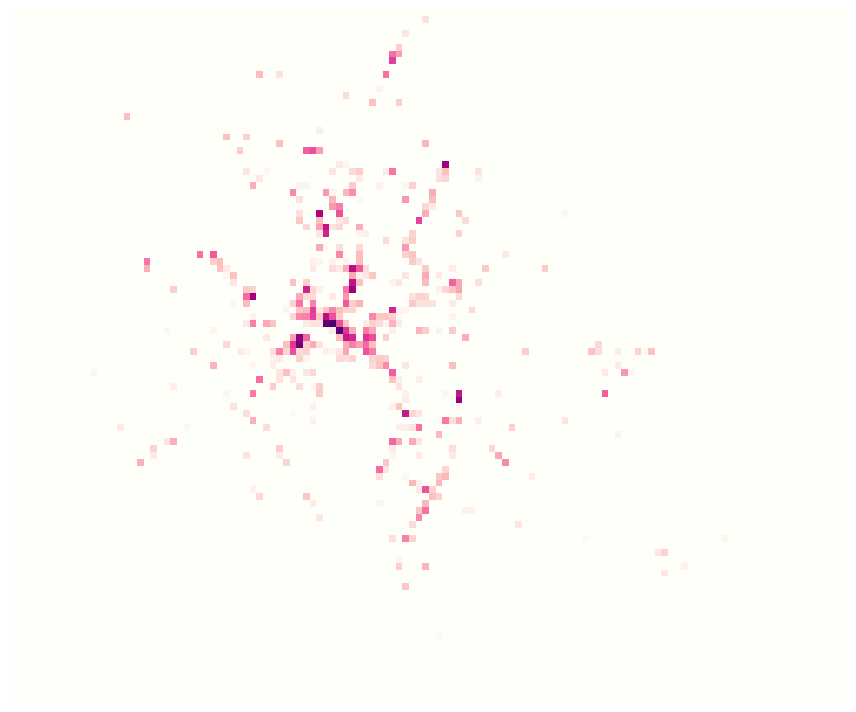

<type 'tuple'>
1


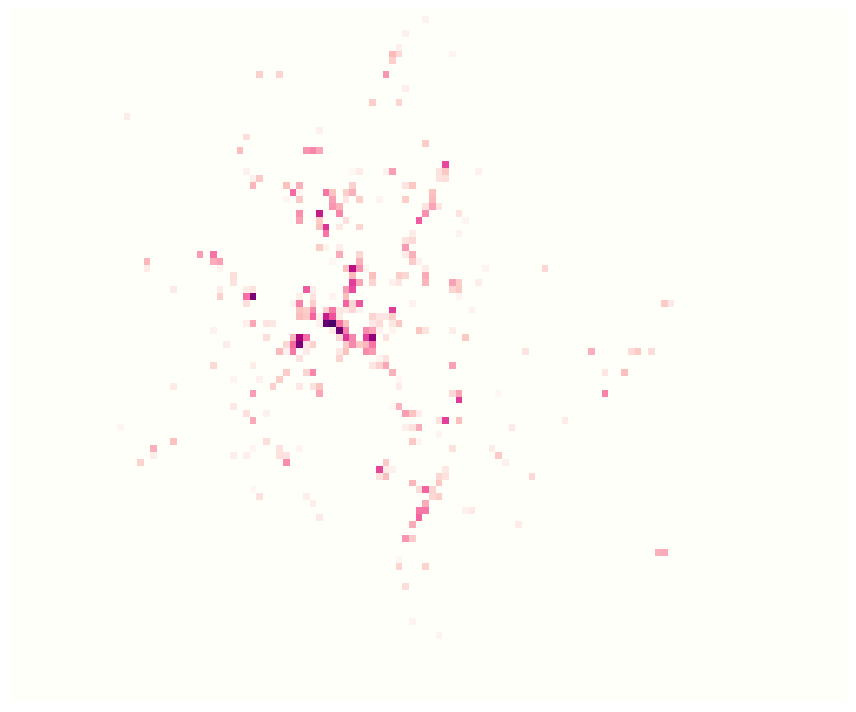

<type 'tuple'>
2


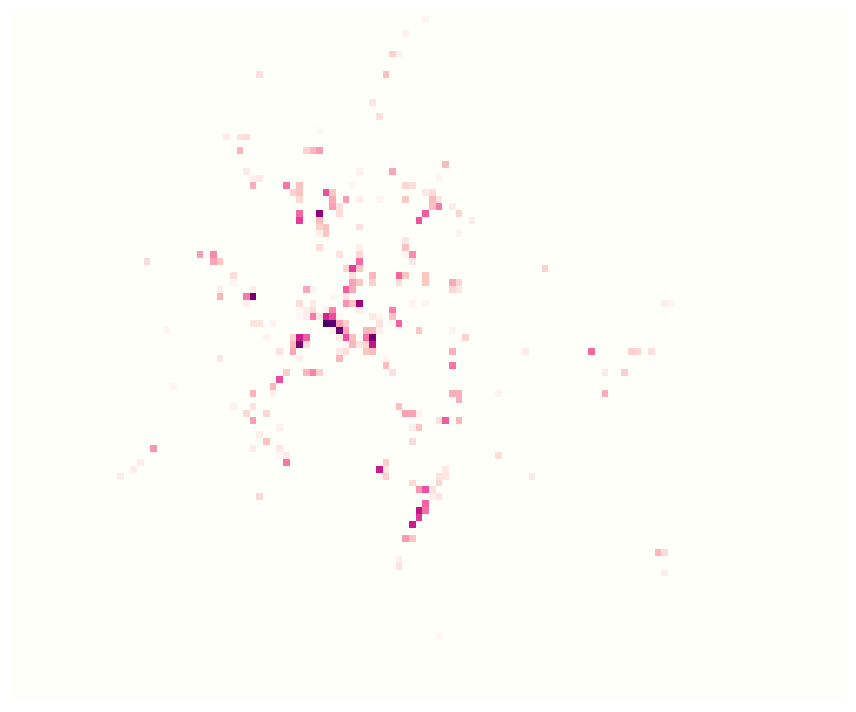

<type 'tuple'>
3


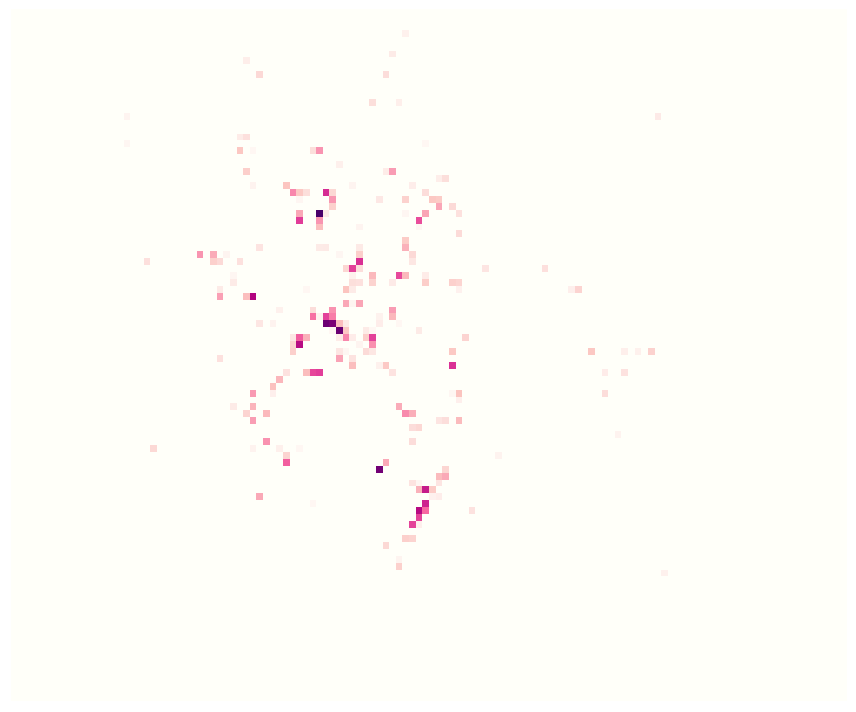

<type 'tuple'>
4


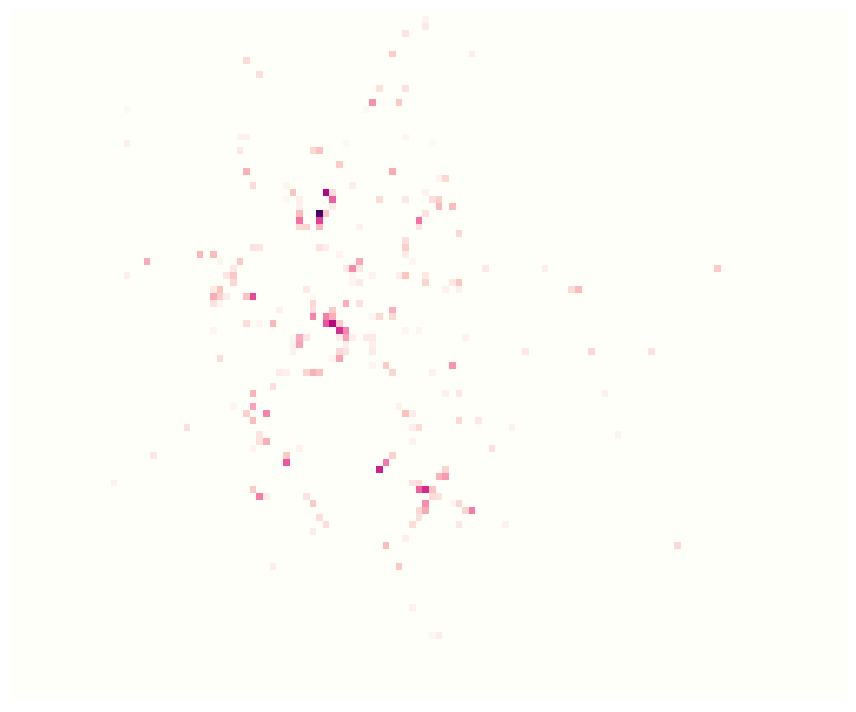

<type 'tuple'>
5


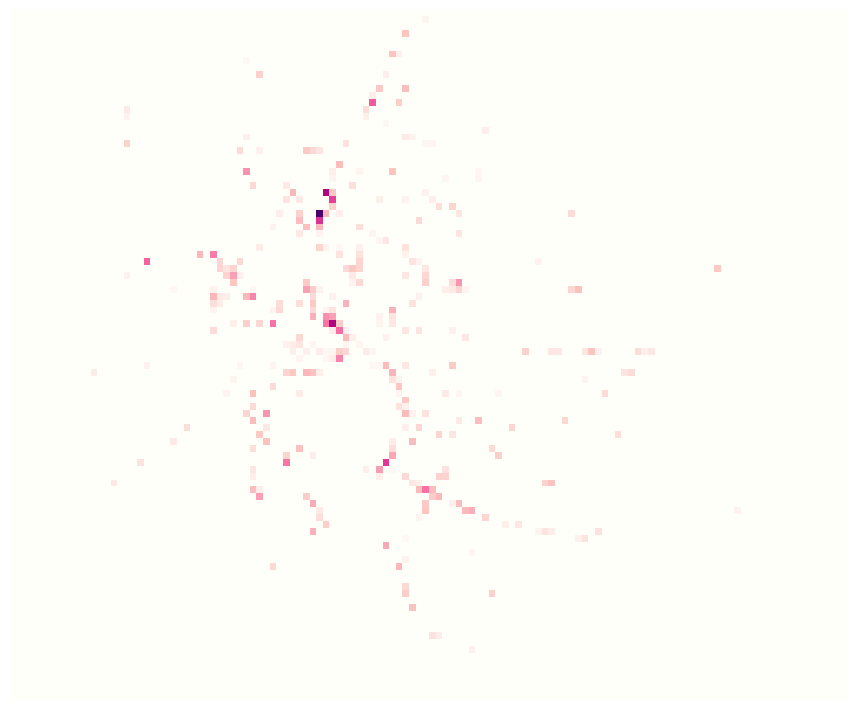

<type 'tuple'>
6


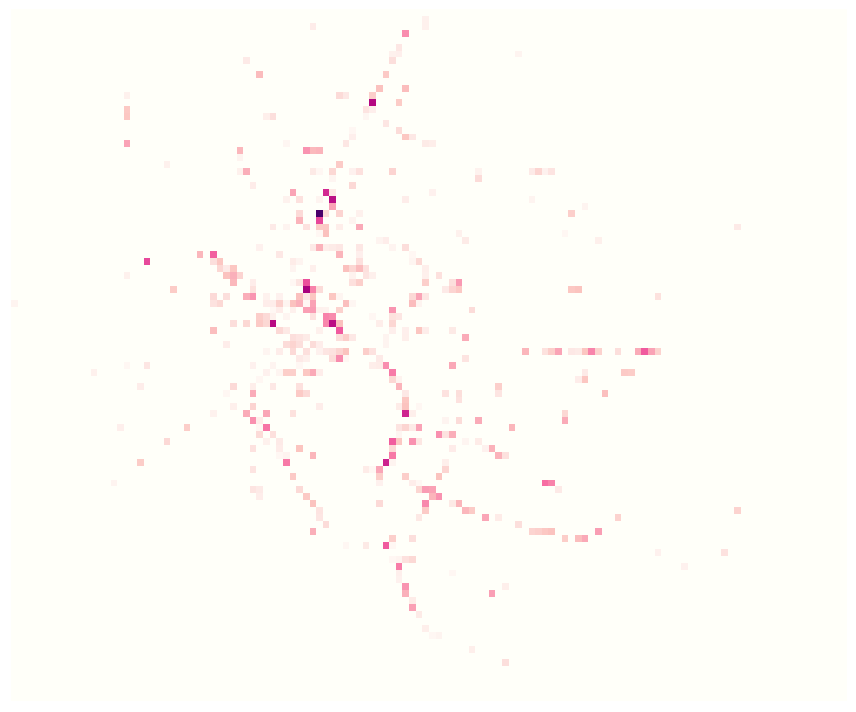

<type 'tuple'>
7


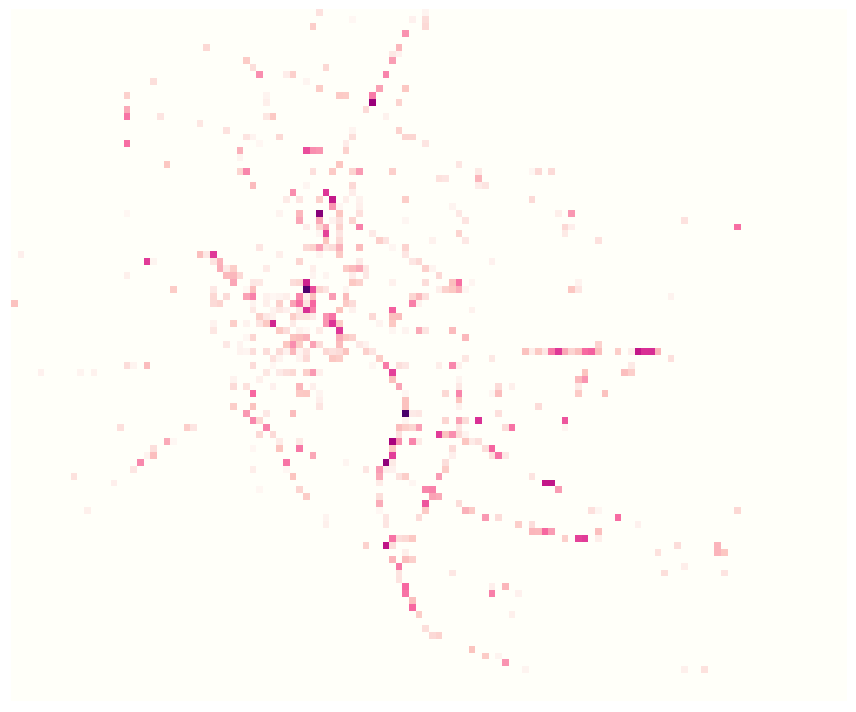

<type 'tuple'>
8


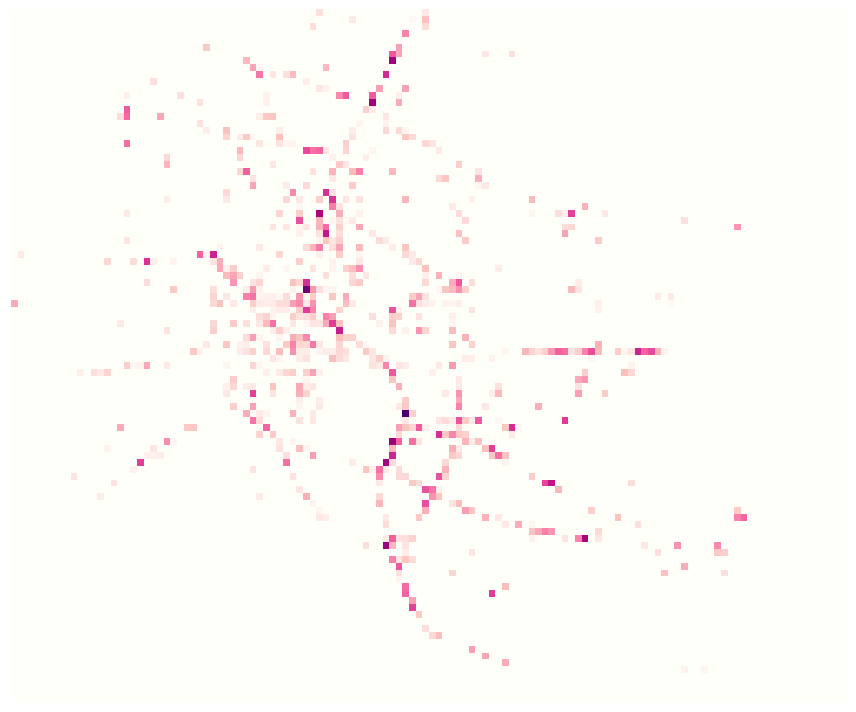

<type 'tuple'>
9


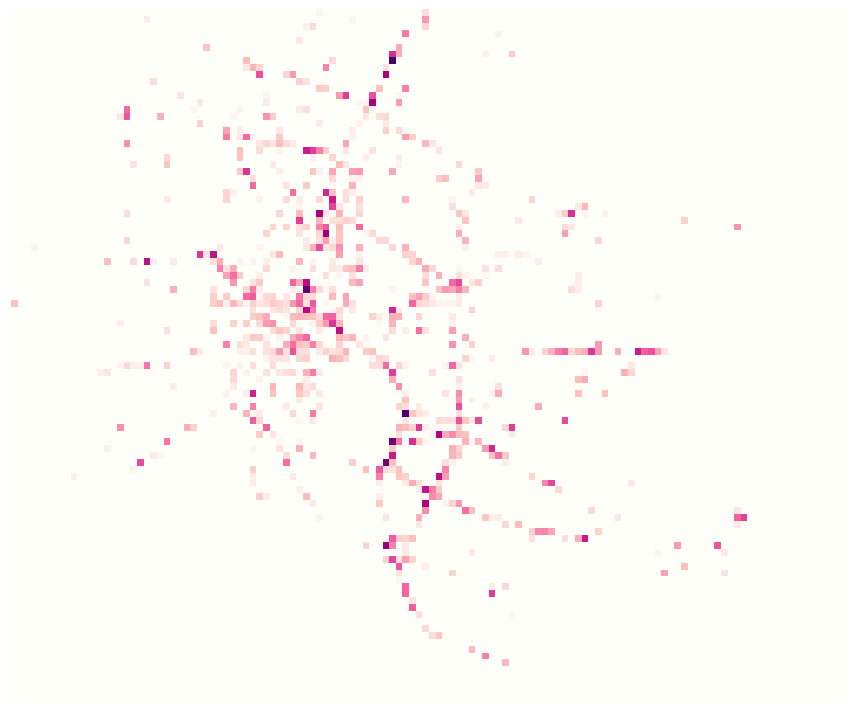

<type 'tuple'>
10


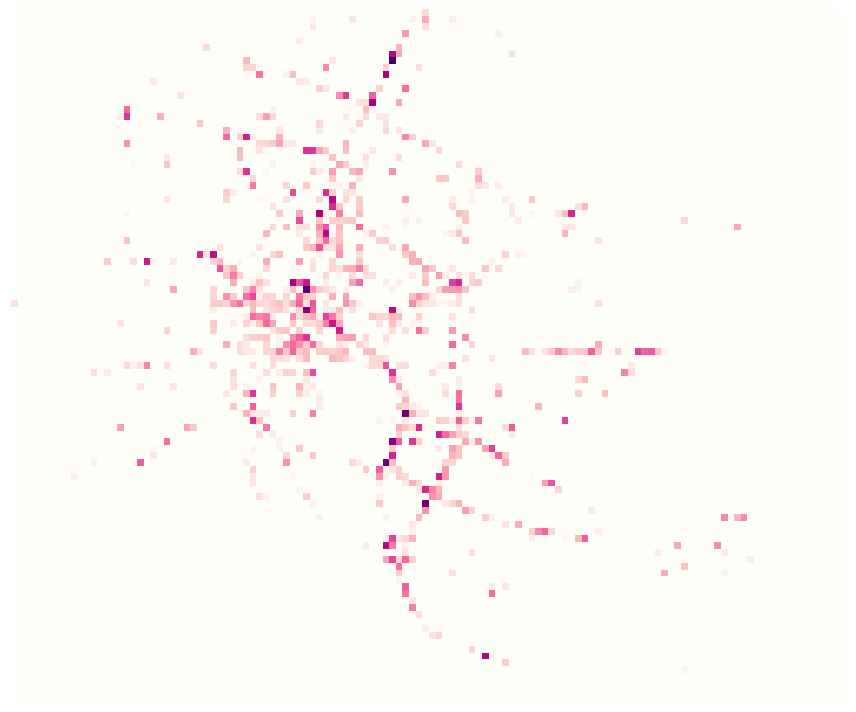

<type 'tuple'>
11


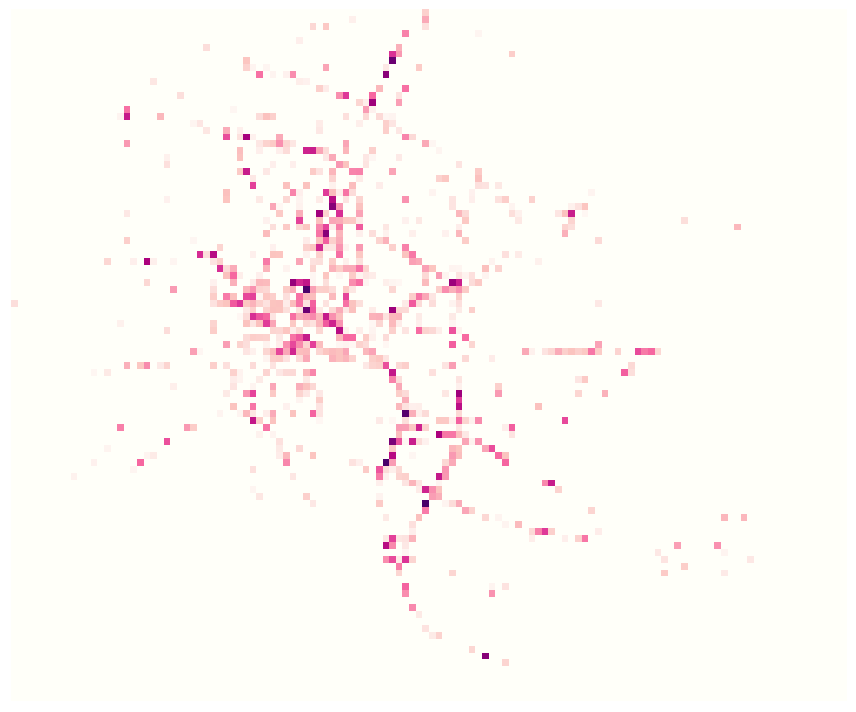

<type 'tuple'>
12


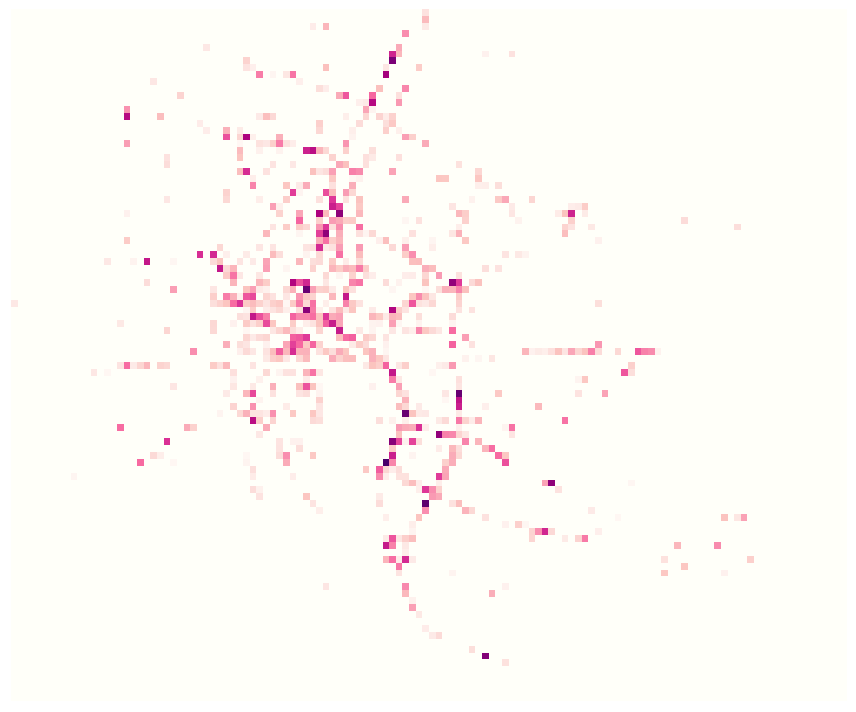

<type 'tuple'>
13


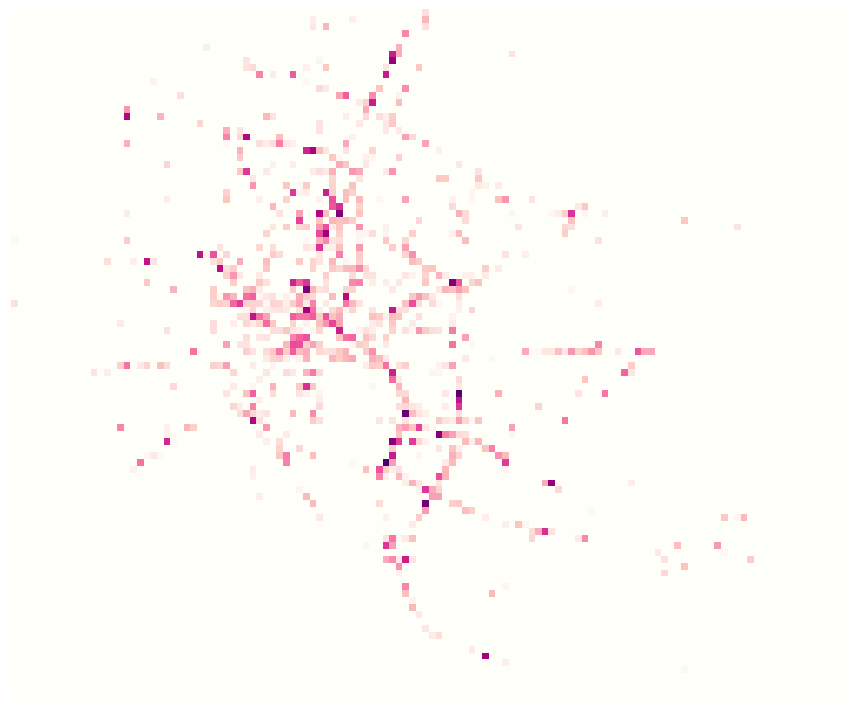

<type 'tuple'>
14


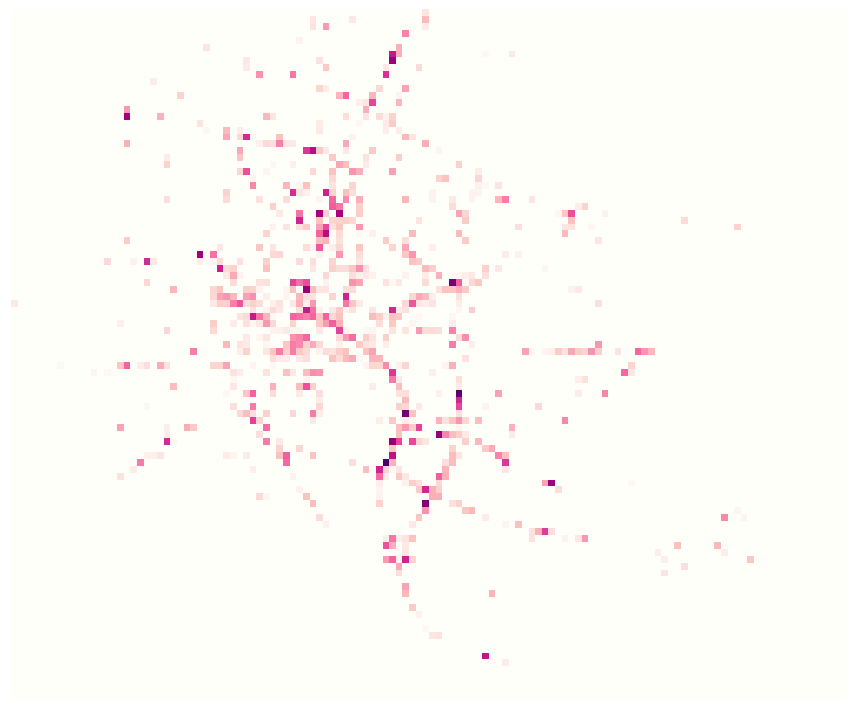

<type 'tuple'>
15


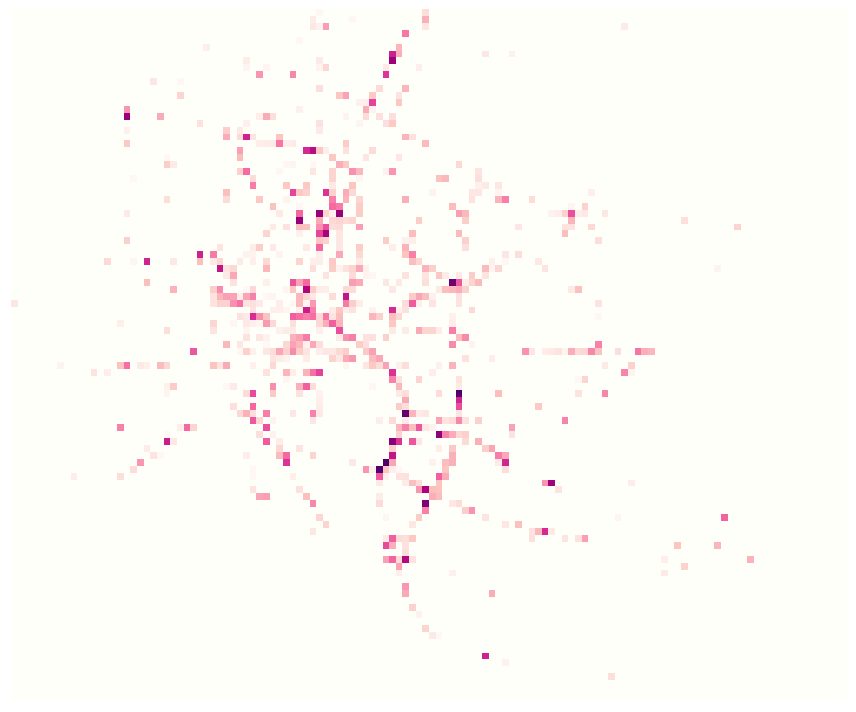

<type 'tuple'>
16


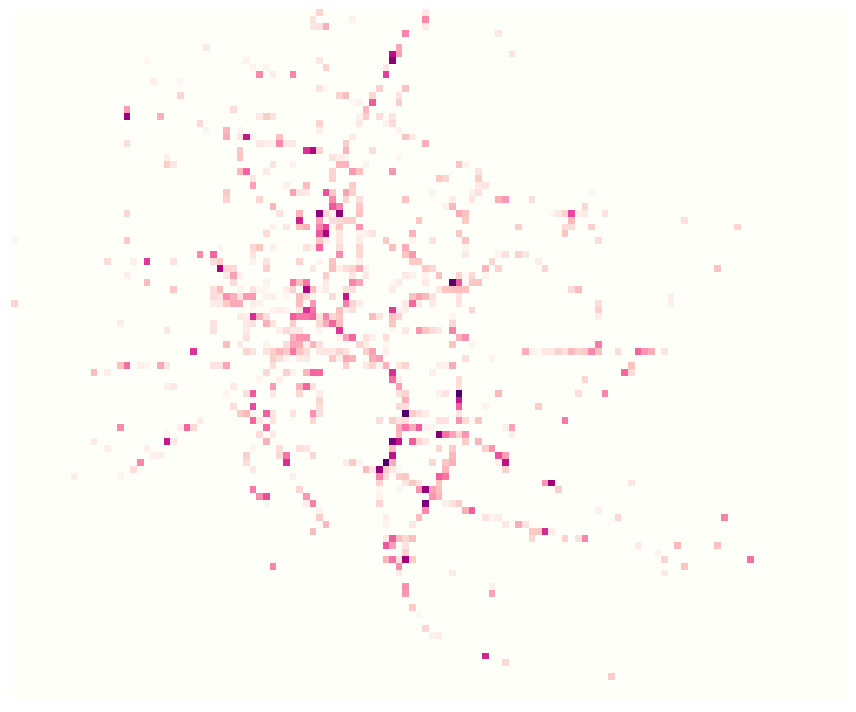

<type 'tuple'>
17


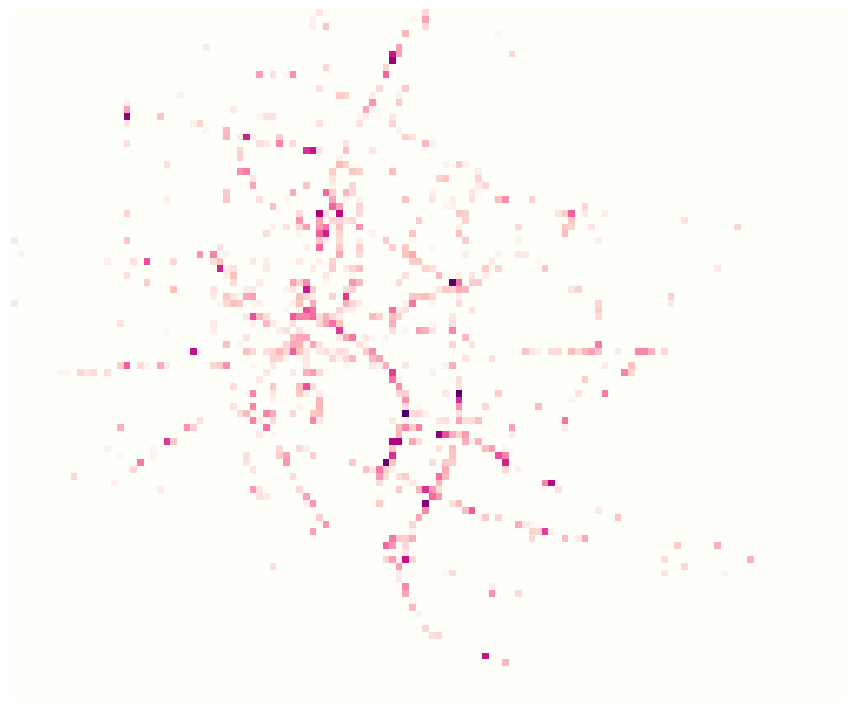

<type 'tuple'>
18


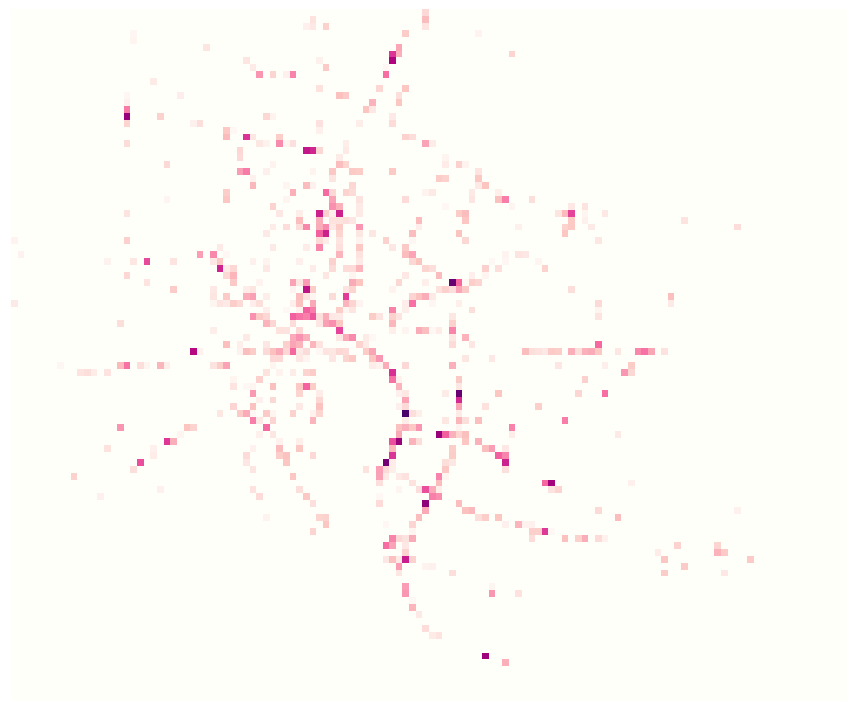

<type 'tuple'>
19


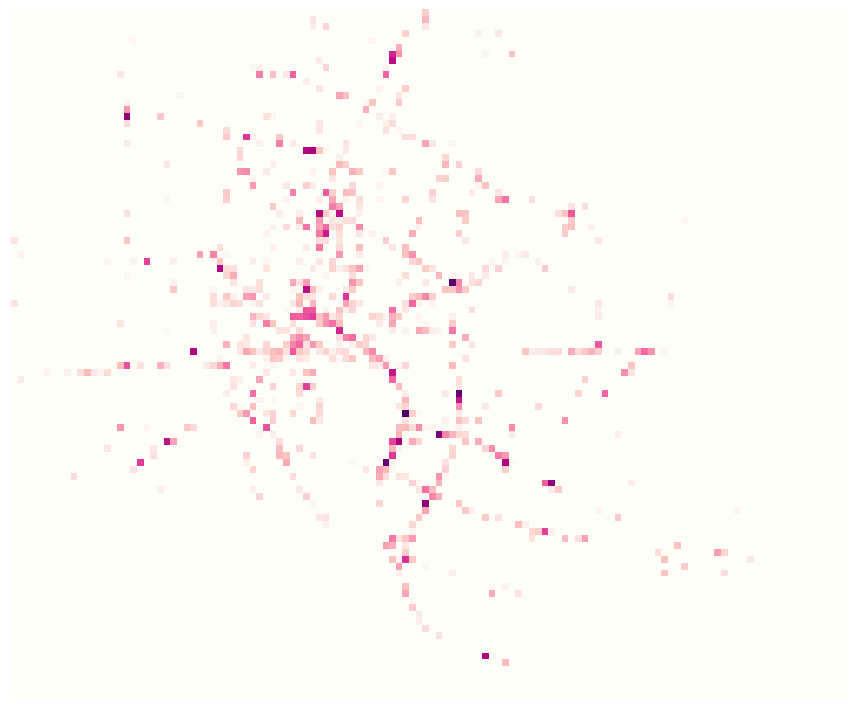

<type 'tuple'>
20


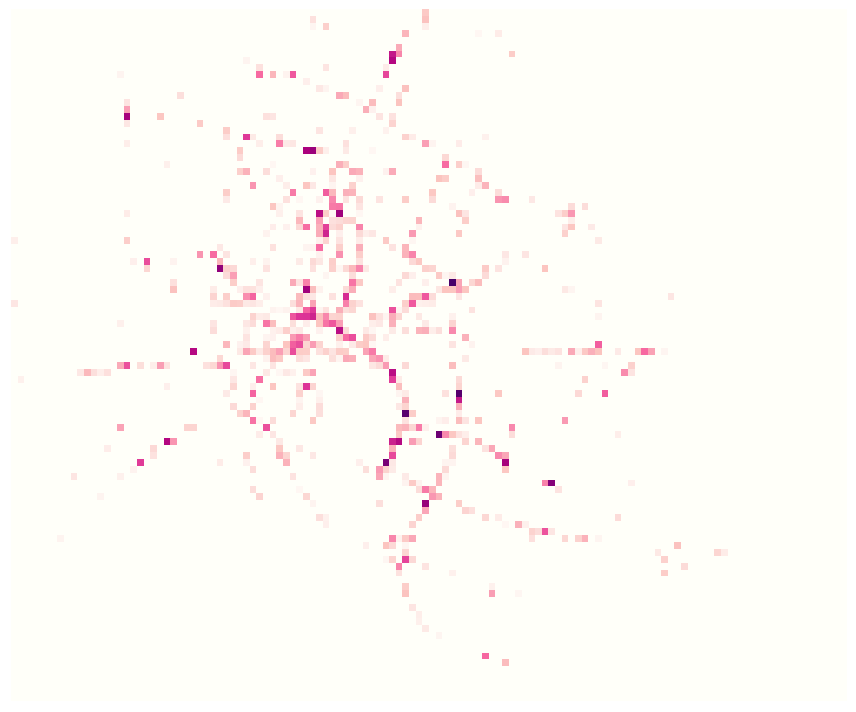

<type 'tuple'>
21


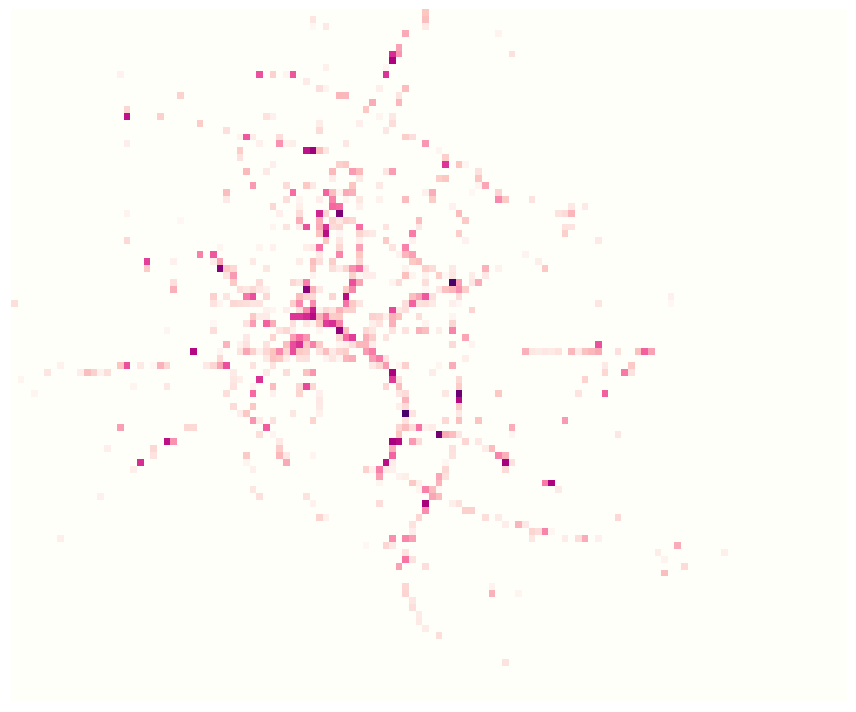

<type 'tuple'>
22


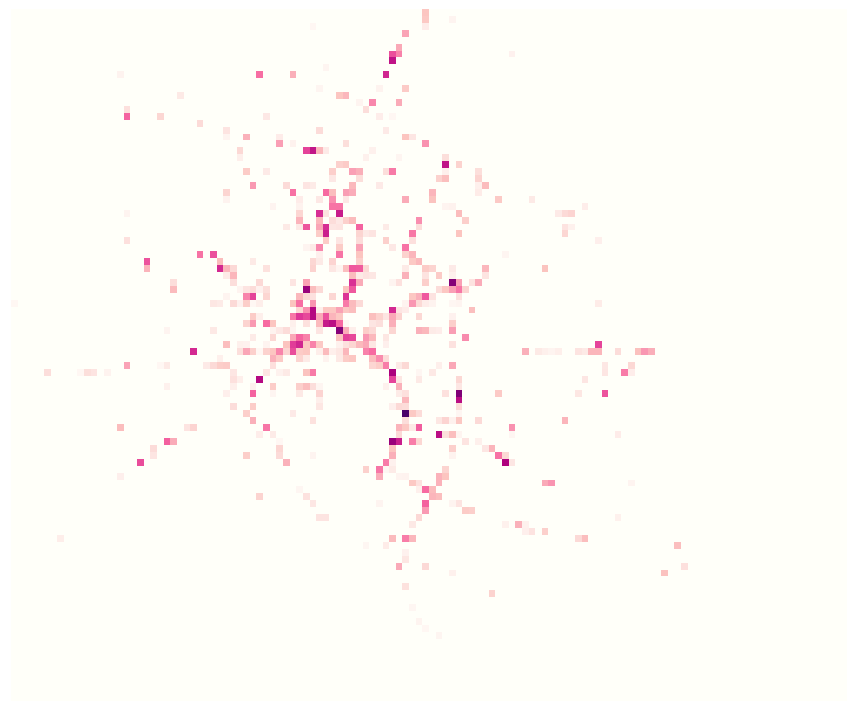

<type 'tuple'>
23


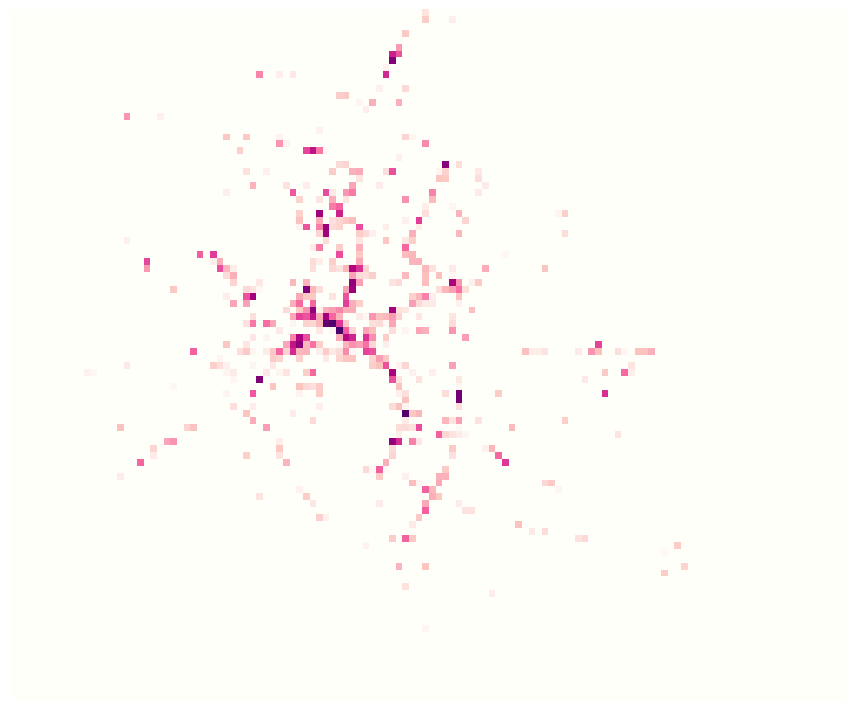

<type 'tuple'>


In [73]:
bkk = [13.7563, 100.5018]
for i in range(24):
    print(i)
    temp = datad[(datad['dt'].dt.hour == i)]
    fig = density_map(temp.latitude, temp.longitude, center=bkk, hr=i, plot=True, trip='D')
    

### plot density graph 24hr of 'O' trip

In [7]:
datao = data[data['tripstatus'] == 'O']

0


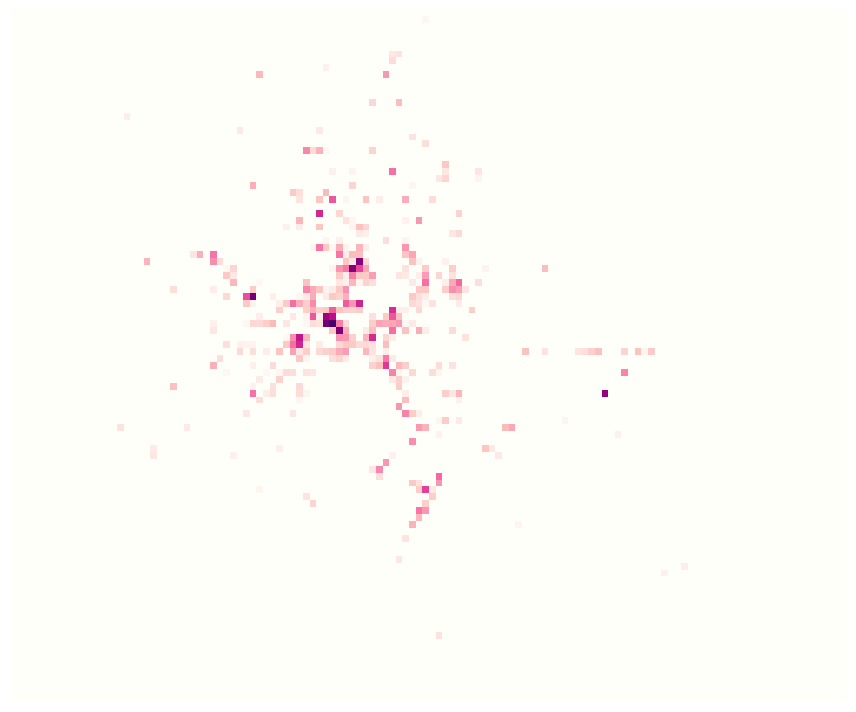

<type 'tuple'>
1


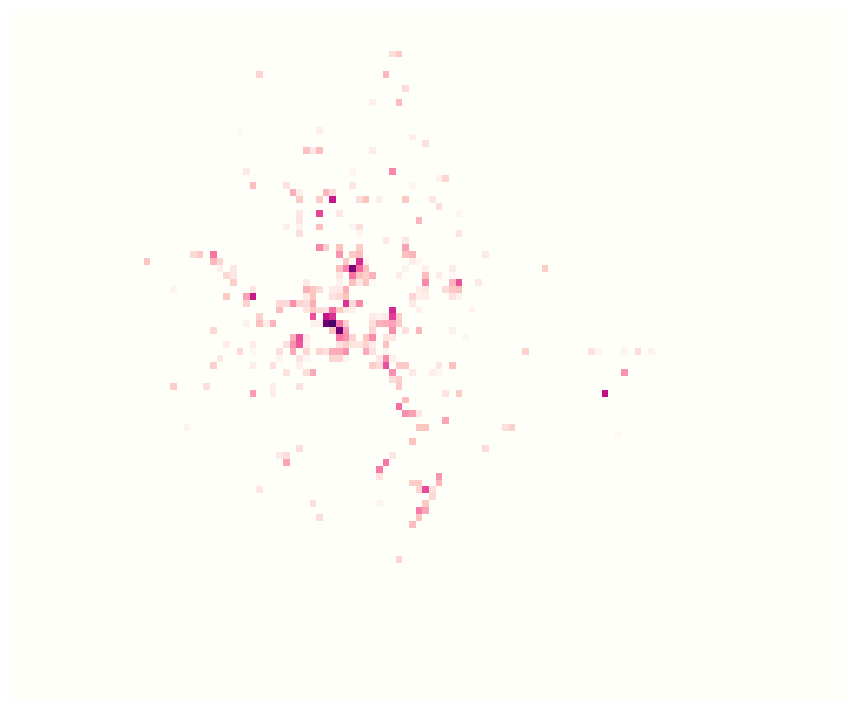

<type 'tuple'>
2


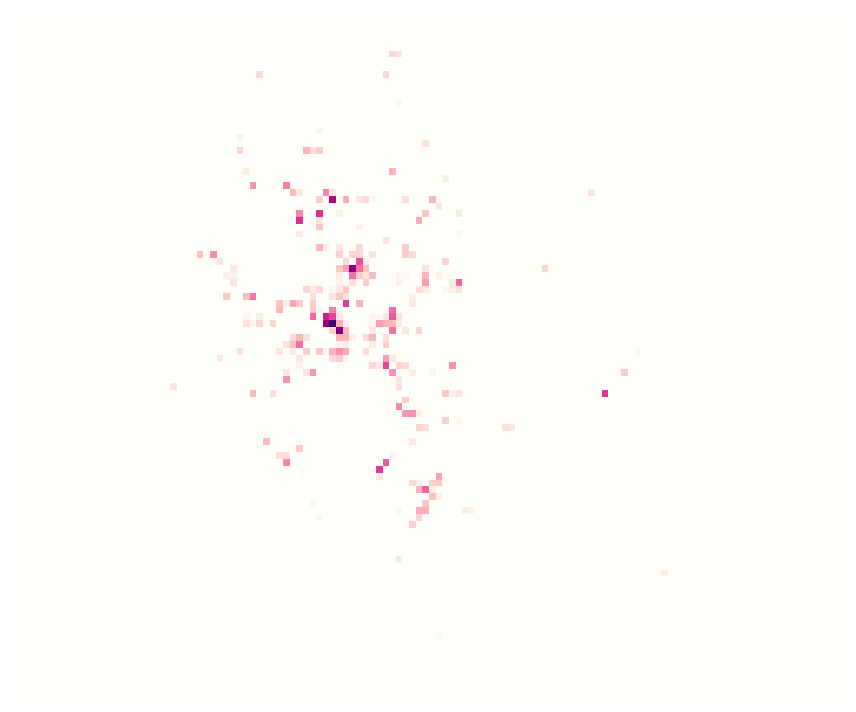

<type 'tuple'>
3


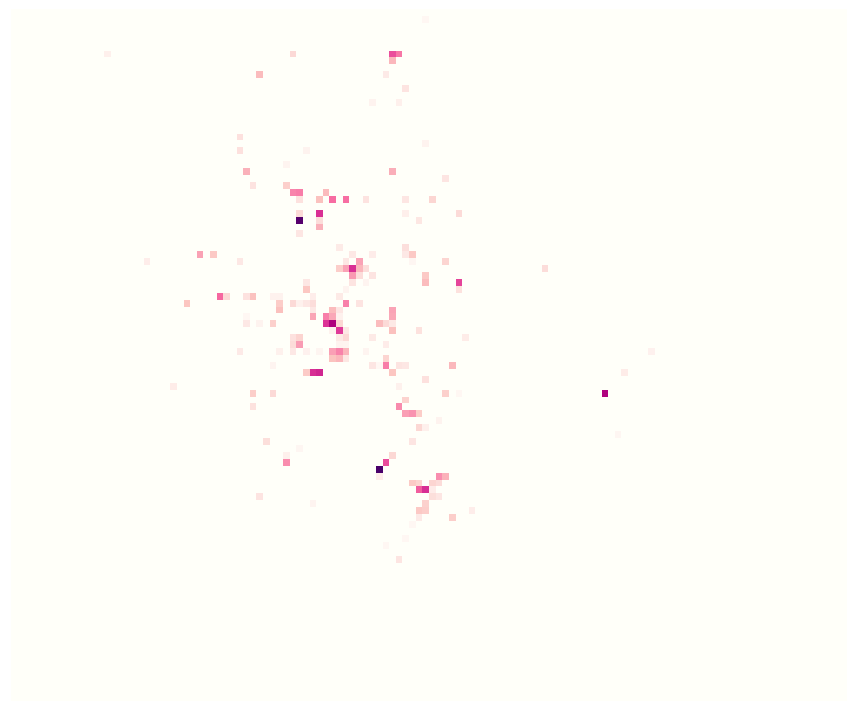

<type 'tuple'>
4


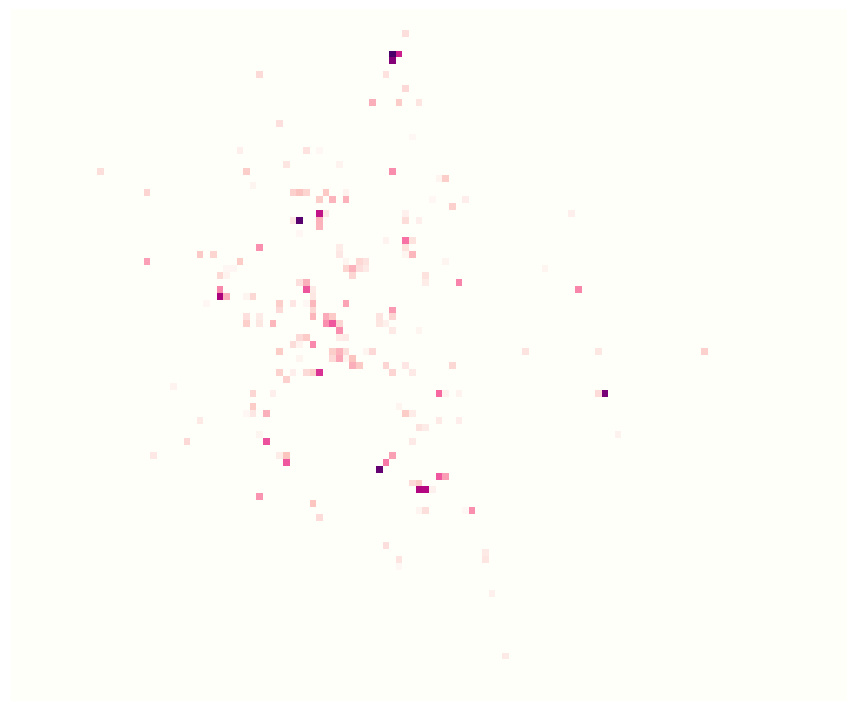

<type 'tuple'>
5


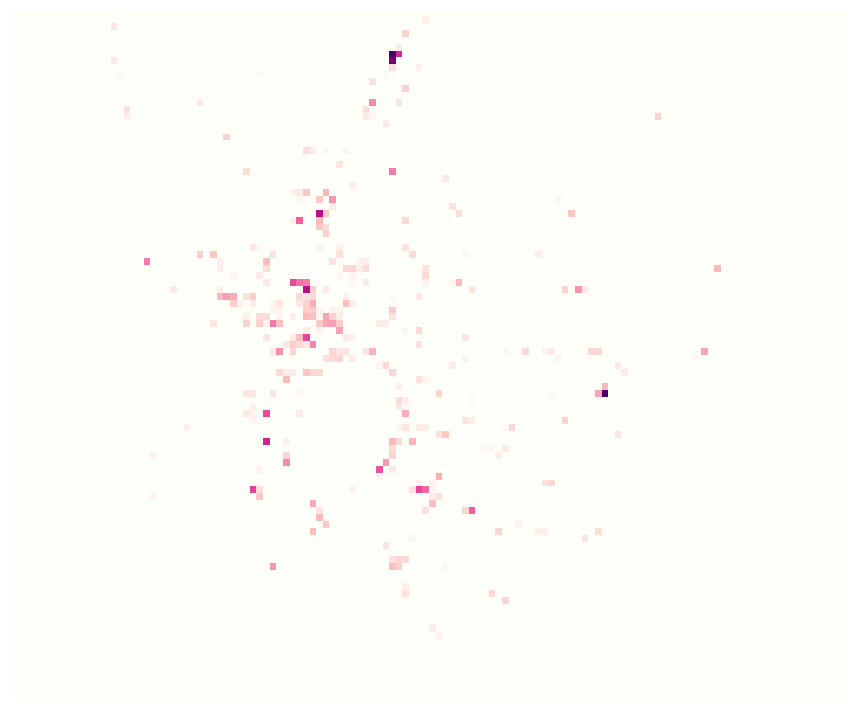

<type 'tuple'>
6


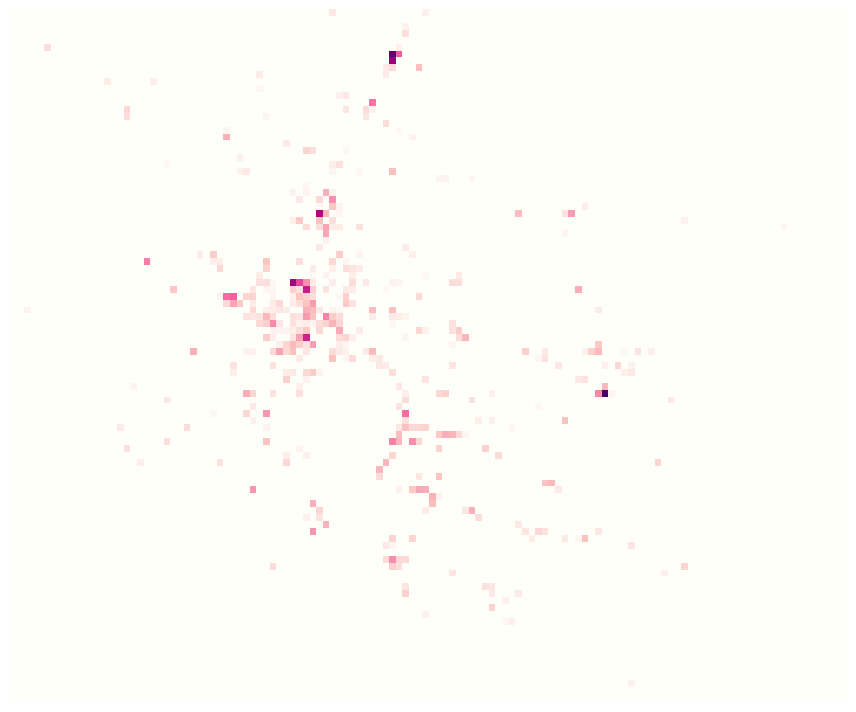

<type 'tuple'>
7


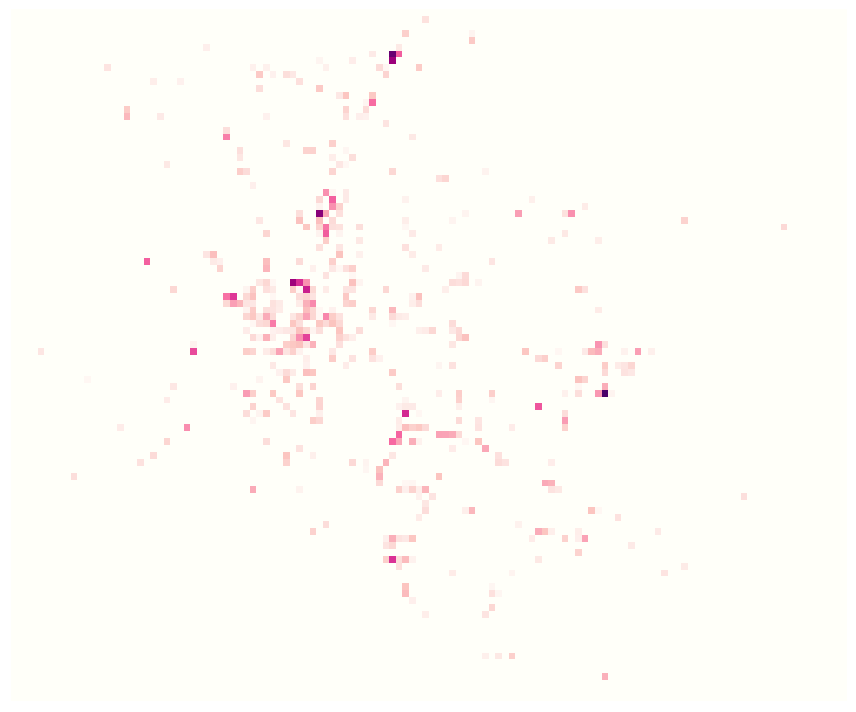

<type 'tuple'>
8


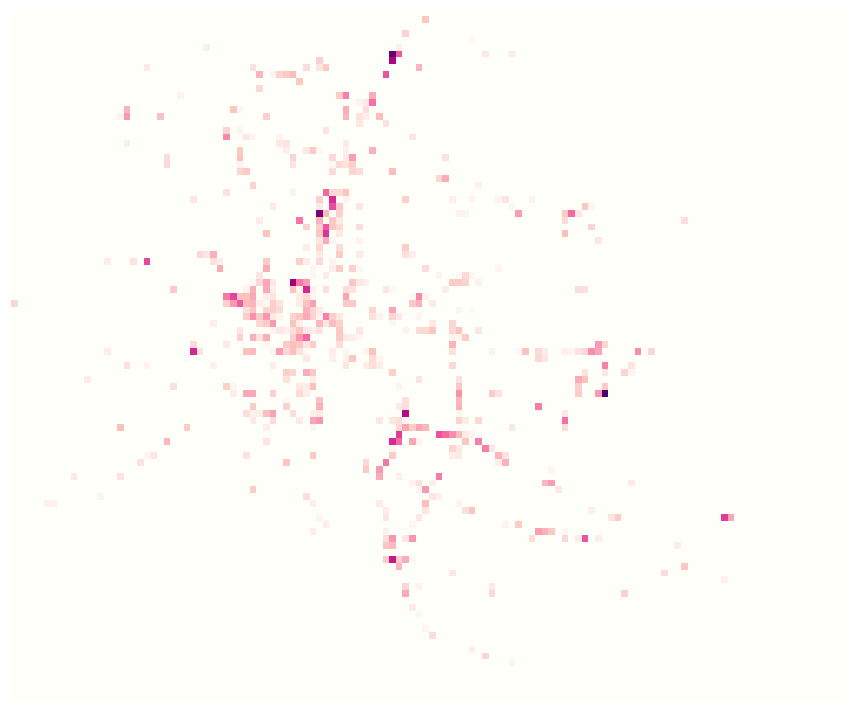

<type 'tuple'>
9


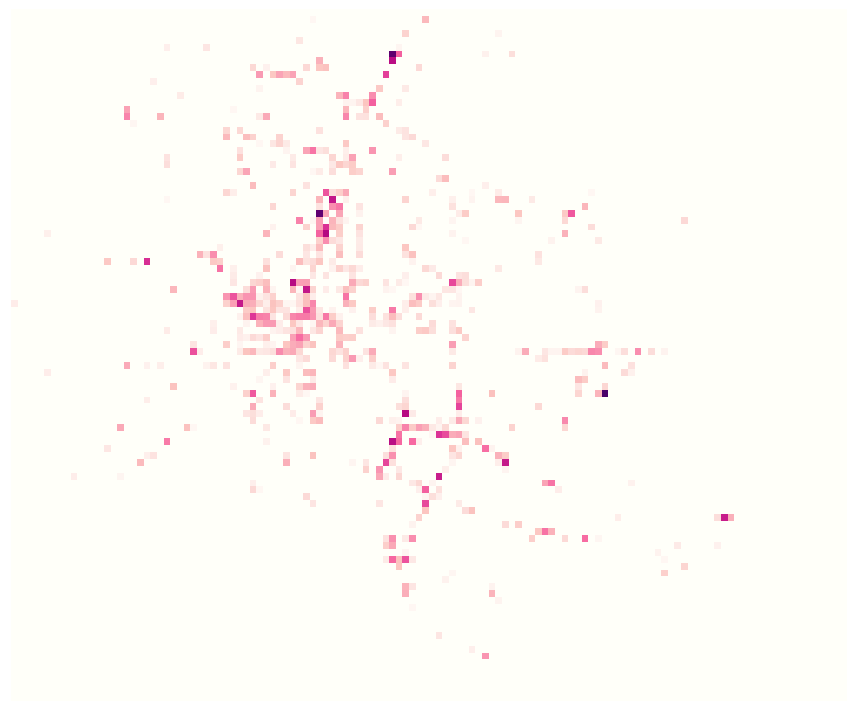

<type 'tuple'>
10


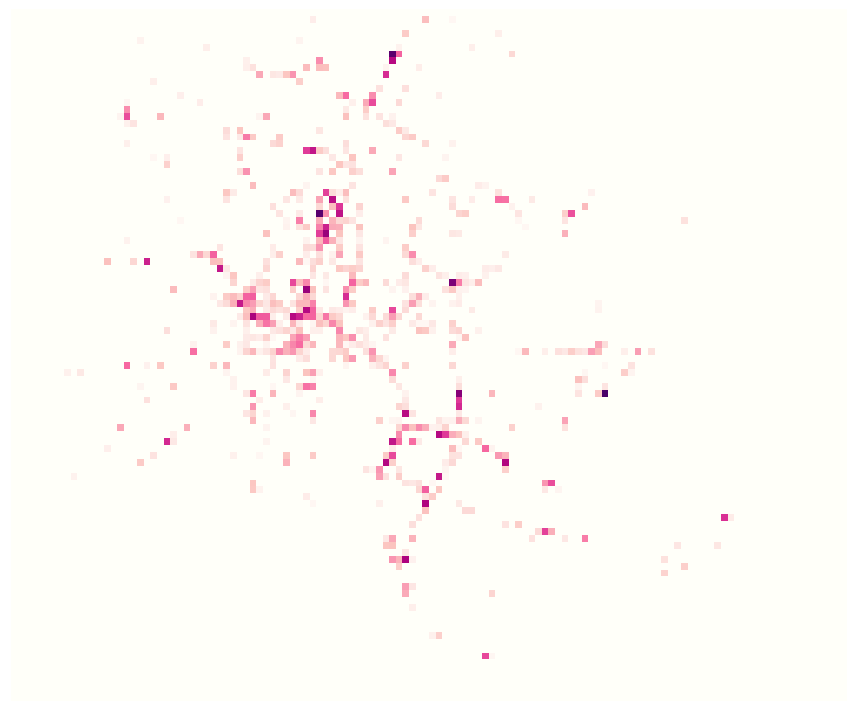

<type 'tuple'>
11


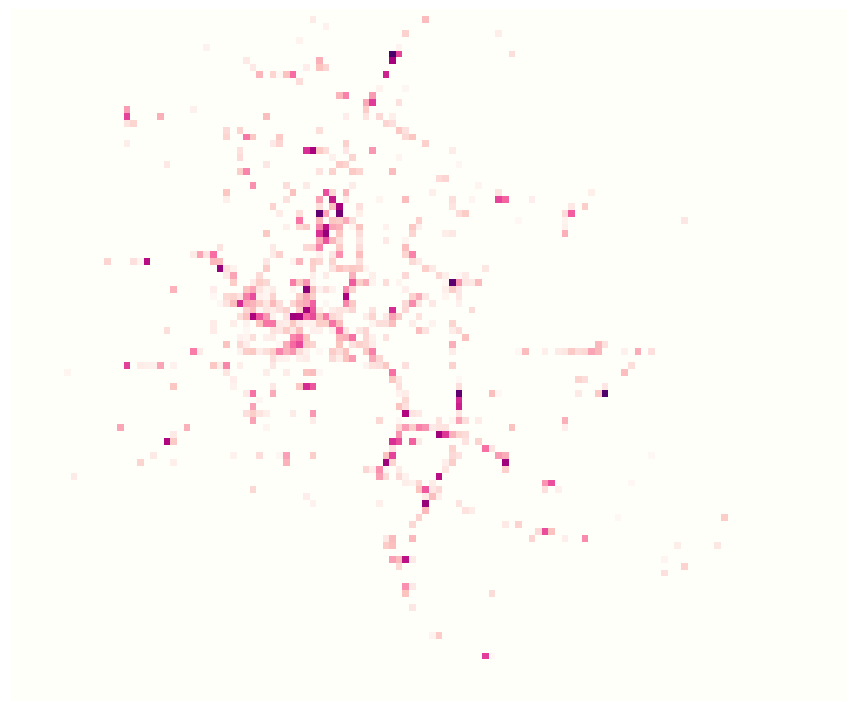

<type 'tuple'>
12


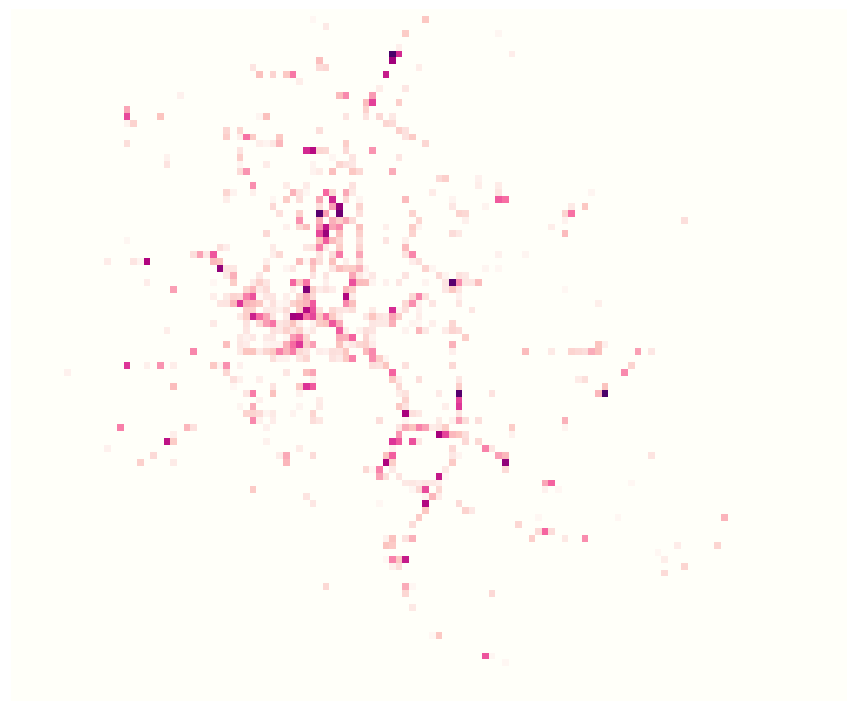

<type 'tuple'>
13


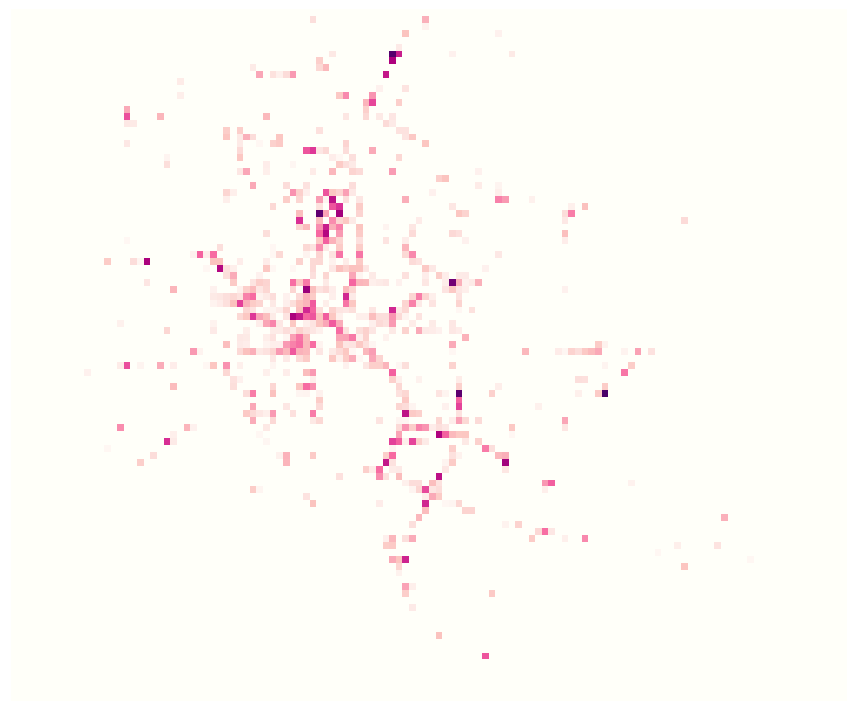

<type 'tuple'>
14


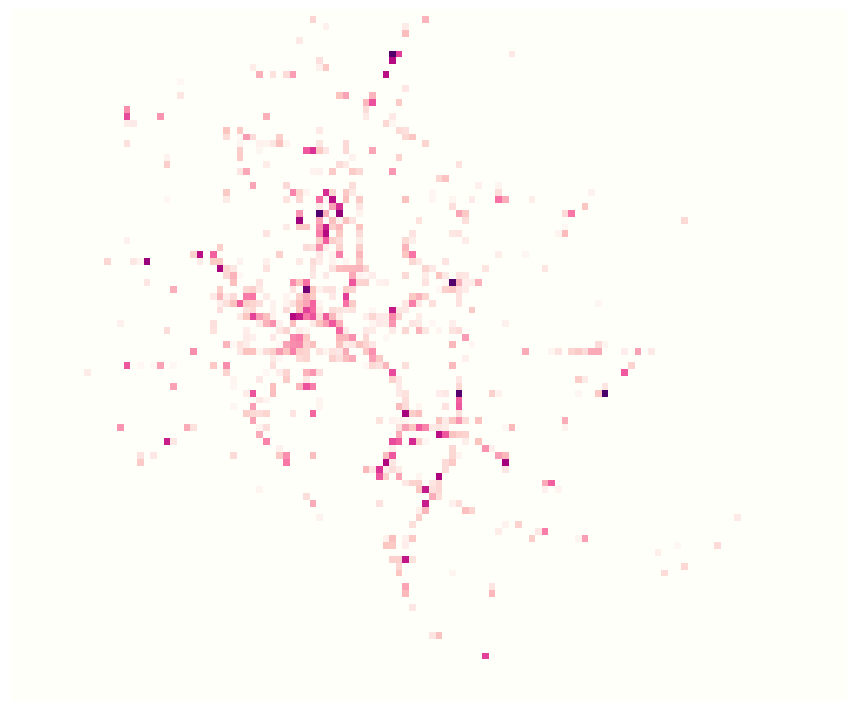

<type 'tuple'>
15


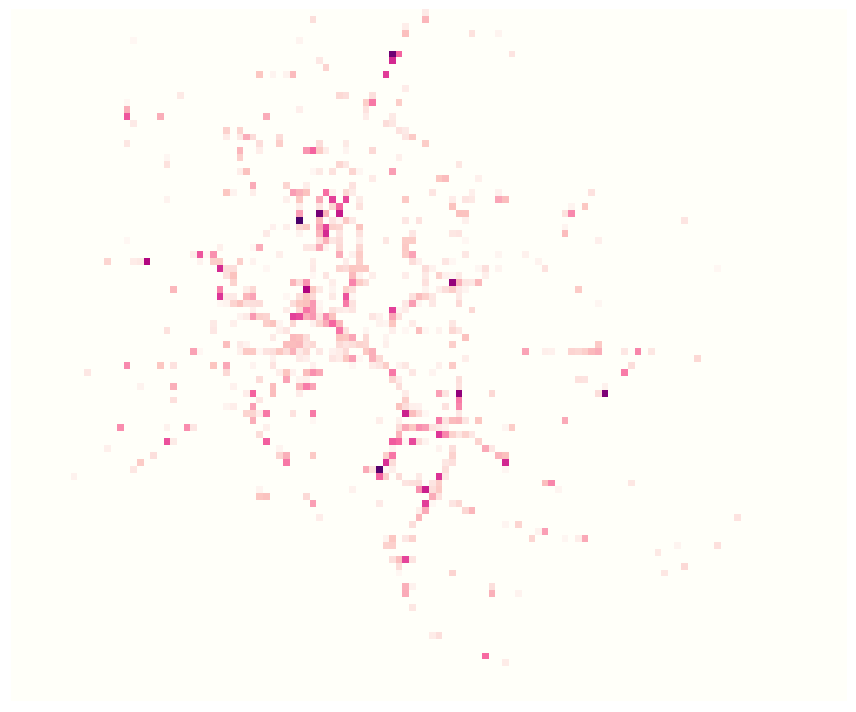

<type 'tuple'>
16


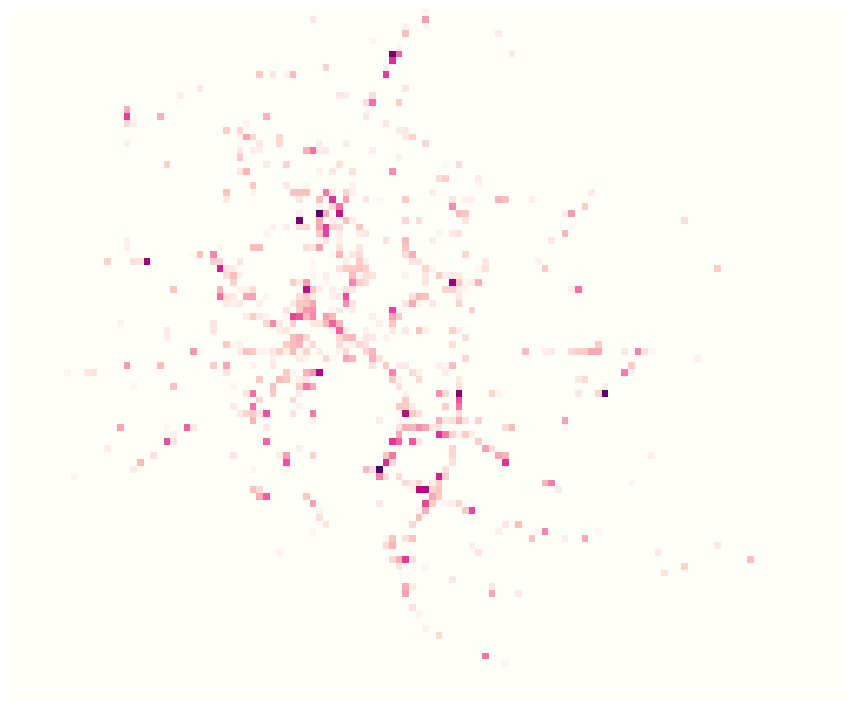

<type 'tuple'>
17


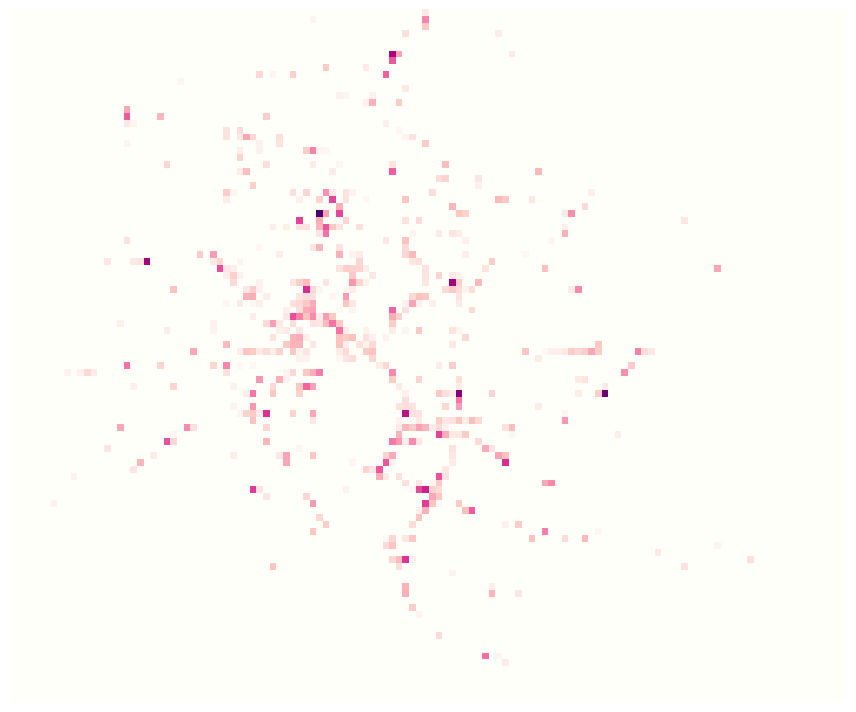

<type 'tuple'>
18


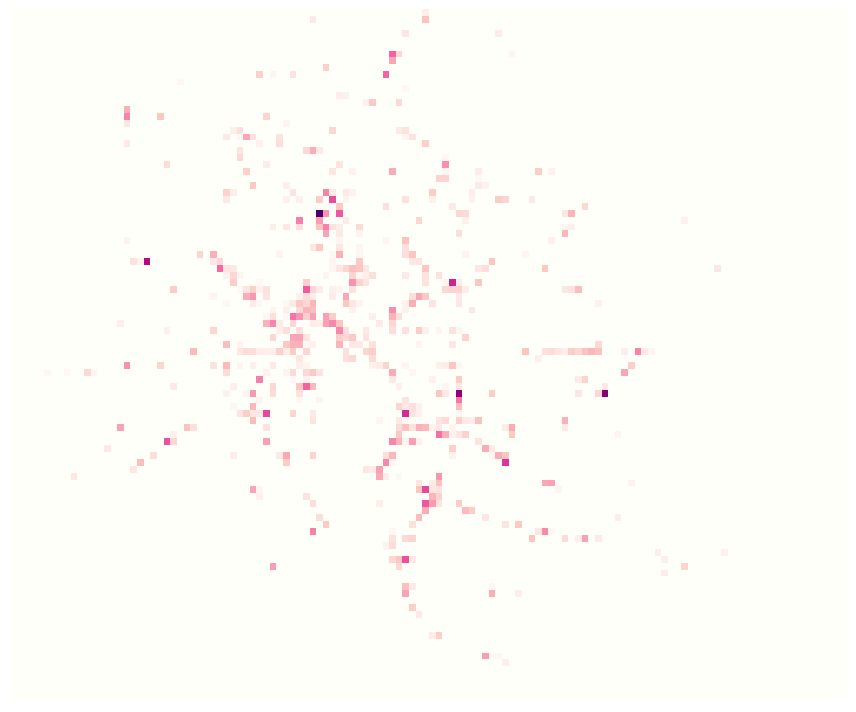

<type 'tuple'>
19


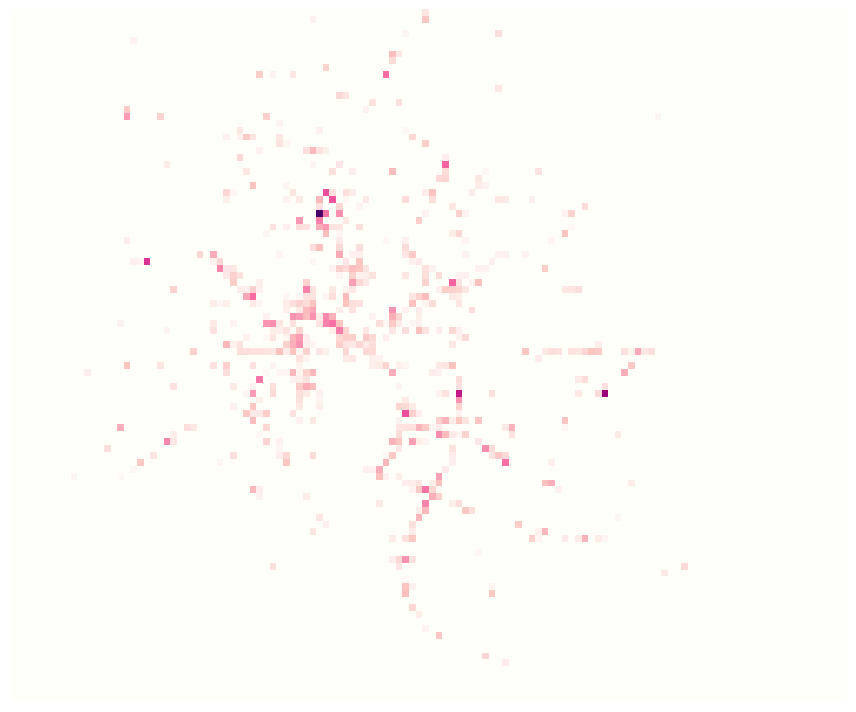

<type 'tuple'>
20


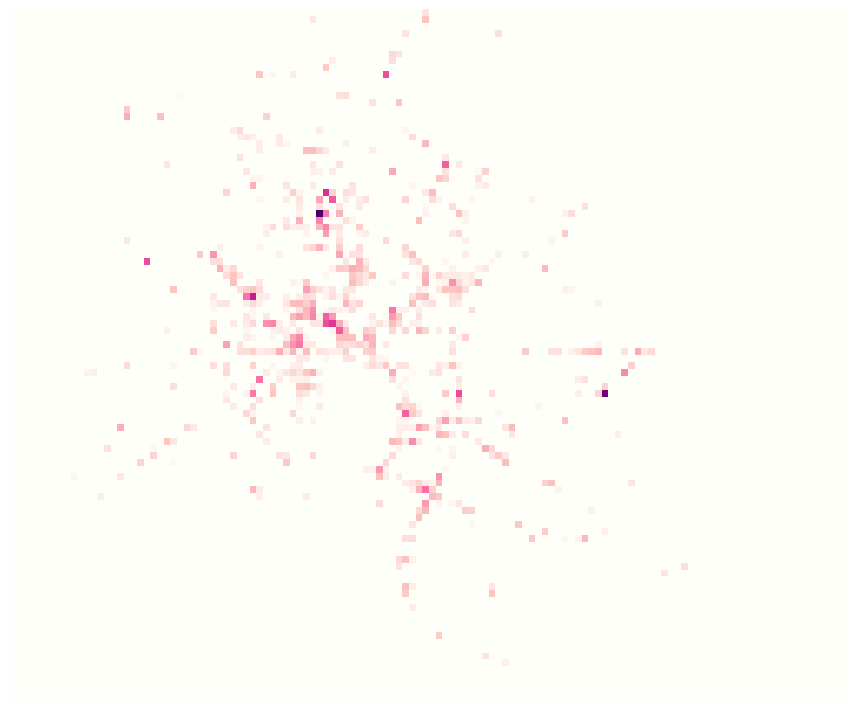

<type 'tuple'>
21


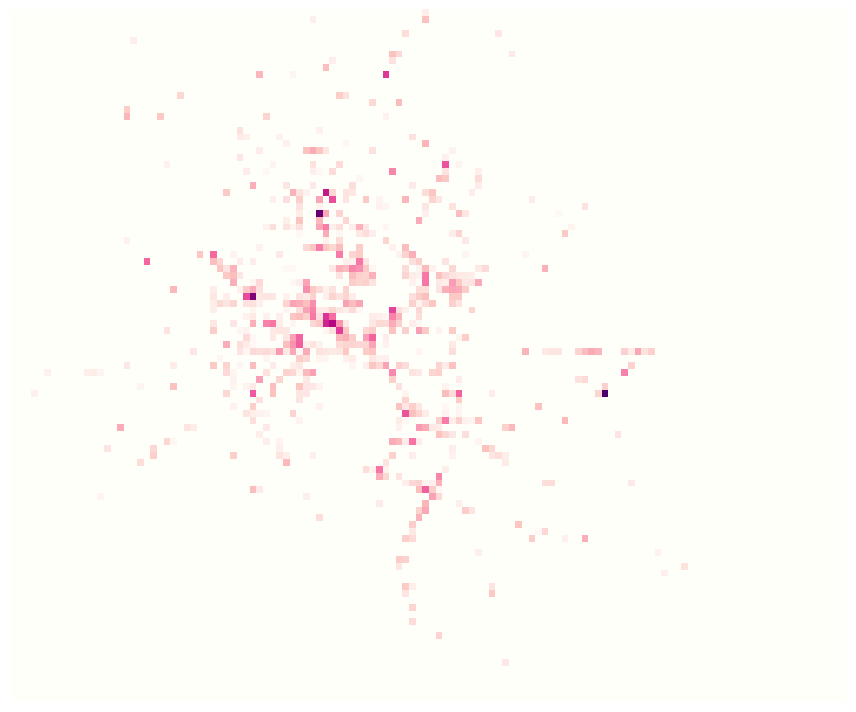

<type 'tuple'>
22


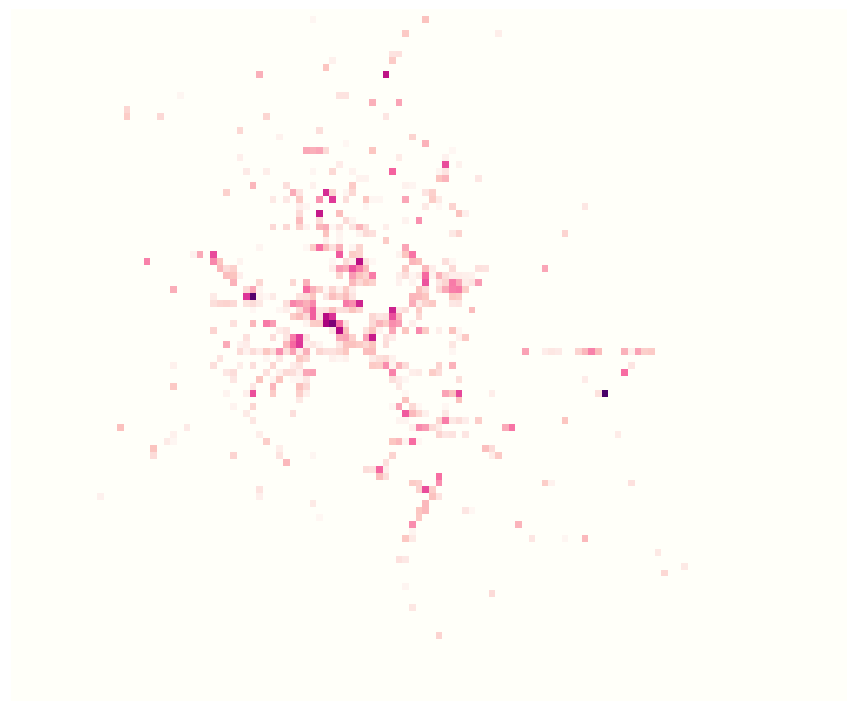

<type 'tuple'>
23


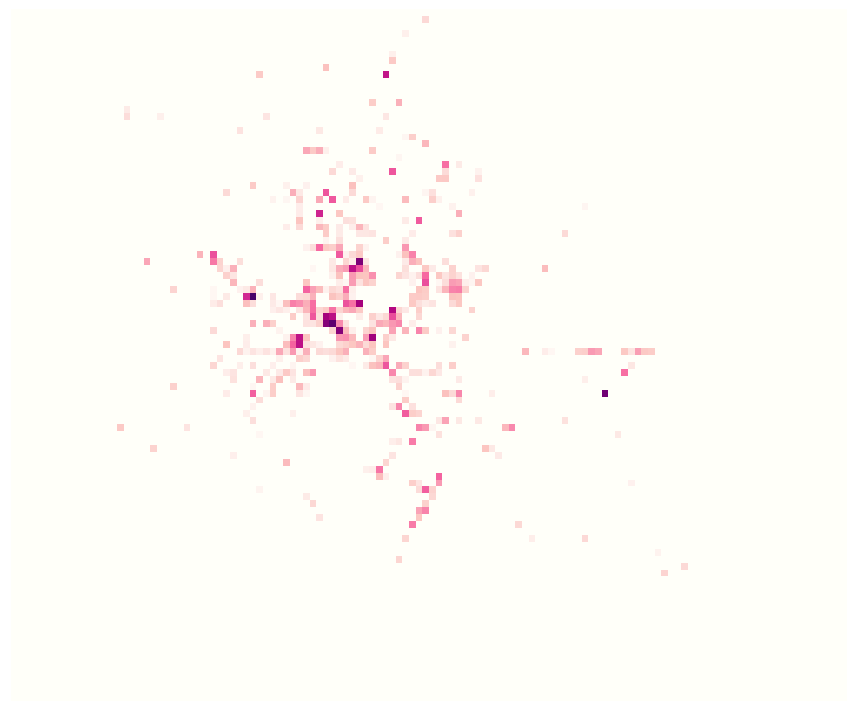

<type 'tuple'>


In [11]:
bkk = [13.7563, 100.5018]
for i in range(24):
    print(i)
    temp = datao[(datao['dt'].dt.hour == i)]
    fig = density_map(temp.latitude, temp.longitude, center=bkk, hr=i, plot=True, trip='O')

## 'D' - 'O'

In [ ]:
# def density_map(latitudes, longitudes, center, hr, plot, trip, bins=(126,100), radius=0.4):  

0
<type 'tuple'>
<type 'tuple'>
check


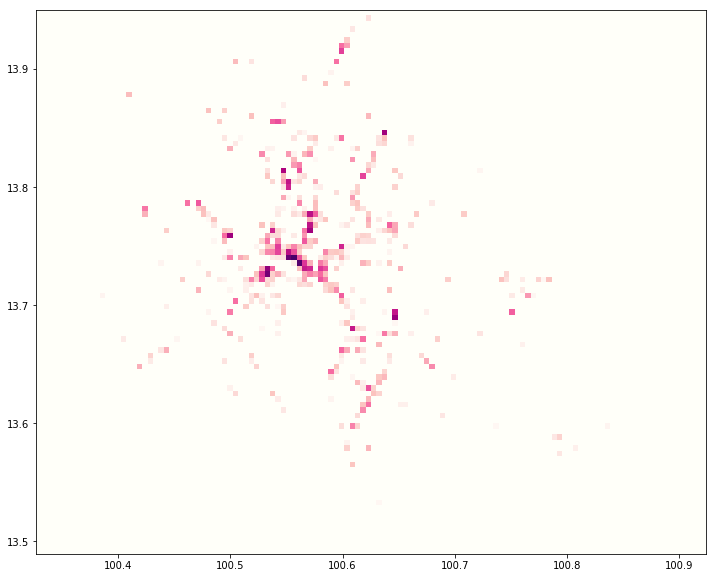

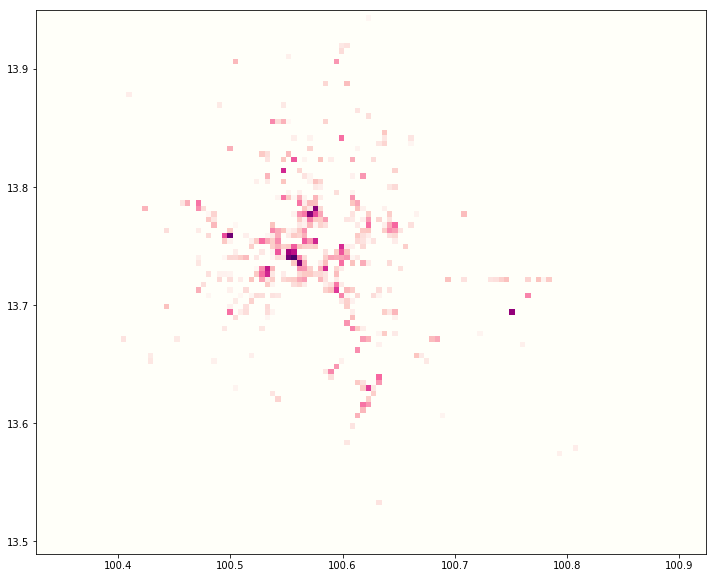

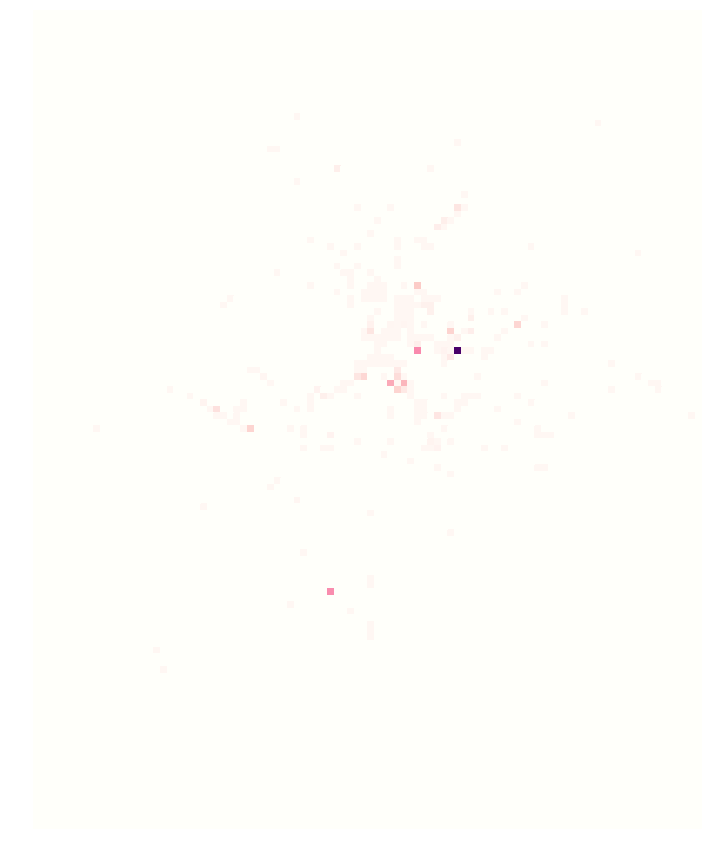

1
<type 'tuple'>
<type 'tuple'>
check


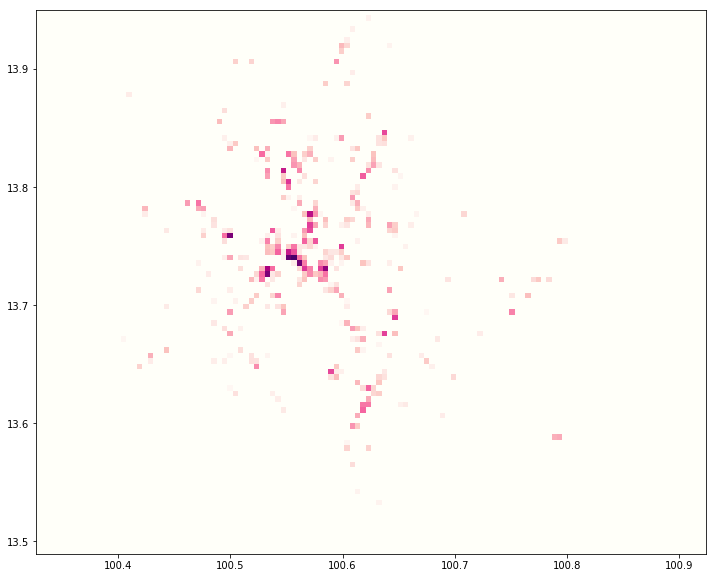

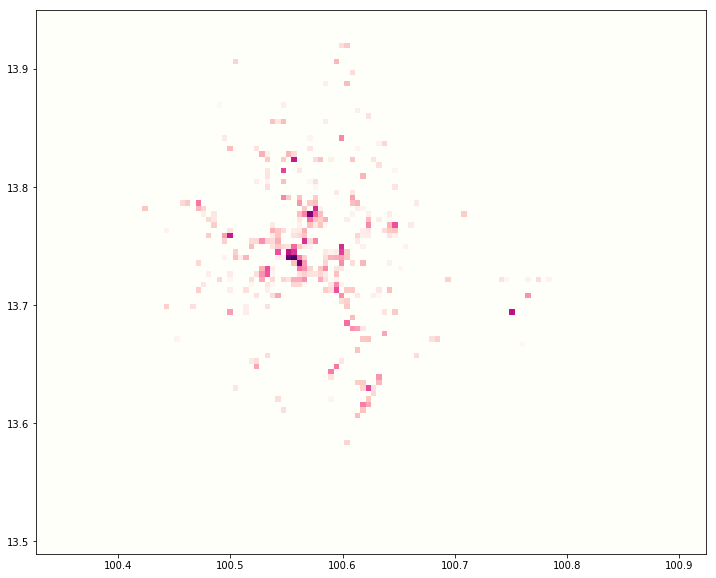

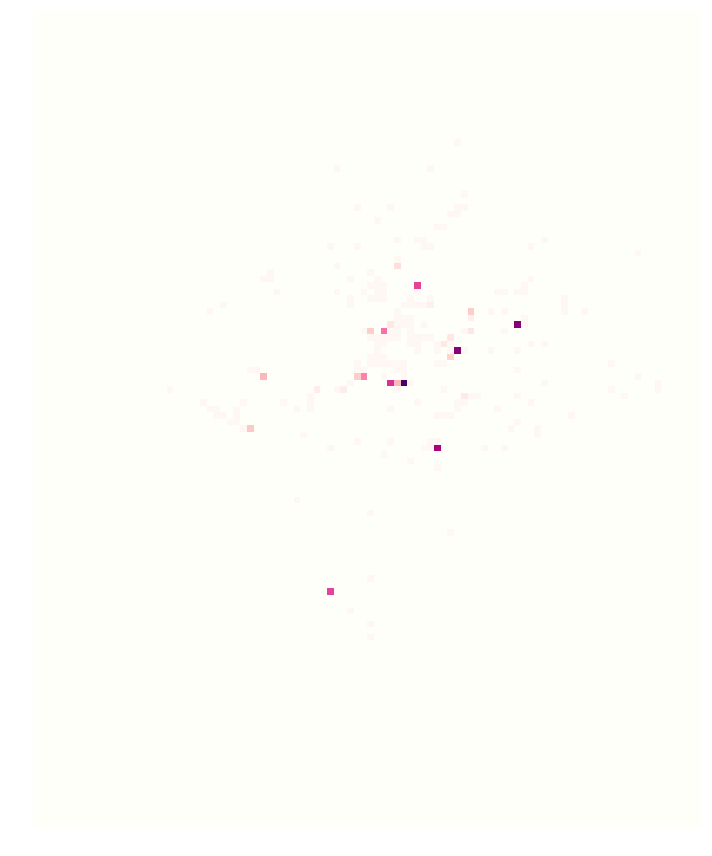

2
<type 'tuple'>
<type 'tuple'>
check


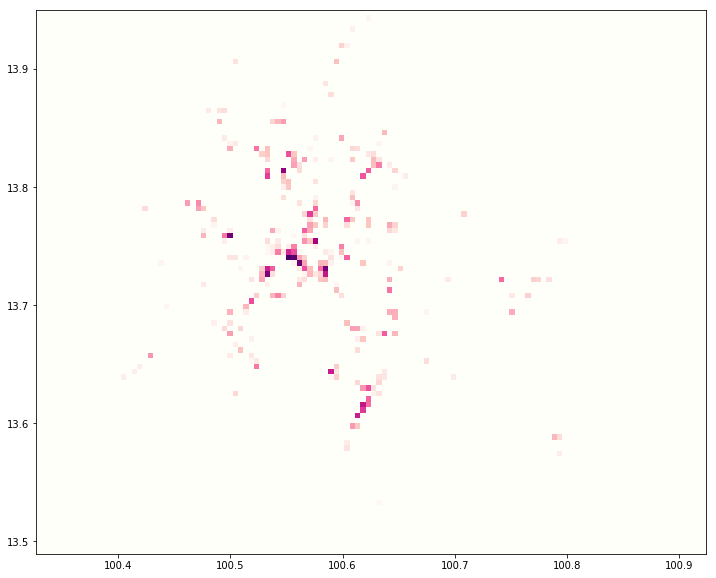

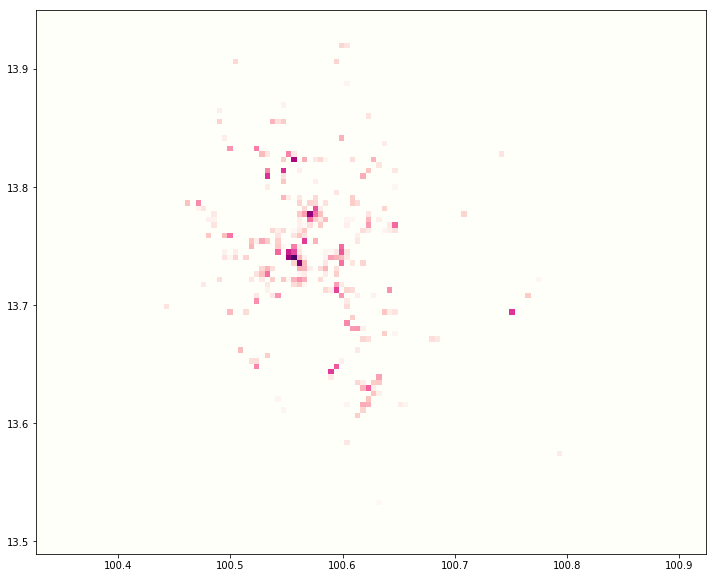

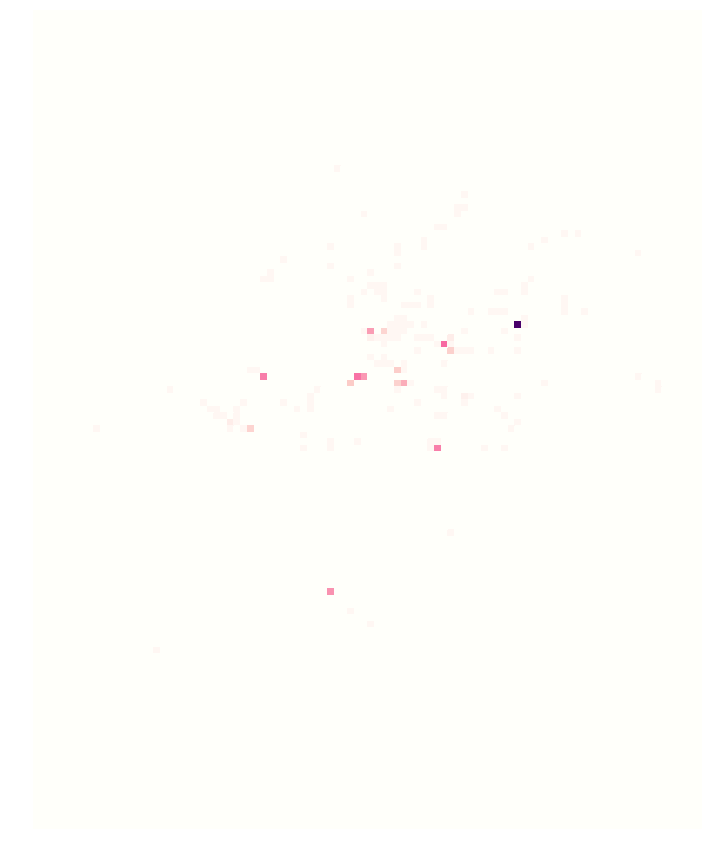

3
<type 'tuple'>
<type 'tuple'>
check


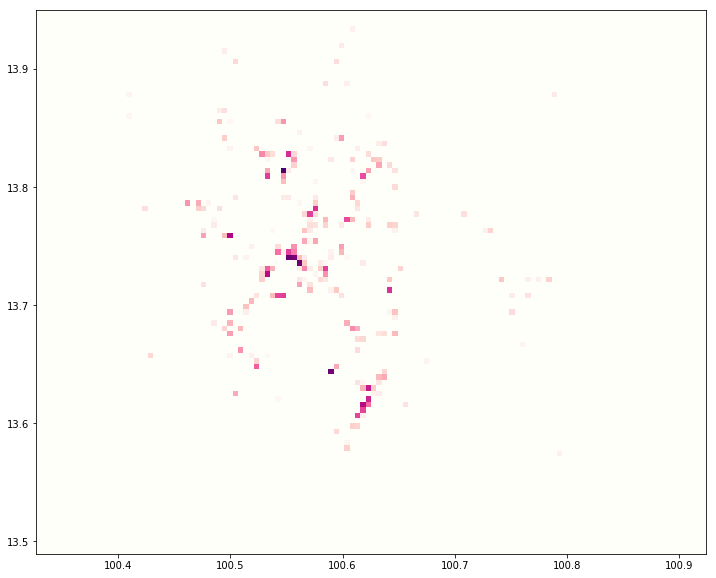

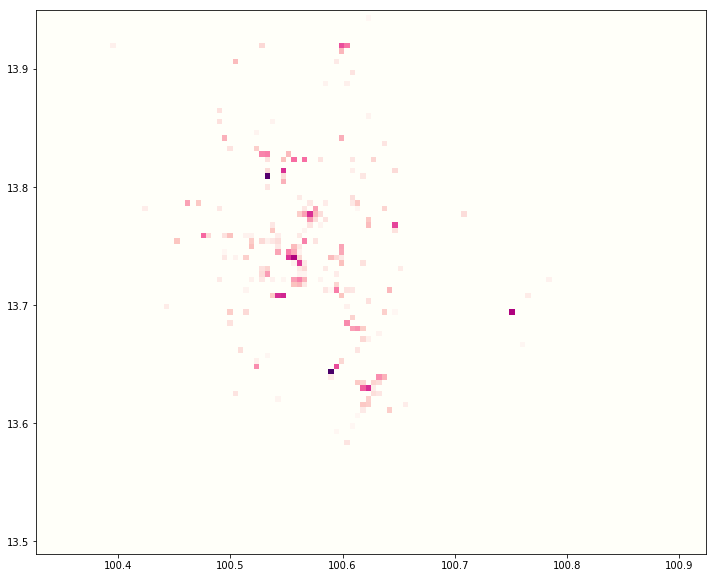

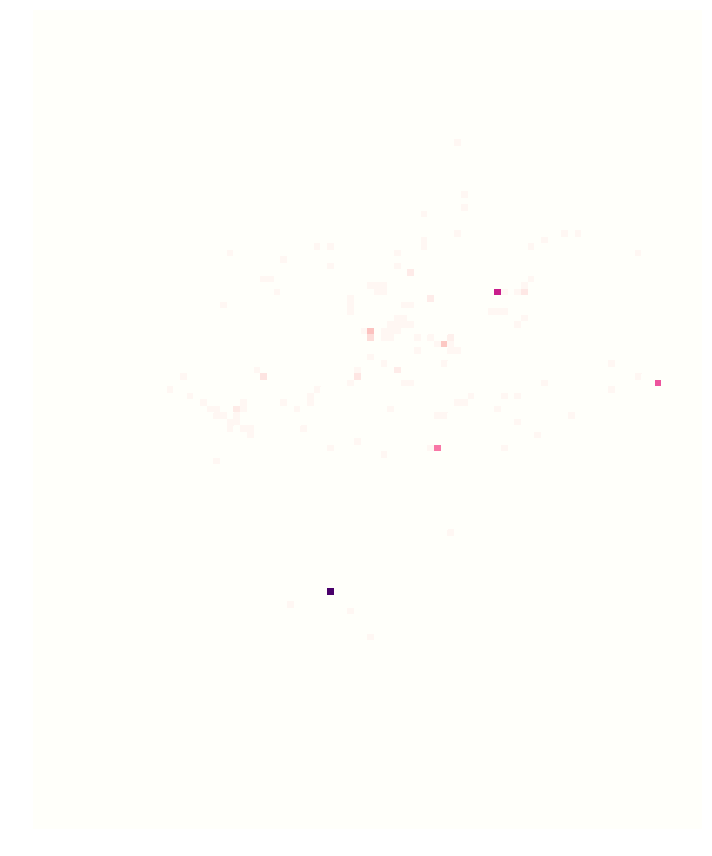

4
<type 'tuple'>
<type 'tuple'>
check


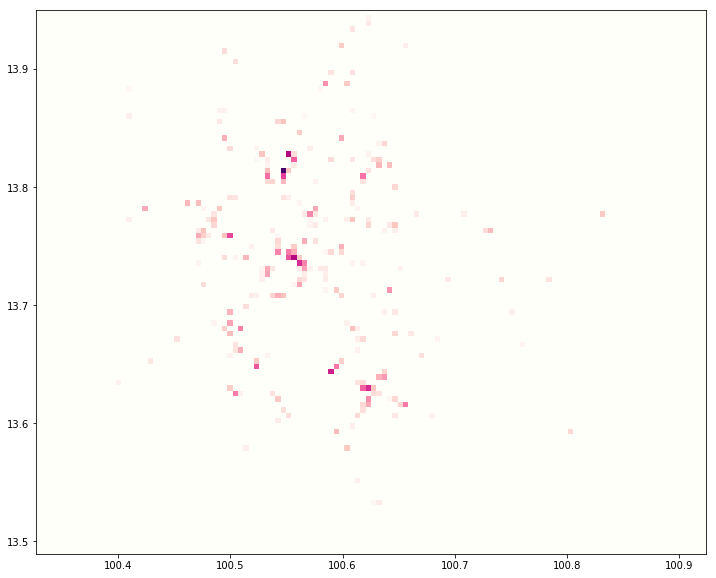

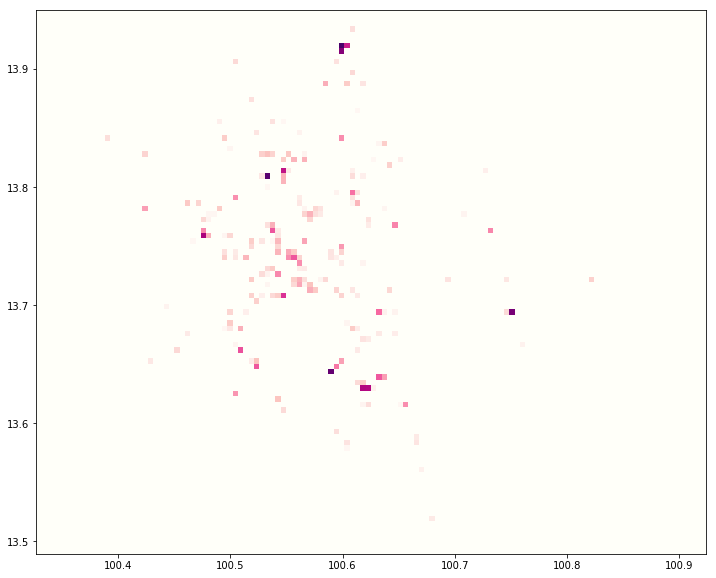

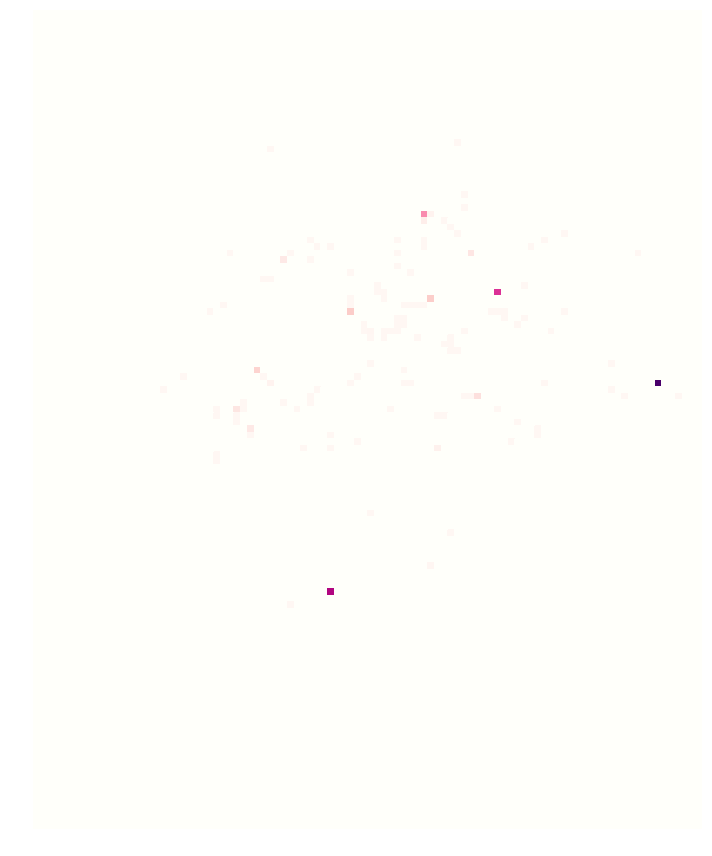

5
<type 'tuple'>
<type 'tuple'>
check


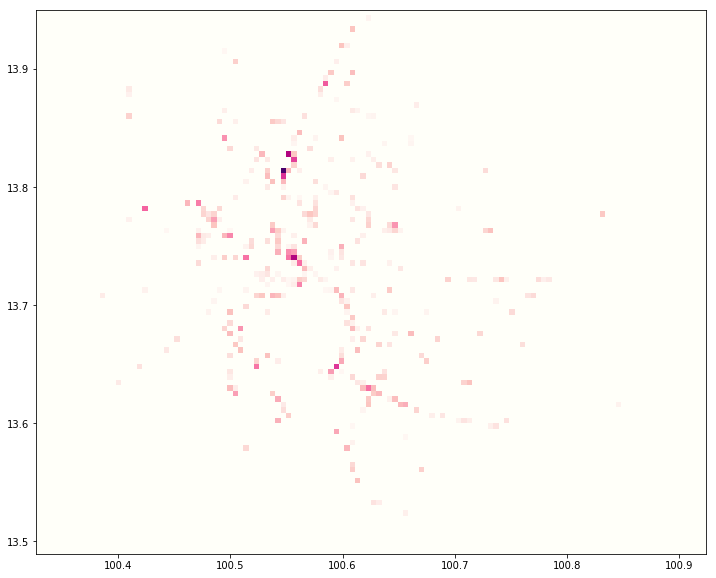

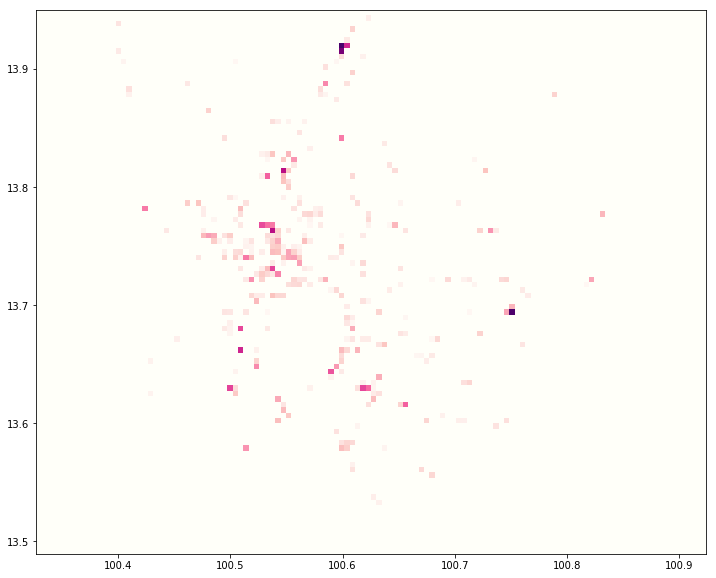

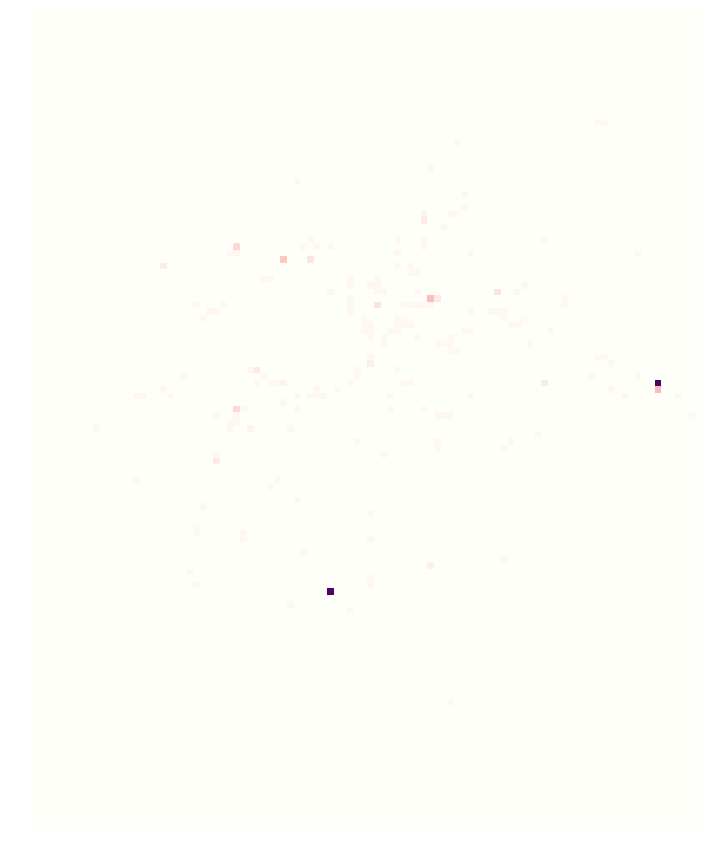

6
<type 'tuple'>
<type 'tuple'>
check


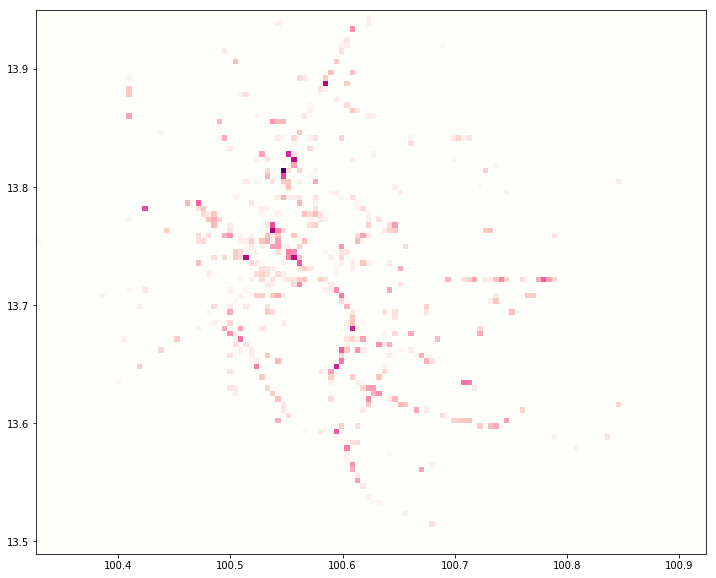

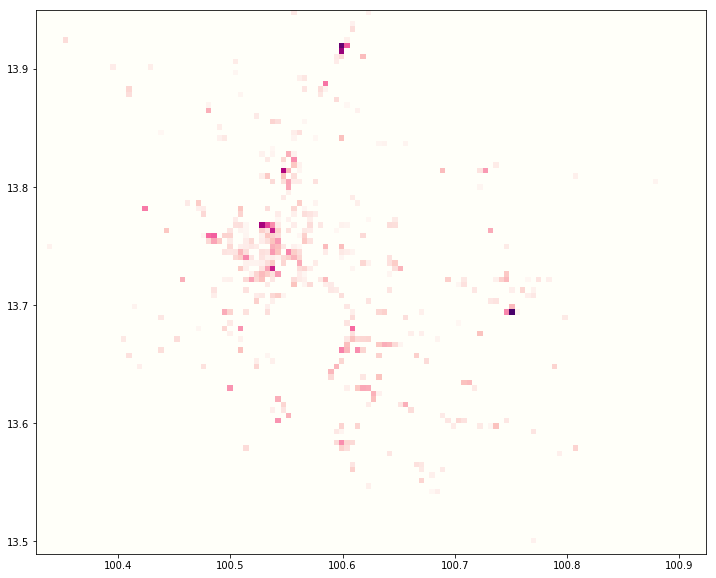

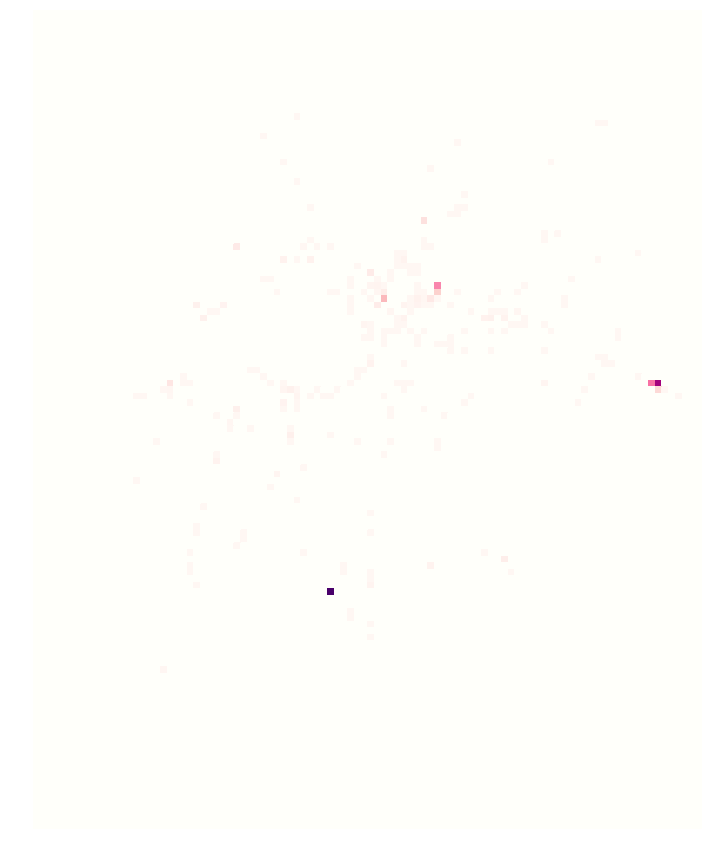

7
<type 'tuple'>
<type 'tuple'>
check


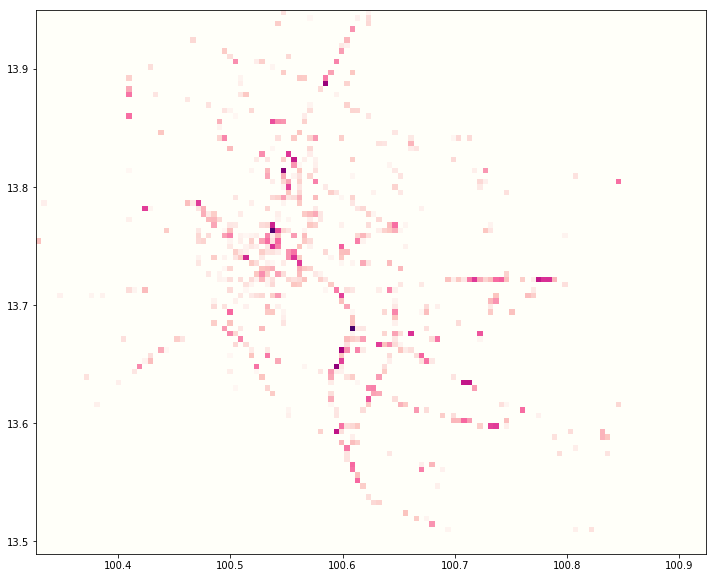

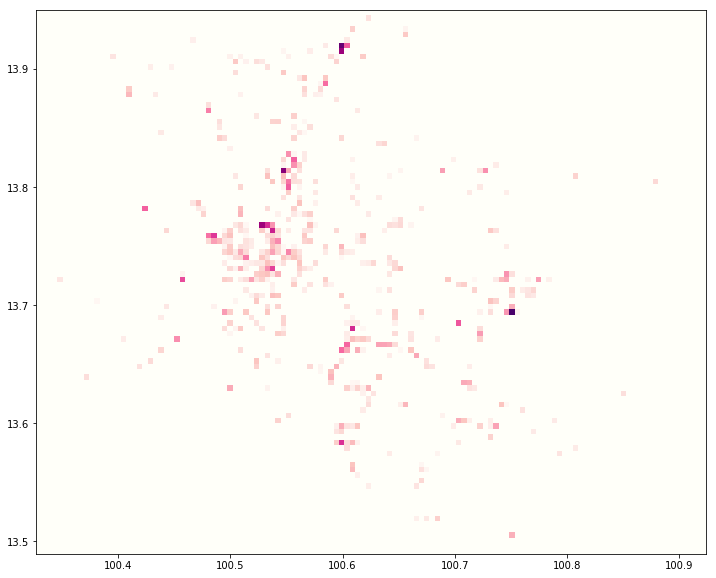

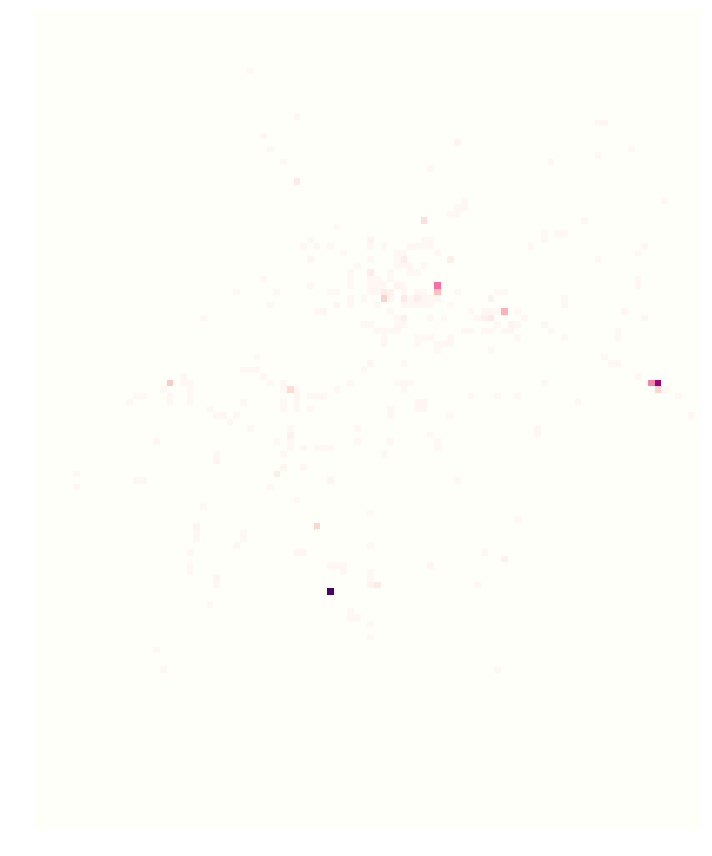

8
<type 'tuple'>
<type 'tuple'>
check


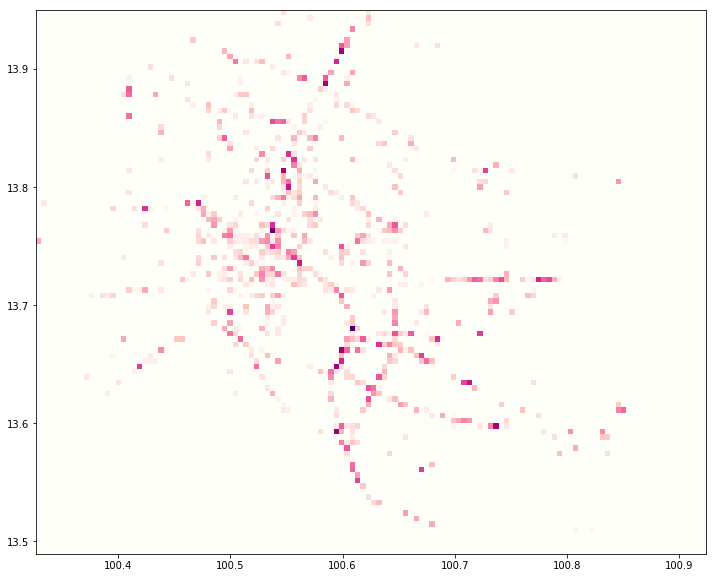

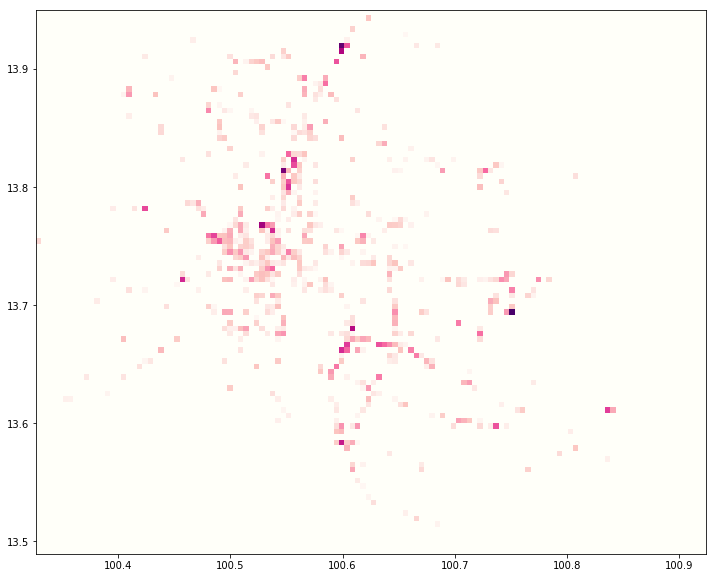

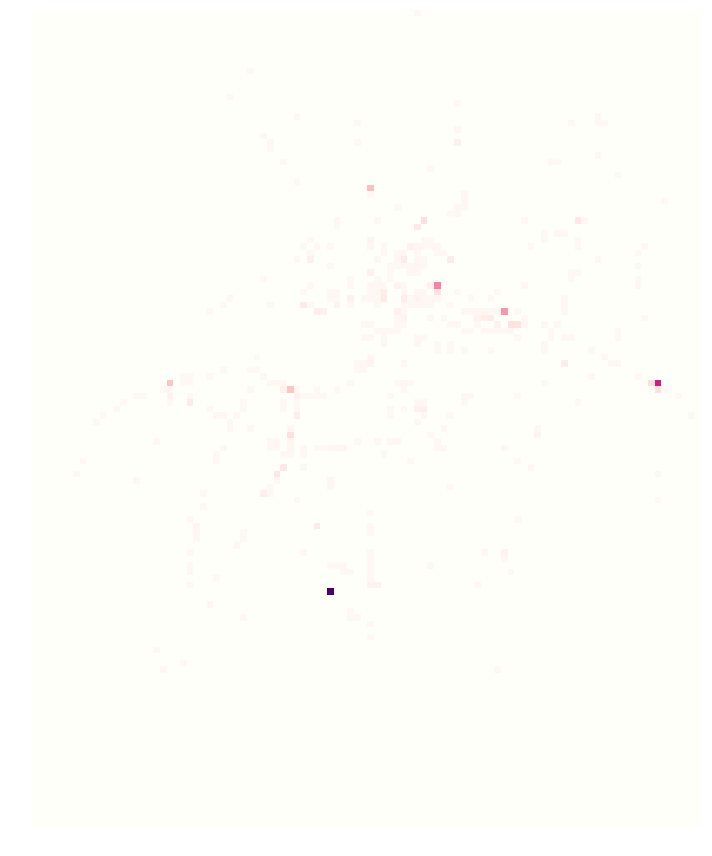

9
<type 'tuple'>
<type 'tuple'>
check


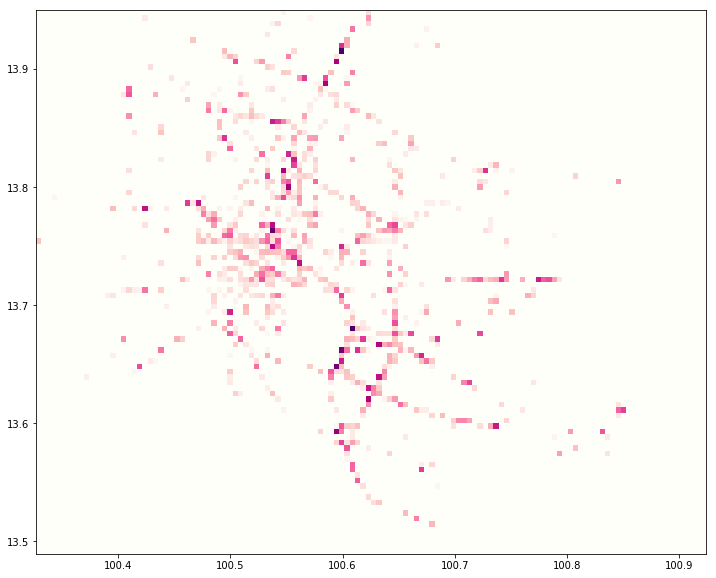

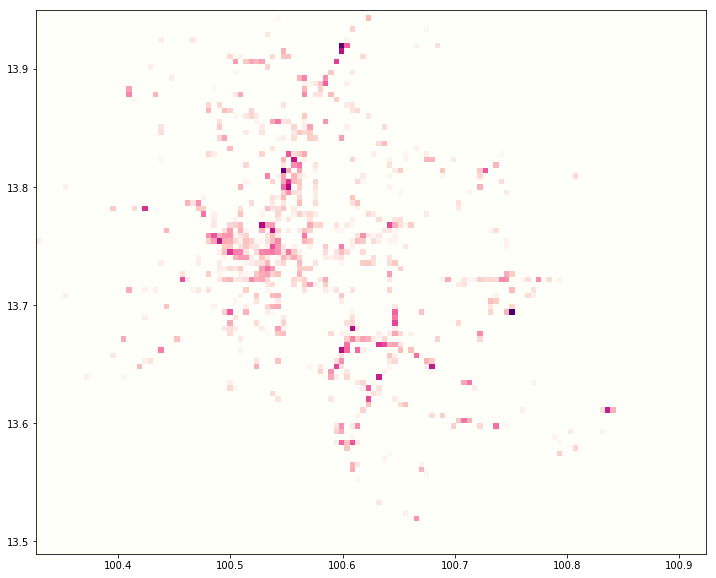

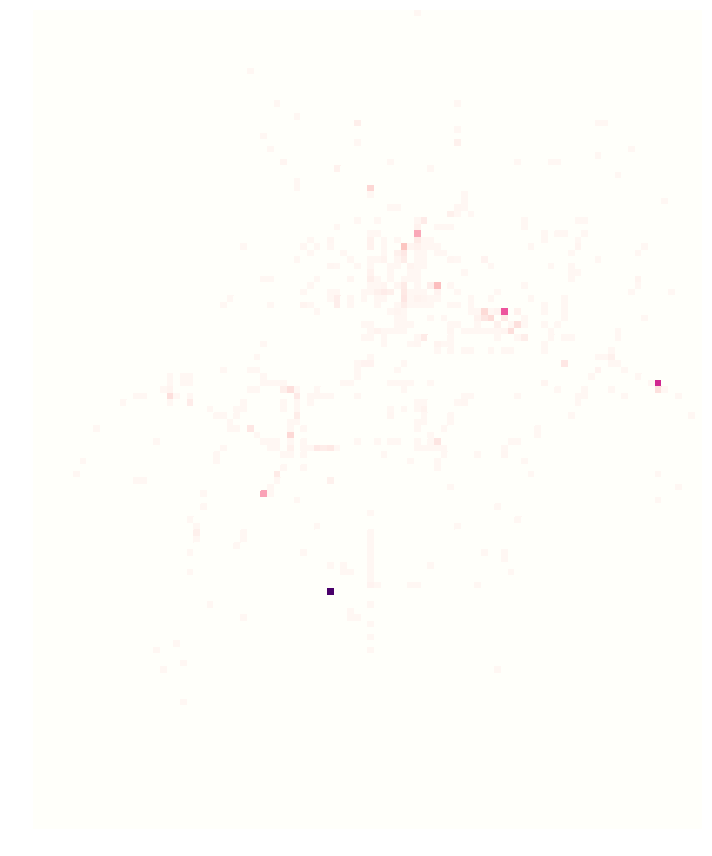

10
<type 'tuple'>
<type 'tuple'>
check


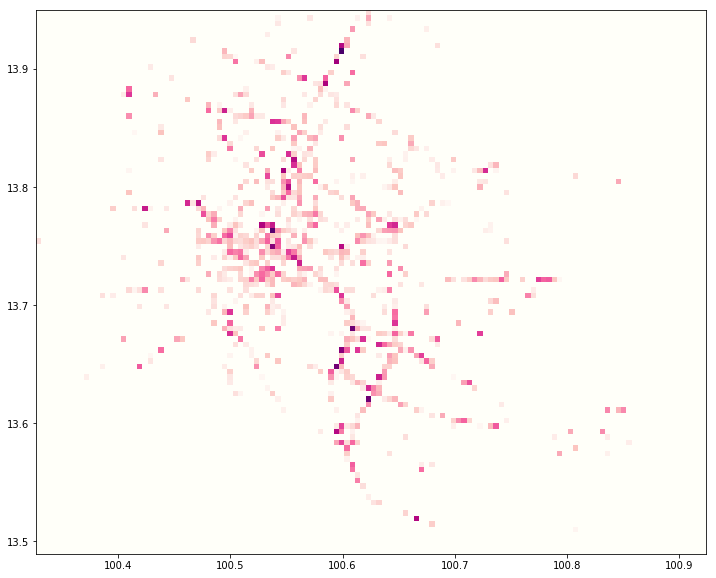

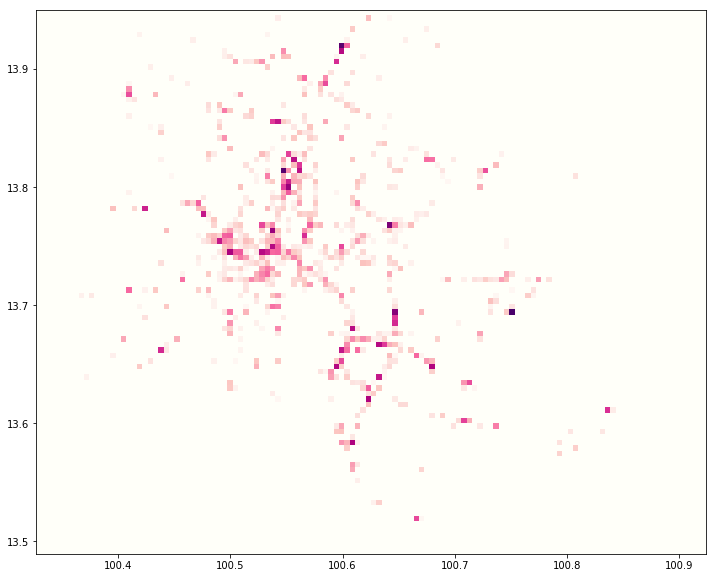

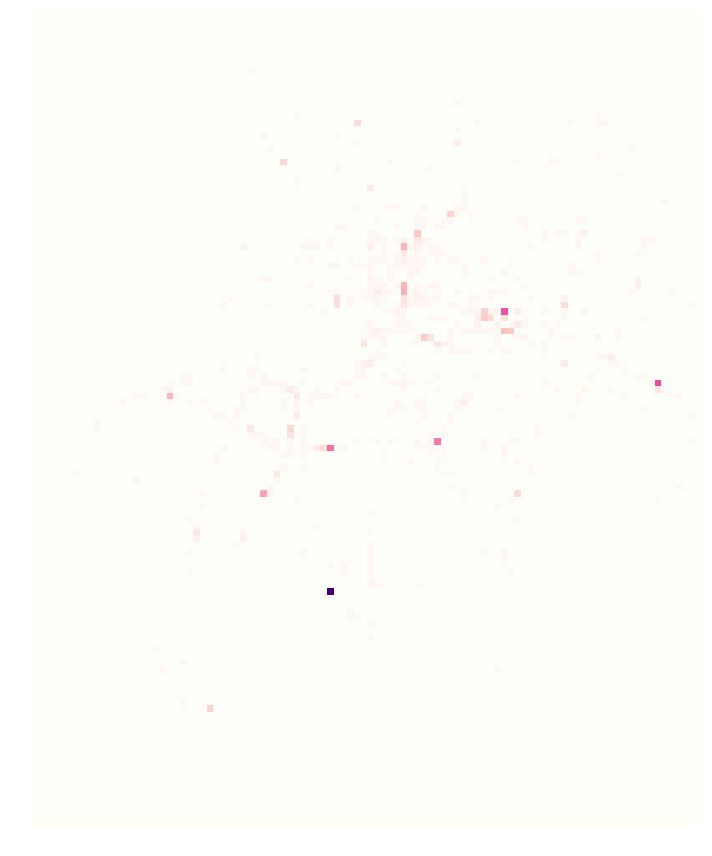

11
<type 'tuple'>
<type 'tuple'>
check


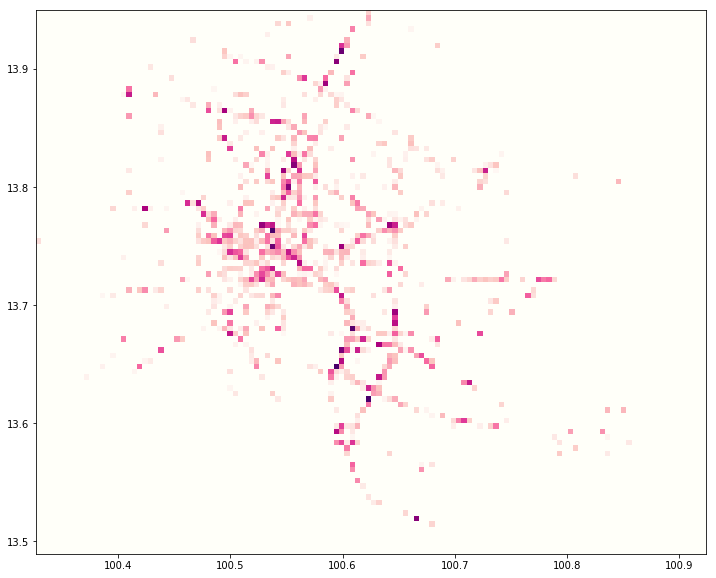

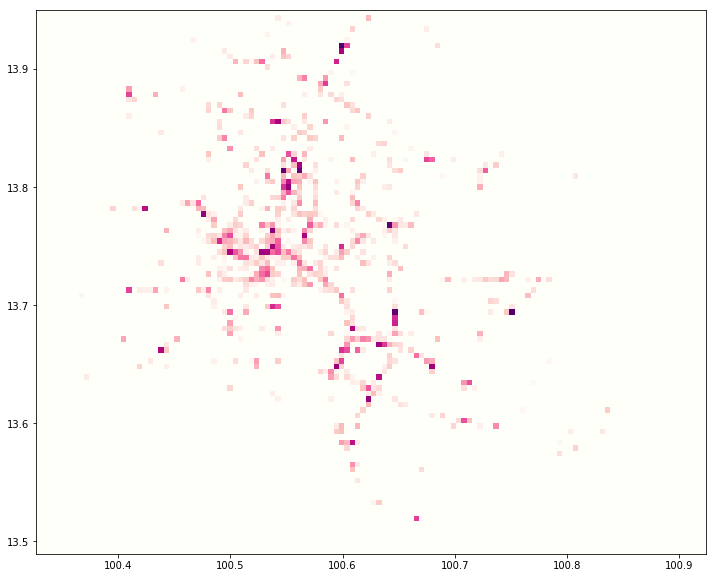

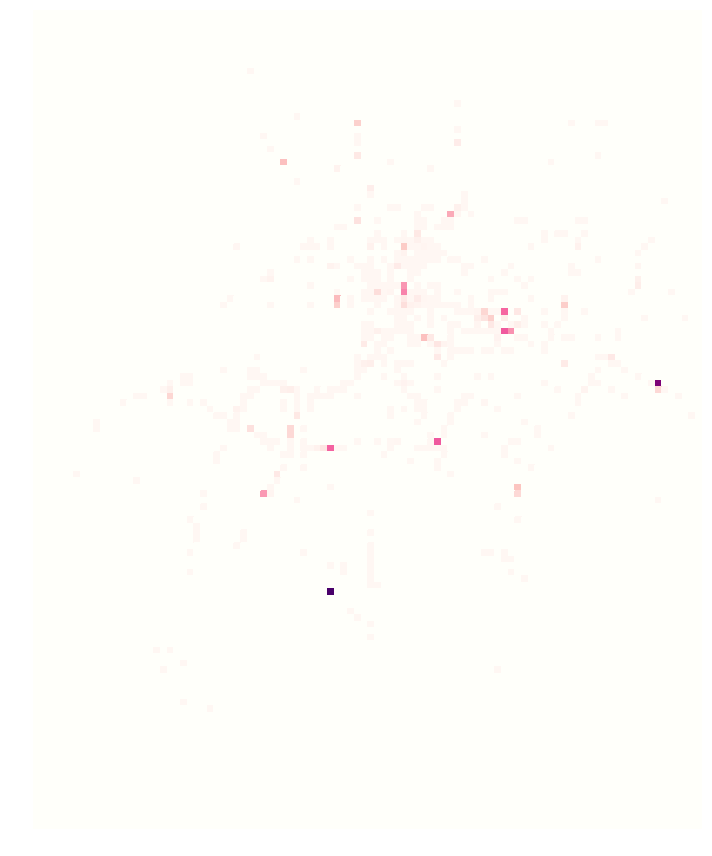

12
<type 'tuple'>
<type 'tuple'>
check


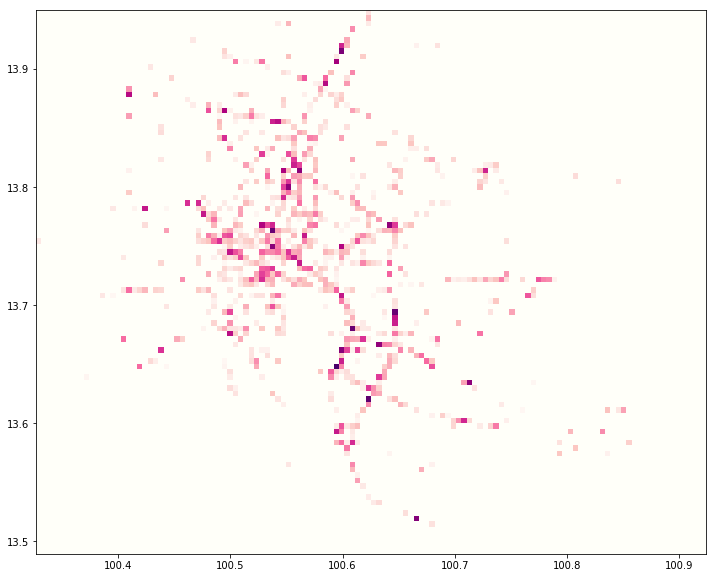

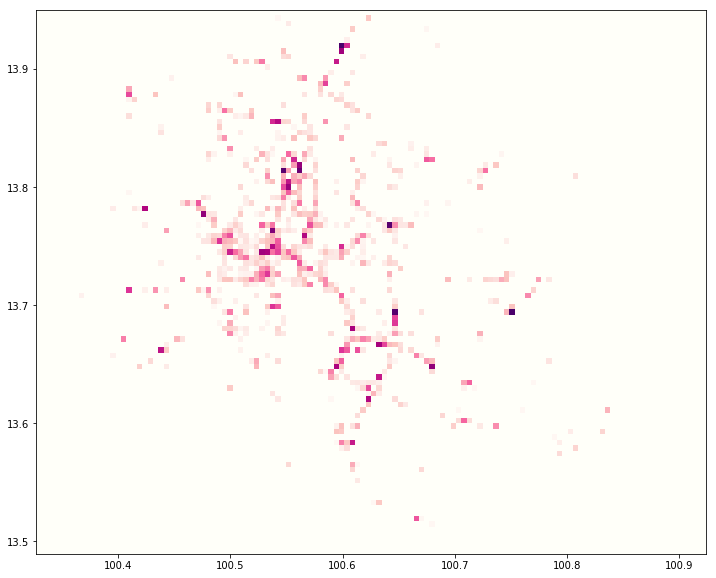

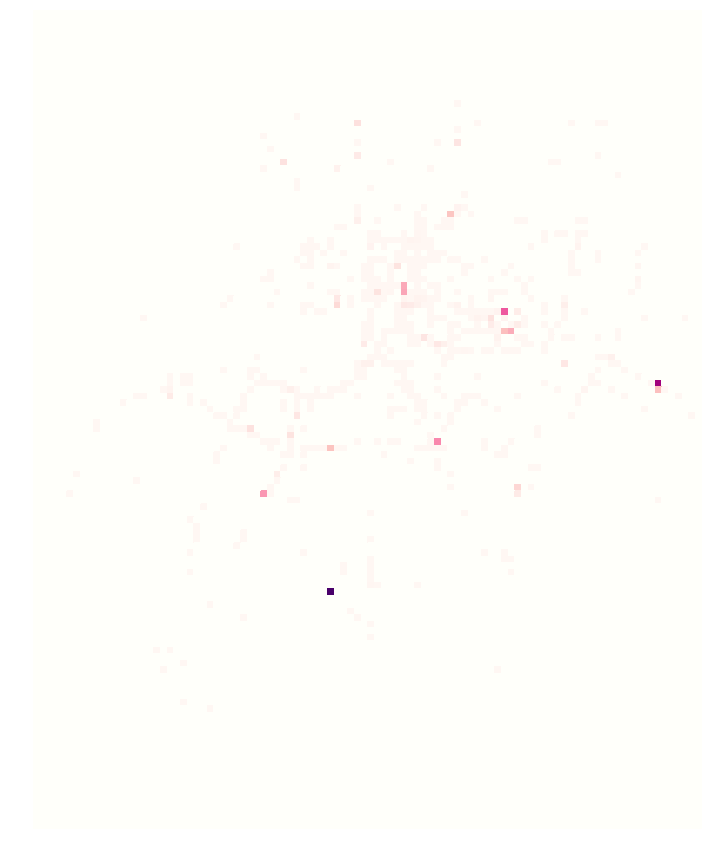

13
<type 'tuple'>
<type 'tuple'>
check


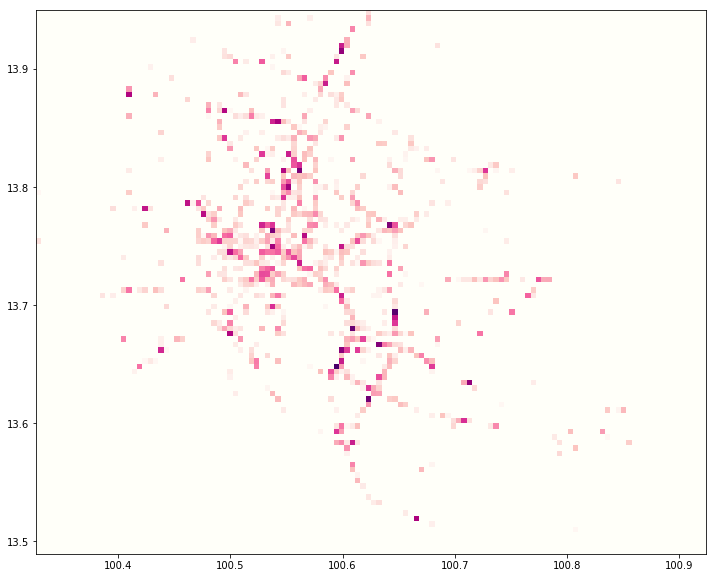

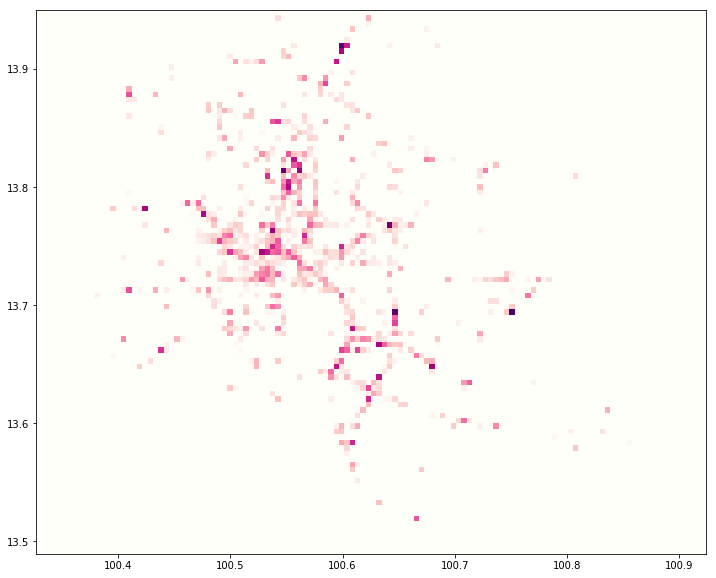

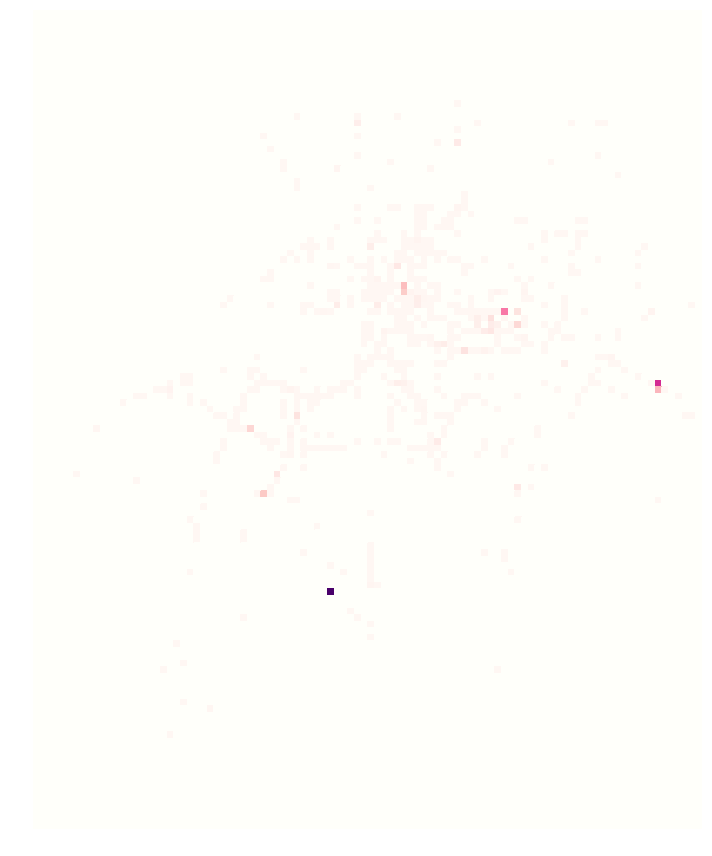

14
<type 'tuple'>
<type 'tuple'>
check


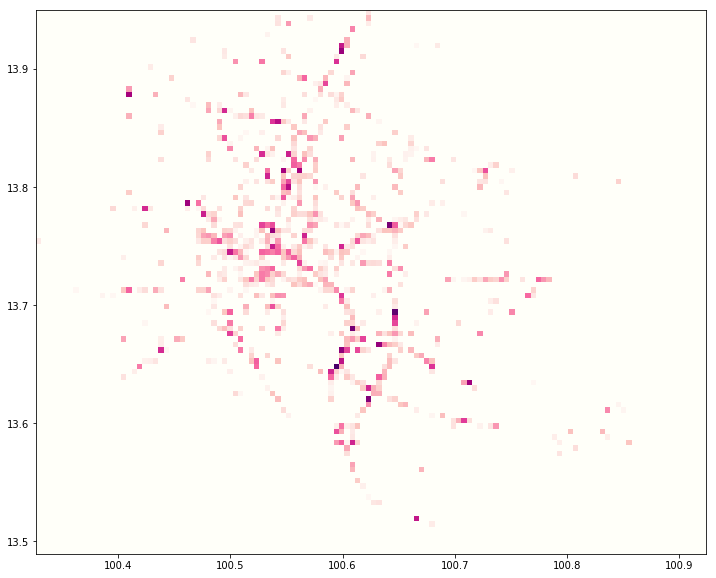

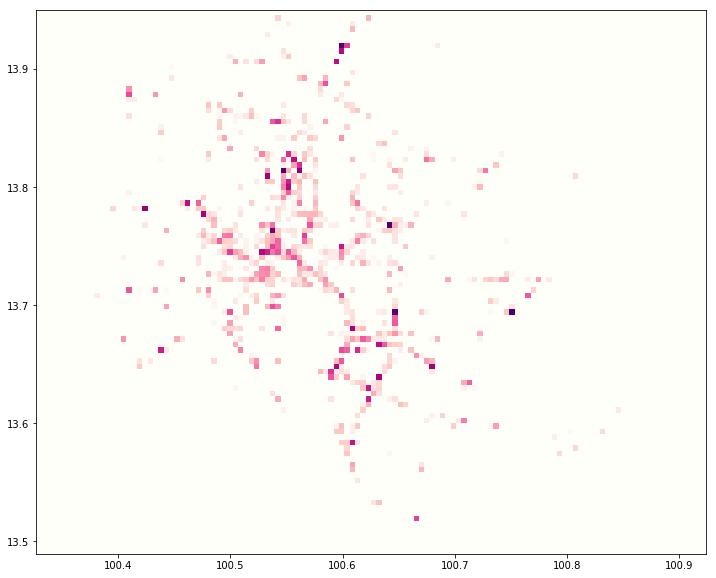

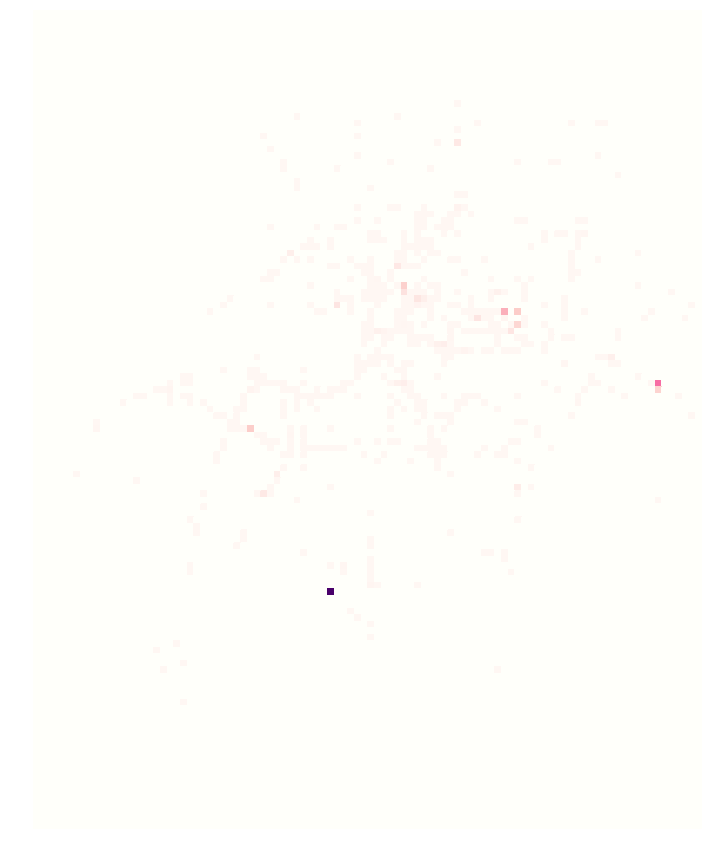

15
<type 'tuple'>
<type 'tuple'>
check


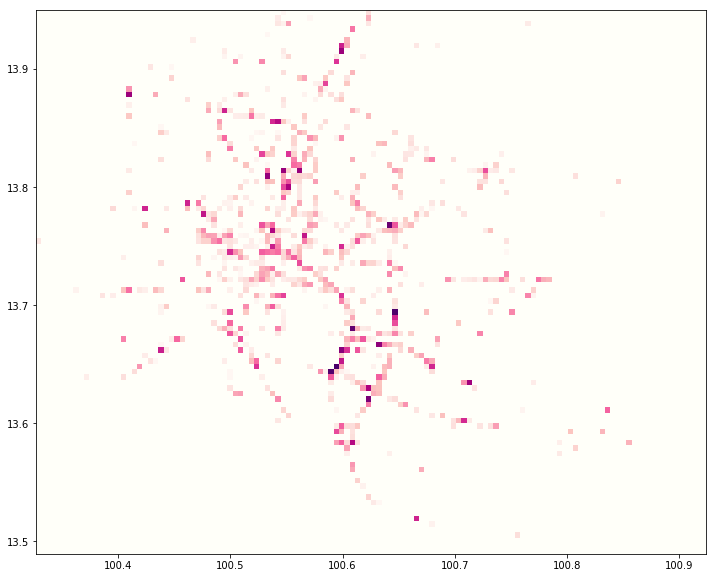

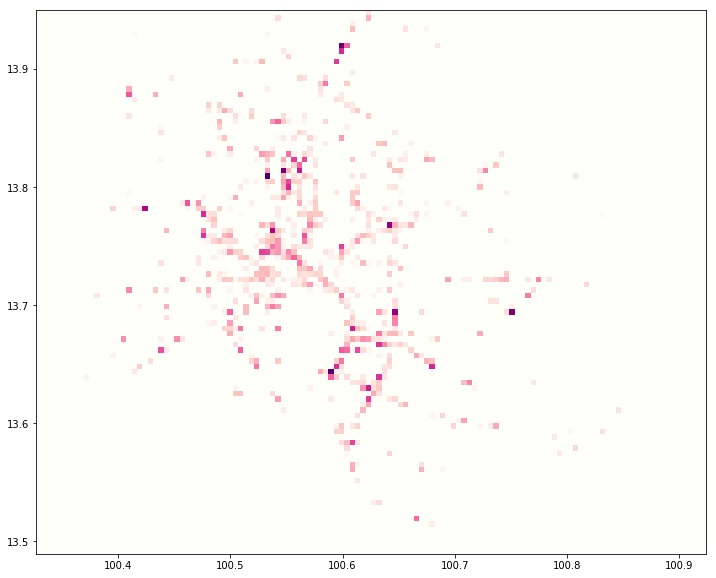

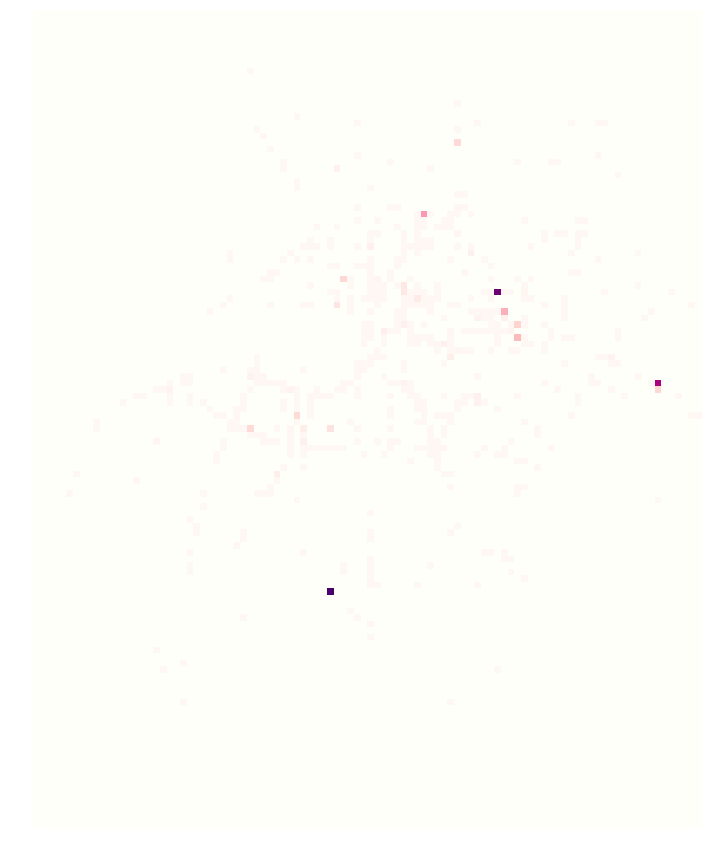

16
<type 'tuple'>
<type 'tuple'>
check


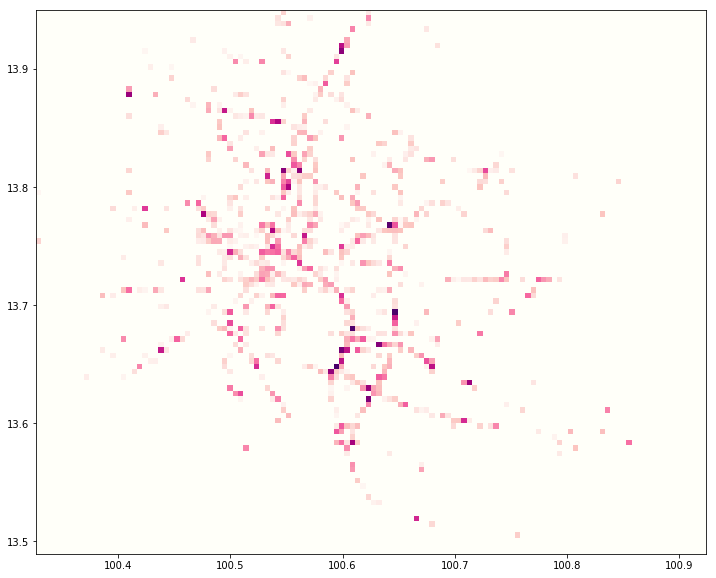

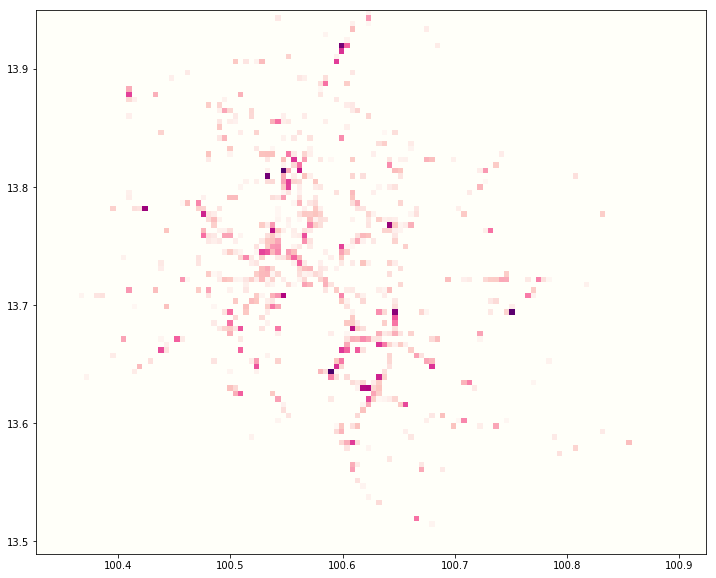

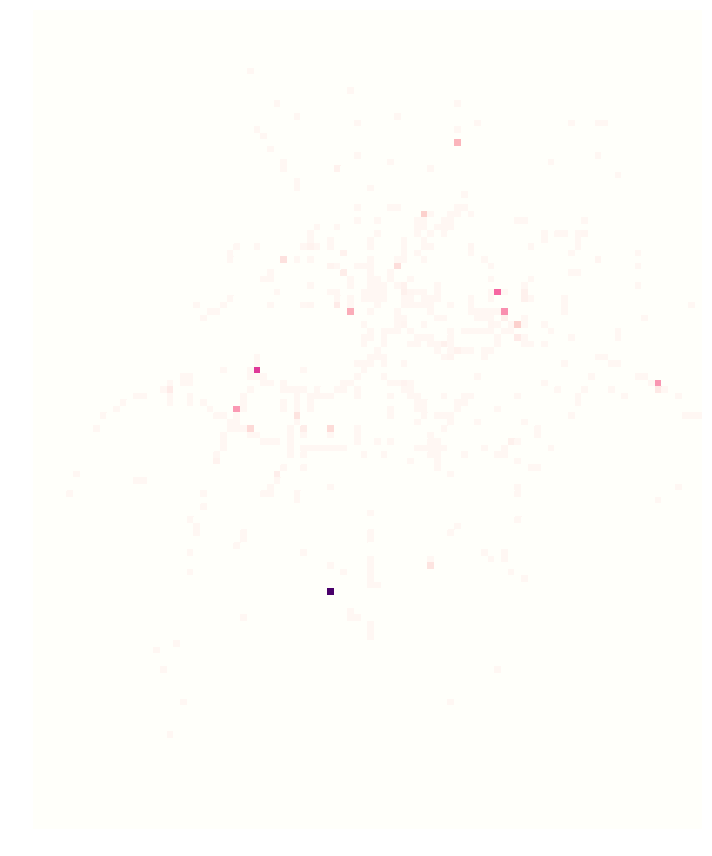

17
<type 'tuple'>
<type 'tuple'>
check


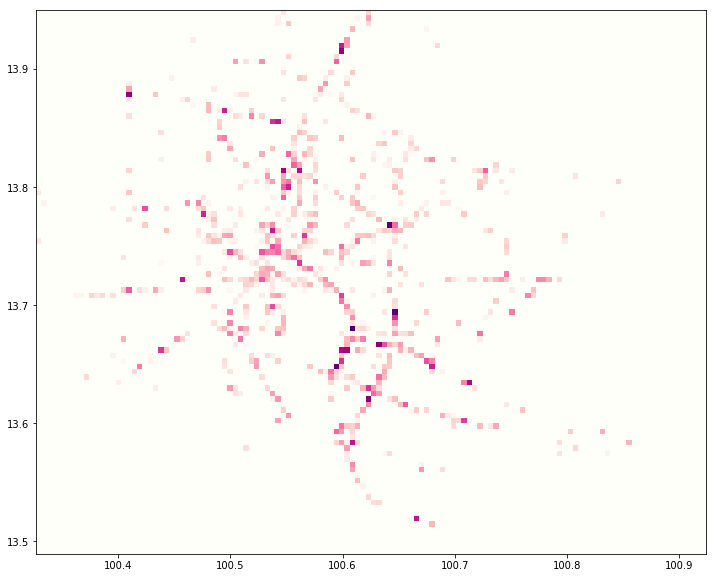

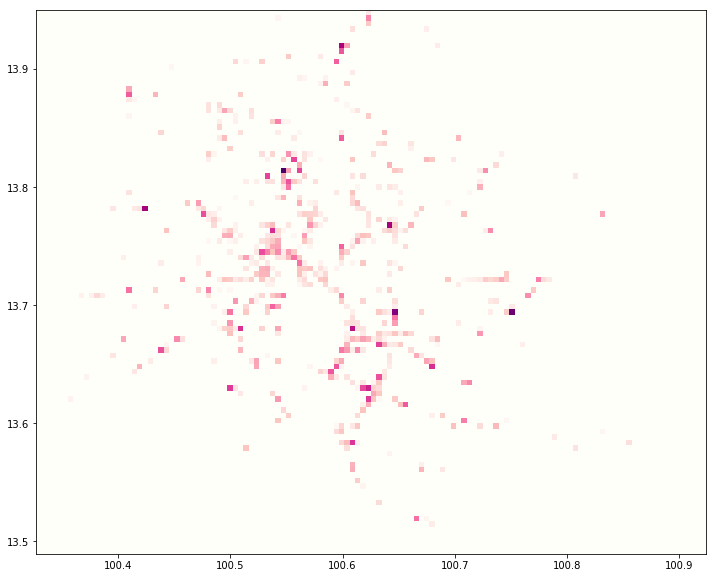

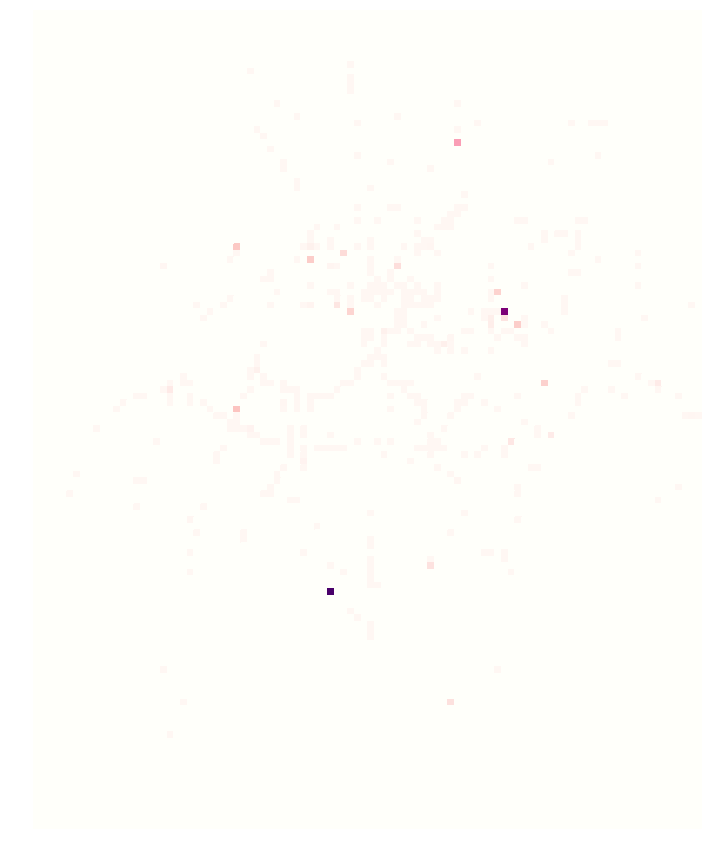

18
<type 'tuple'>
<type 'tuple'>
check


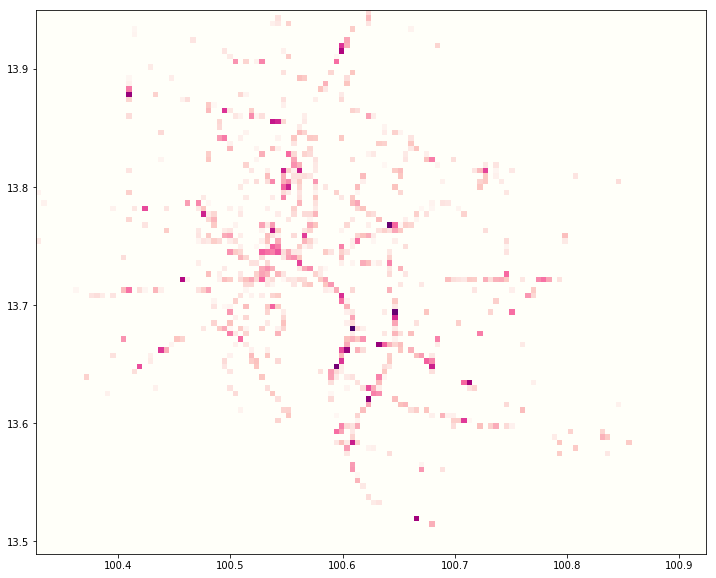

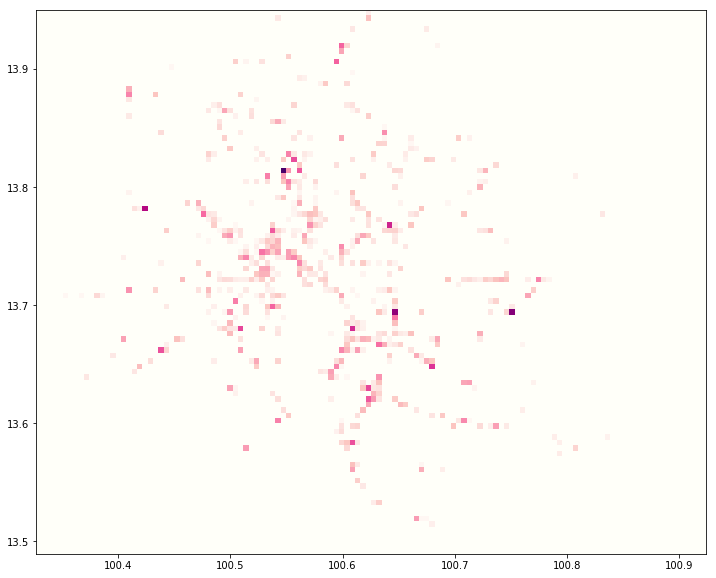

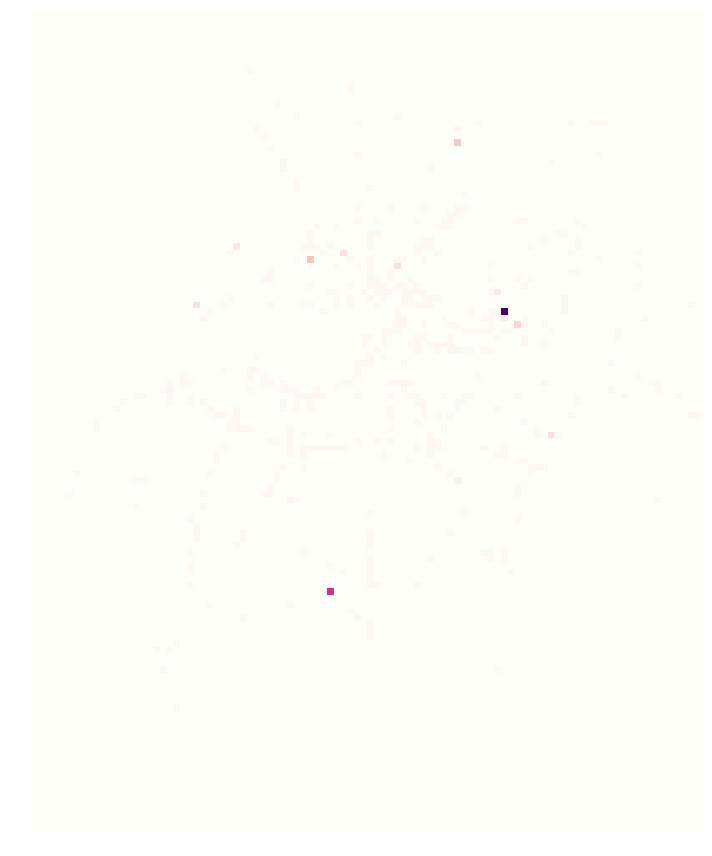

19
<type 'tuple'>
<type 'tuple'>
check


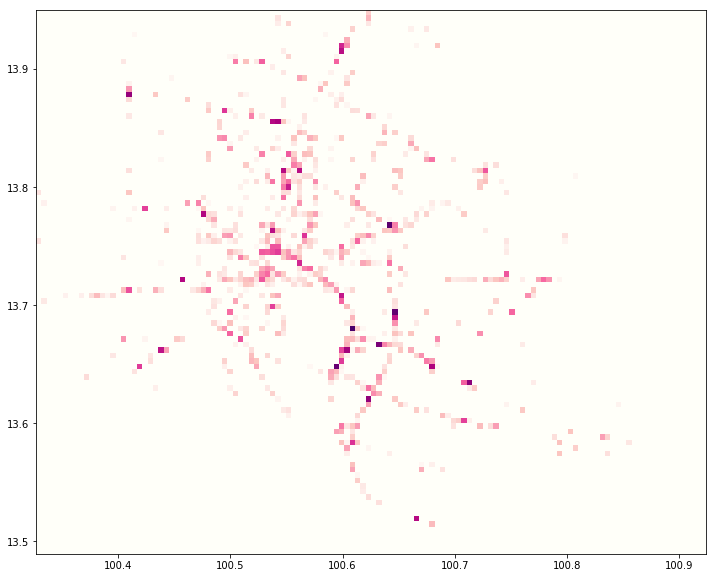

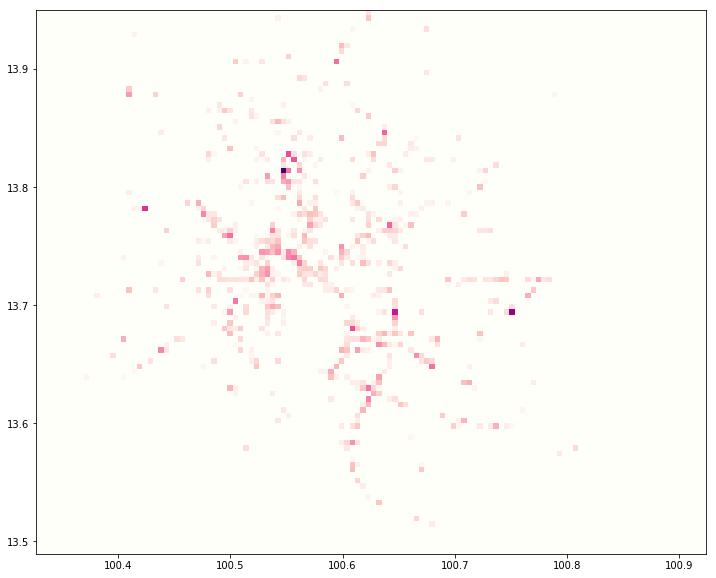

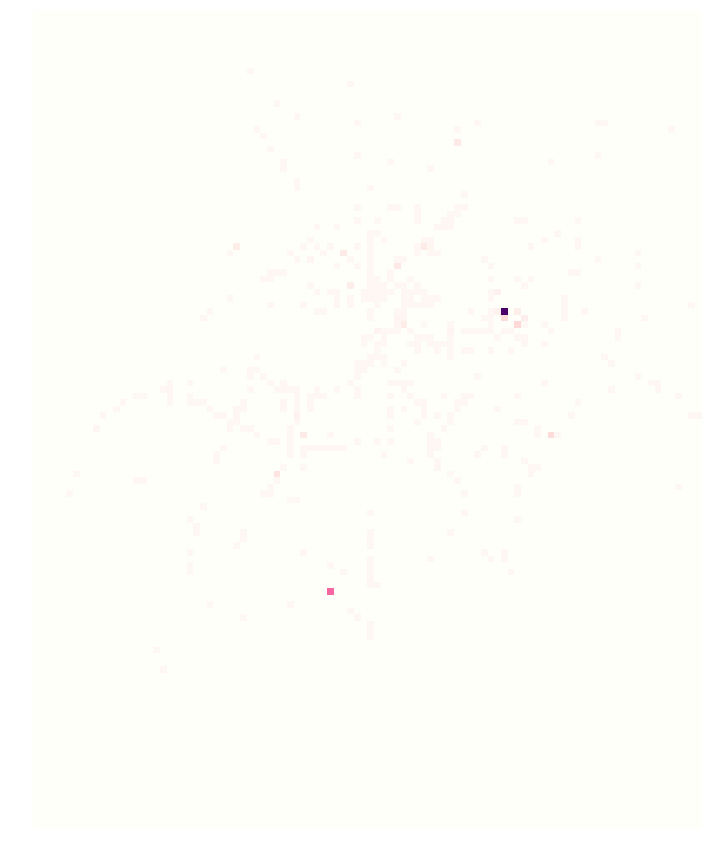

20
<type 'tuple'>
<type 'tuple'>
check


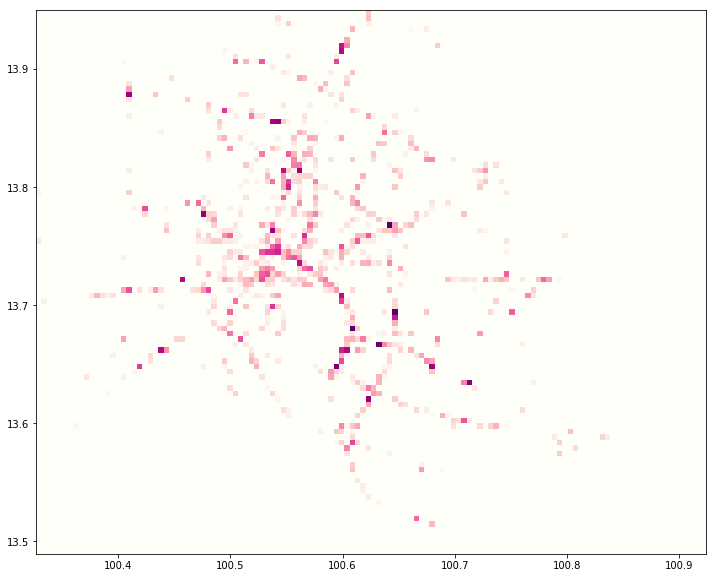

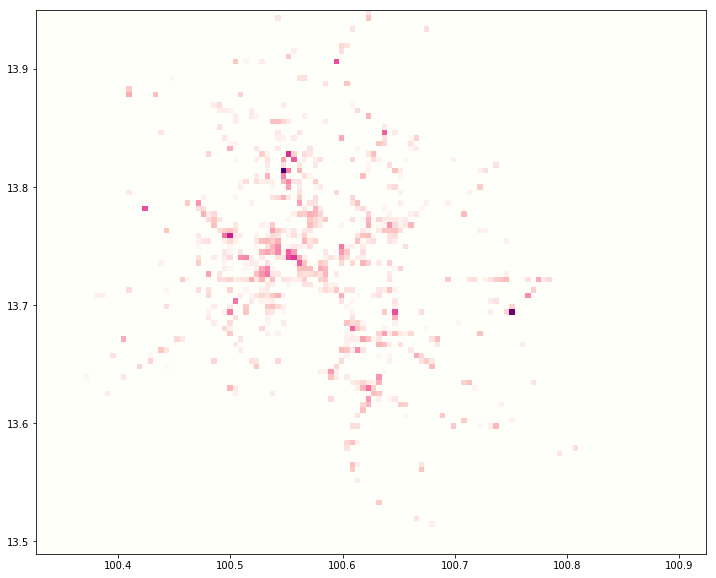

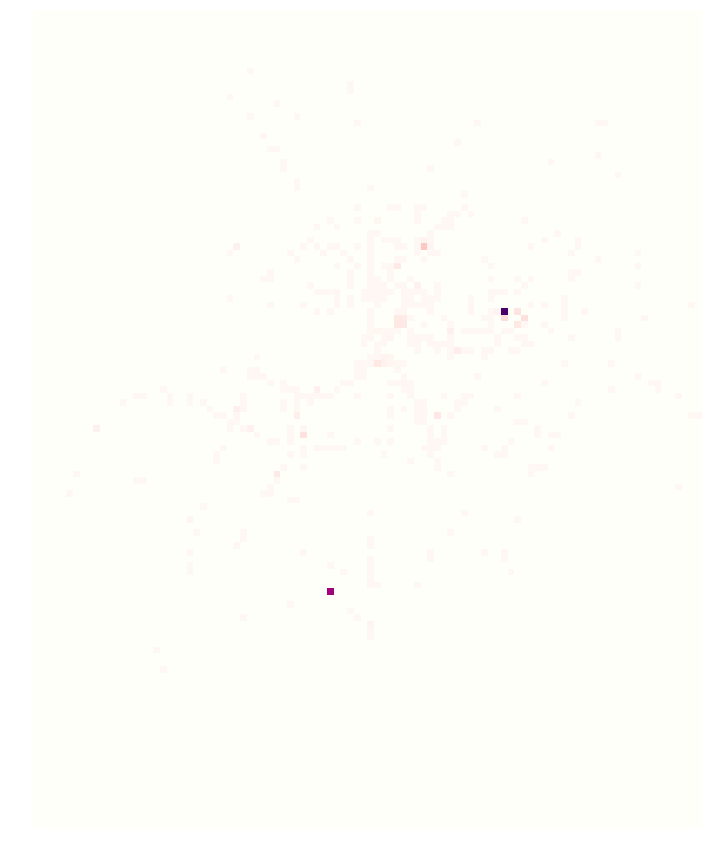

21
<type 'tuple'>
<type 'tuple'>
check


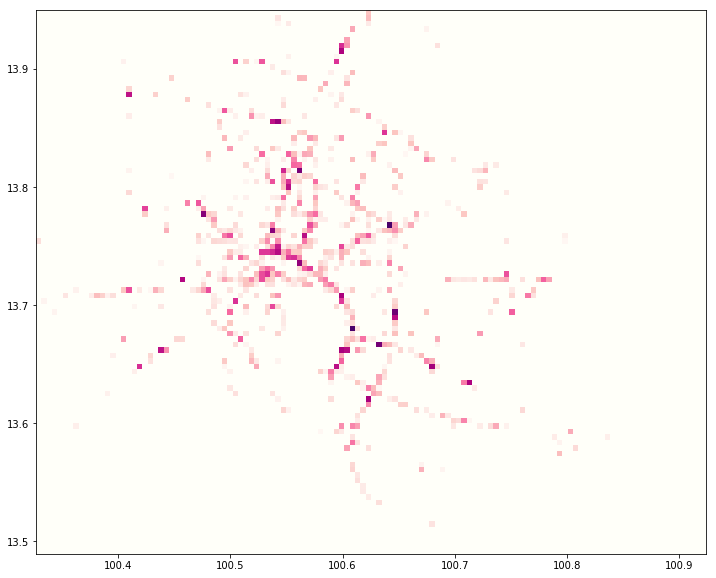

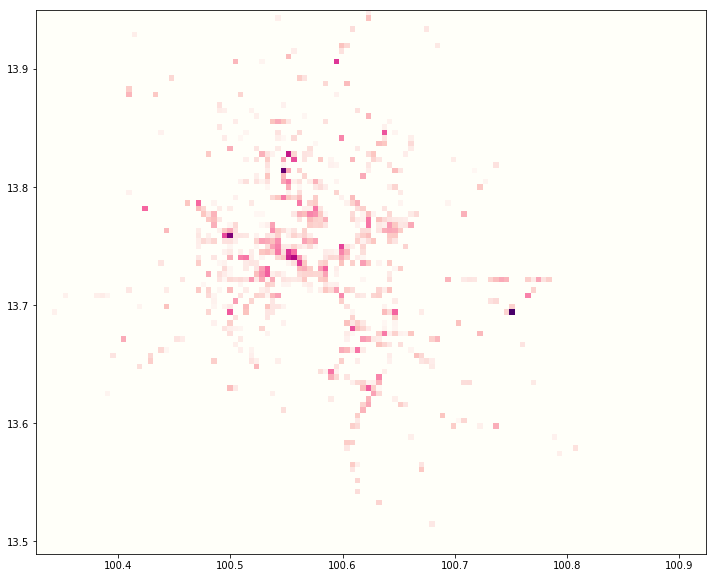

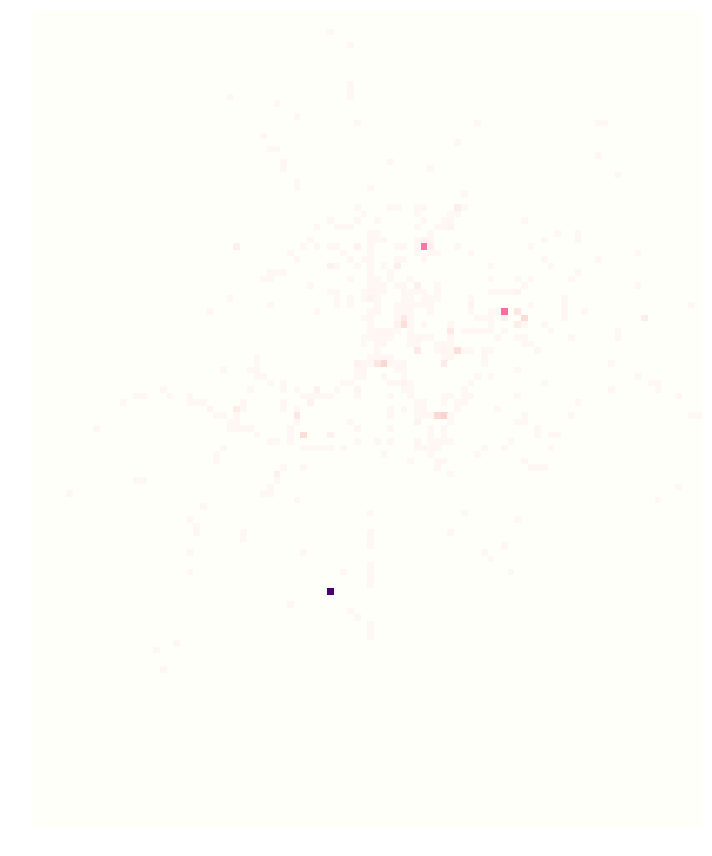

22
<type 'tuple'>
<type 'tuple'>
check


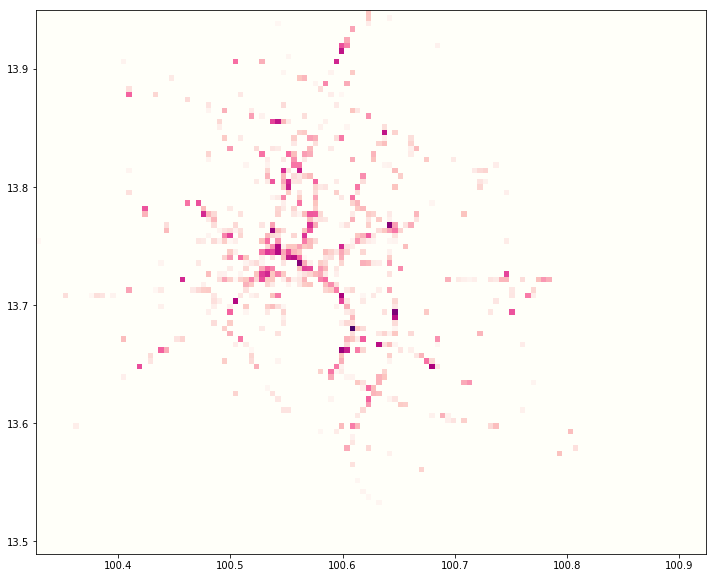

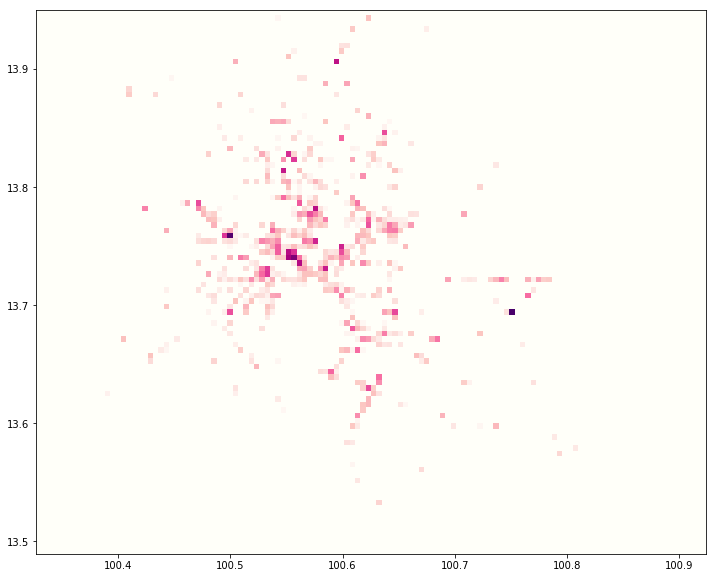

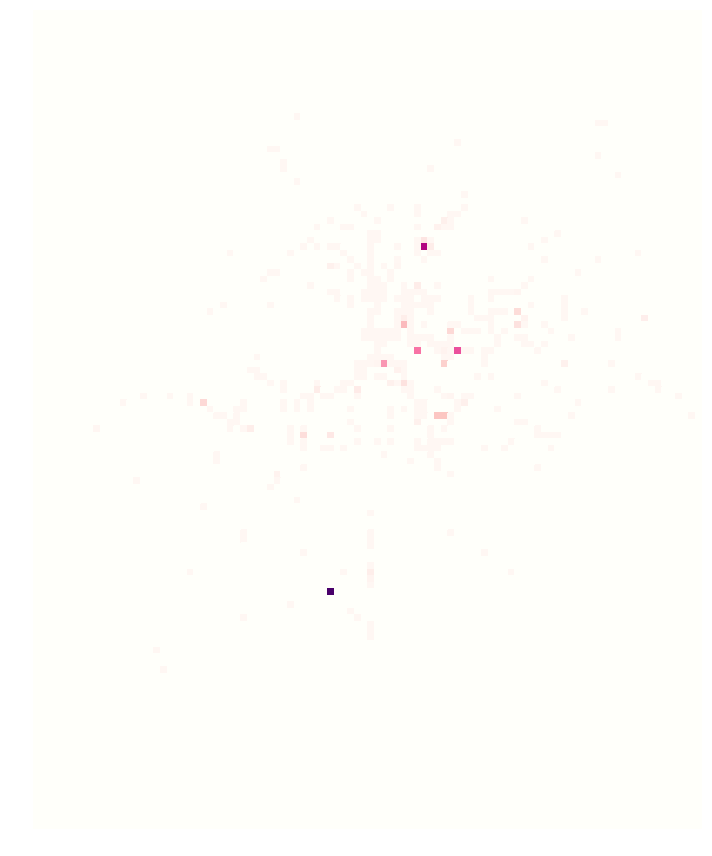

23
<type 'tuple'>
<type 'tuple'>
check


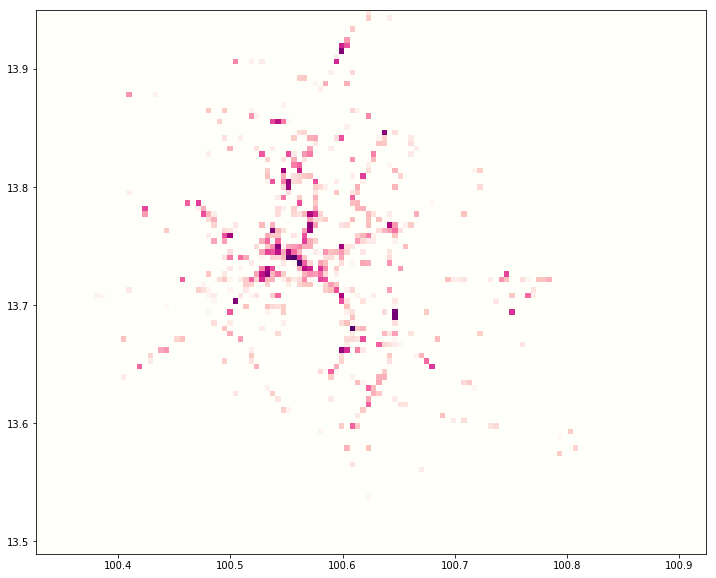

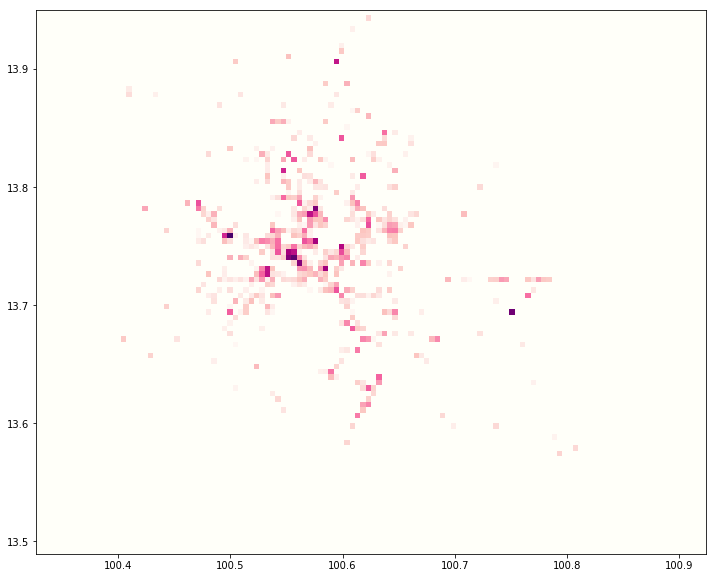

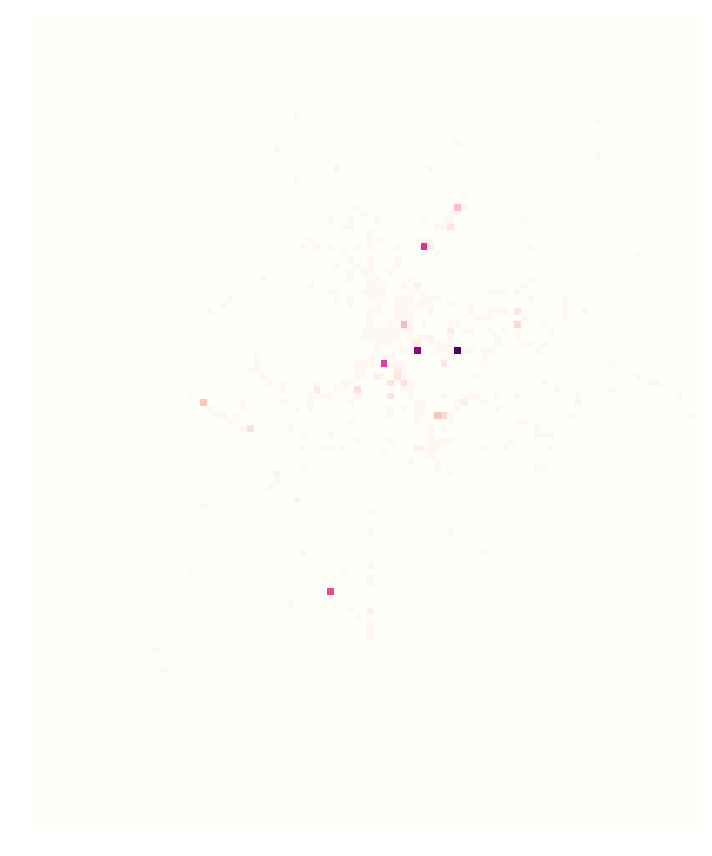

In [17]:
bkk = [13.7563, 100.5018]
cmap = copy(plt.cm.RdPu)
cmap.set_bad((1, 1, 0.98))
for i in range(24):
    print(i)
    tempd = datad[(datad['dt'].dt.hour == i)]
    tempo = datao[datao['dt'].dt.hour == i]
    figd = density_map(tempd.latitude, tempd.longitude, center=bkk, hr=i, trip='OD', plot=False)
    figo = density_map(tempo.latitude, tempo.longitude, center=bkk, hr=i, trip='OD', plot=False)
    print('check')
    A = figo[0]-figd[0]
    plt.figure(figsize=(10,12))
    fig=sns.heatmap(A, cmap=cmap, vmin=50, cbar=False)
    plt.grid('off')
    plt.axis('off')
    plt.tight_layout()
    file_location = 'Output/map_od_diff/densmap_'+('00'+str(i))[len(str(i)):len(str(i))+2]+'.png'
    fig.figure.savefig(file_location,bbox_inches='tight')
    img = Image.open(file_location)
    img = img.rotate(90, expand=True)
    img.save(file_location)
    plt.show()

# Making video 

In [16]:
def add_h(img_path):
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/arial.ttf", 15)
    draw.text((30,30), img_path[len(img_path)-6:len(img_path)-4], fill=(0,0,0))
    draw = ImageDraw.Draw(img)
#     img.save(img_path)
    im1 = Image.open("Output/base_map_bkk.jpeg")
#     im2 = Image.open("Output/map_o/densmap_07.png")
    width, height = img.size

    im1 = im1.resize((width,height))
    im1 = im1.convert('RGBA')

    img3 = Image.blend(im1, img, alpha=0.5)
    img3.save(img_path)
    return img_path

def trim(img):
    border = Image.new(img.mode, img.size, img.getpixel((0, 0)))
    diff = ImageChops.difference(img, border)
#     diff = ImageChops.add(diff, diff, 1.0, 0)
    bbox = diff.getbbox()
    if bbox:
        img = img.crop(bbox)
    display(ImageOps.expand(img,border=3,fill='black'))
    return np.array(img)

## 'destination'

In [76]:
path = "Output/map_d/"
files = glob.glob(os.path.join(path, "*.png")) #make list of paths
files.sort()
files_no = [add_h(m) for m in files]
    
files_no = files_no + files_no
files_no

['Output/map_d/densmap_00.png',
 'Output/map_d/densmap_01.png',
 'Output/map_d/densmap_02.png',
 'Output/map_d/densmap_03.png',
 'Output/map_d/densmap_04.png',
 'Output/map_d/densmap_05.png',
 'Output/map_d/densmap_06.png',
 'Output/map_d/densmap_07.png',
 'Output/map_d/densmap_08.png',
 'Output/map_d/densmap_09.png',
 'Output/map_d/densmap_10.png',
 'Output/map_d/densmap_11.png',
 'Output/map_d/densmap_12.png',
 'Output/map_d/densmap_13.png',
 'Output/map_d/densmap_14.png',
 'Output/map_d/densmap_15.png',
 'Output/map_d/densmap_16.png',
 'Output/map_d/densmap_17.png',
 'Output/map_d/densmap_18.png',
 'Output/map_d/densmap_19.png',
 'Output/map_d/densmap_20.png',
 'Output/map_d/densmap_21.png',
 'Output/map_d/densmap_22.png',
 'Output/map_d/densmap_23.png',
 'Output/map_d/densmap_00.png',
 'Output/map_d/densmap_01.png',
 'Output/map_d/densmap_02.png',
 'Output/map_d/densmap_03.png',
 'Output/map_d/densmap_04.png',
 'Output/map_d/densmap_05.png',
 'Output/map_d/densmap_06.png',
 'Output

In [77]:
clips = [ImageClip(m).set_duration(0.5)
      for m in files_no]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("Output/clip_d.mp4", fps=24)

[MoviePy] >>>> Building video Output/clip_d.mp4
[MoviePy] Writing video Output/clip_d.mp4


100%|█████████▉| 576/577 [21:05<00:02,  2.25s/it]

[MoviePy] Done.
[MoviePy] >>>> Video ready: Output/clip_d.mp4 



## 'Origin'

In [14]:
path = "Output/map_o/"
files = glob.glob(os.path.join(path, "*.png")) #make list of paths
files.sort()
files_no = [add_h(m) for m in files]
    
files_no = files_no + files_no
files_no

['Output/map_o/densmap_00.png',
 'Output/map_o/densmap_01.png',
 'Output/map_o/densmap_02.png',
 'Output/map_o/densmap_03.png',
 'Output/map_o/densmap_04.png',
 'Output/map_o/densmap_05.png',
 'Output/map_o/densmap_06.png',
 'Output/map_o/densmap_07.png',
 'Output/map_o/densmap_08.png',
 'Output/map_o/densmap_09.png',
 'Output/map_o/densmap_10.png',
 'Output/map_o/densmap_11.png',
 'Output/map_o/densmap_12.png',
 'Output/map_o/densmap_13.png',
 'Output/map_o/densmap_14.png',
 'Output/map_o/densmap_15.png',
 'Output/map_o/densmap_16.png',
 'Output/map_o/densmap_17.png',
 'Output/map_o/densmap_18.png',
 'Output/map_o/densmap_19.png',
 'Output/map_o/densmap_20.png',
 'Output/map_o/densmap_21.png',
 'Output/map_o/densmap_22.png',
 'Output/map_o/densmap_23.png',
 'Output/map_o/densmap_00.png',
 'Output/map_o/densmap_01.png',
 'Output/map_o/densmap_02.png',
 'Output/map_o/densmap_03.png',
 'Output/map_o/densmap_04.png',
 'Output/map_o/densmap_05.png',
 'Output/map_o/densmap_06.png',
 'Output

In [15]:
clips = [ImageClip(m).set_duration(0.5)
      for m in files_no]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("Output/clip_o.mp4", fps=24)

[MoviePy] >>>> Building video Output/clip_o.mp4
[MoviePy] Writing video Output/clip_o.mp4


100%|█████████▉| 576/577 [01:38<00:00,  5.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Output/clip_o.mp4 



## 'diff_ between Origin and Destination'

In [70]:
import numpy as np
from PIL import Image, ImageChops, ImageOps

def trim(img):
    border = Image.new(img.mode, img.size, img.getpixel((0, 0)))
    diff = ImageChops.difference(img, border)
#     diff = ImageChops.add(diff, diff, 1.0, 0)
    bbox = diff.getbbox()
    if bbox:
        img = img.crop(bbox)
    display(ImageOps.expand(img,border=3,fill='black'))
    return np.array(img)

def colorize(array, cmap='Purples'):
    normed_data = (array - array.min()) / (array.max() - array.min())
    cm = plt.cm.get_cmap(cmap)
    return cm(normed_data)

In [87]:
path = "Output/map_od_diff/"
files = glob.glob(os.path.join(path, "*.png")) #make list of paths
files.sort()
files

['Output/map_od_diff/densmap_00.png',
 'Output/map_od_diff/densmap_01.png',
 'Output/map_od_diff/densmap_02.png',
 'Output/map_od_diff/densmap_03.png',
 'Output/map_od_diff/densmap_04.png',
 'Output/map_od_diff/densmap_05.png',
 'Output/map_od_diff/densmap_06.png',
 'Output/map_od_diff/densmap_07.png',
 'Output/map_od_diff/densmap_08.png',
 'Output/map_od_diff/densmap_09.png',
 'Output/map_od_diff/densmap_10.png',
 'Output/map_od_diff/densmap_11.png',
 'Output/map_od_diff/densmap_12.png',
 'Output/map_od_diff/densmap_13.png',
 'Output/map_od_diff/densmap_14.png',
 'Output/map_od_diff/densmap_15.png',
 'Output/map_od_diff/densmap_16.png',
 'Output/map_od_diff/densmap_17.png',
 'Output/map_od_diff/densmap_18.png',
 'Output/map_od_diff/densmap_19.png',
 'Output/map_od_diff/densmap_20.png',
 'Output/map_od_diff/densmap_21.png',
 'Output/map_od_diff/densmap_22.png',
 'Output/map_od_diff/densmap_23.png']

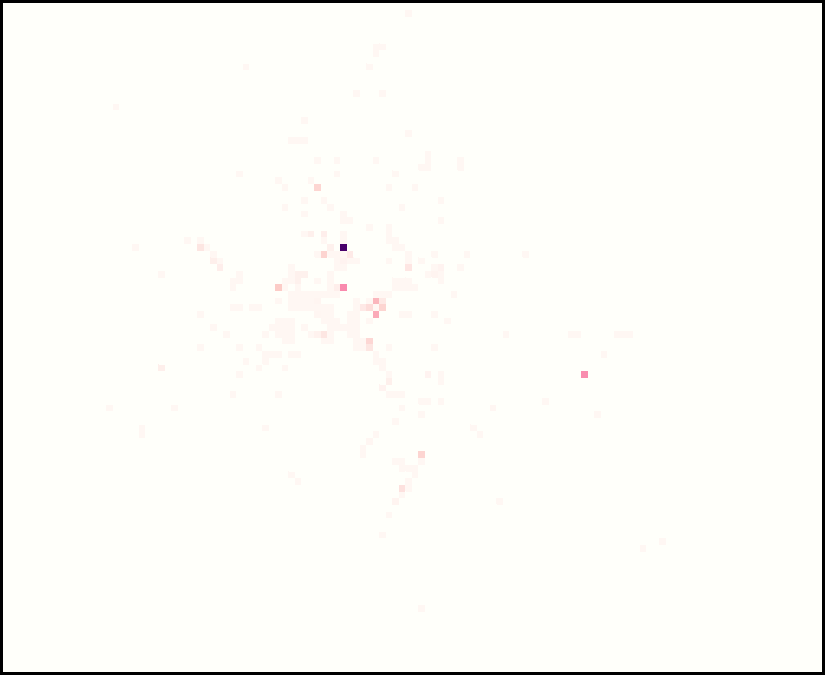

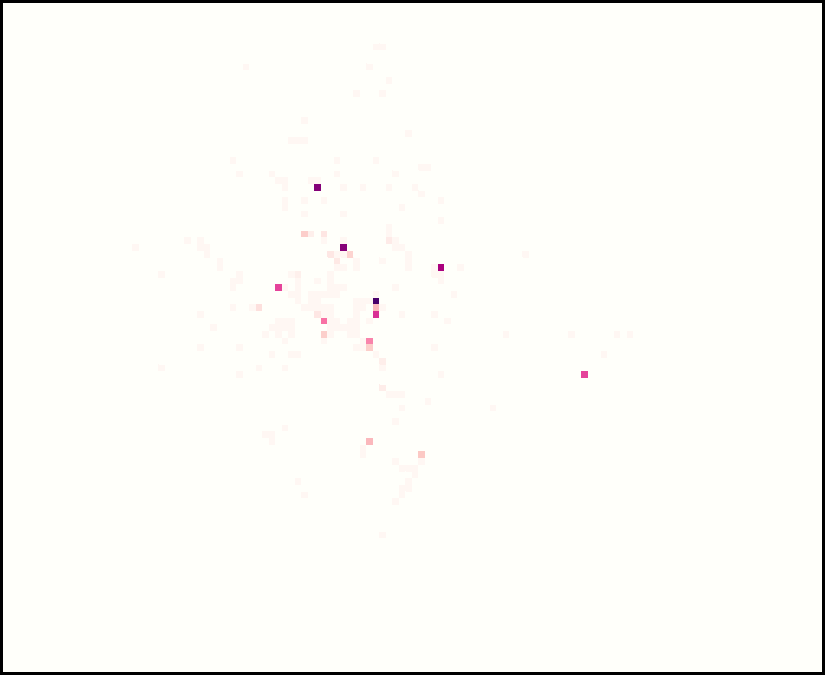

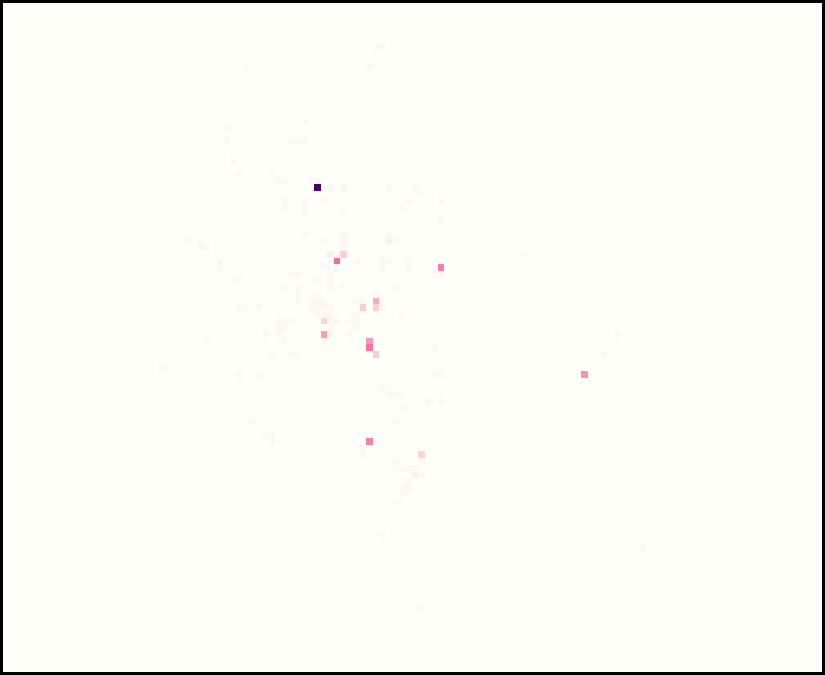

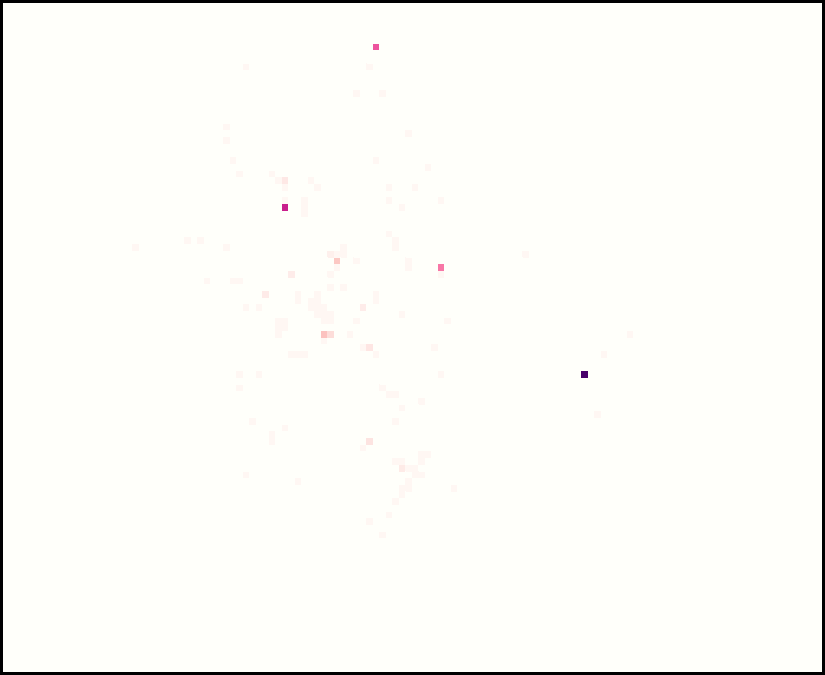

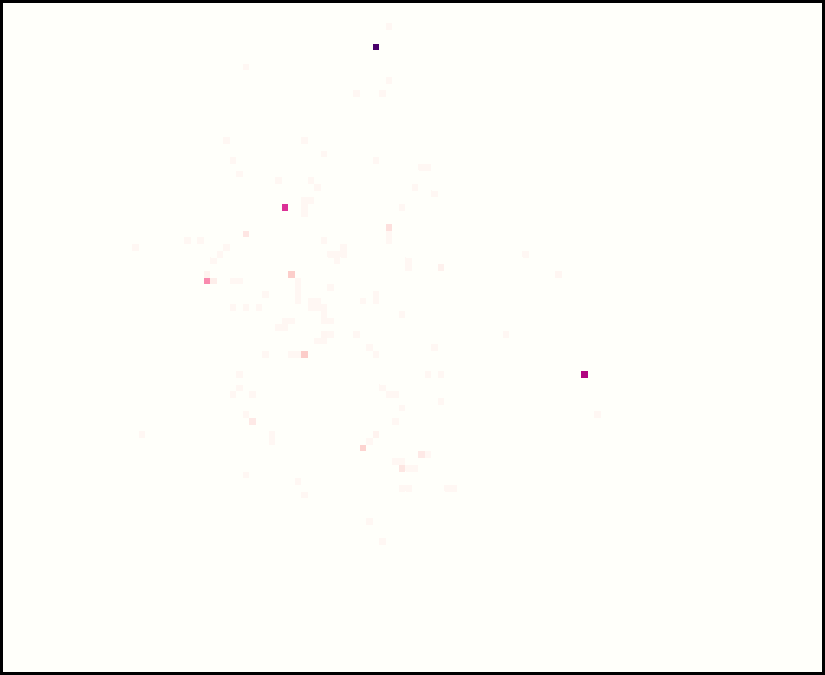

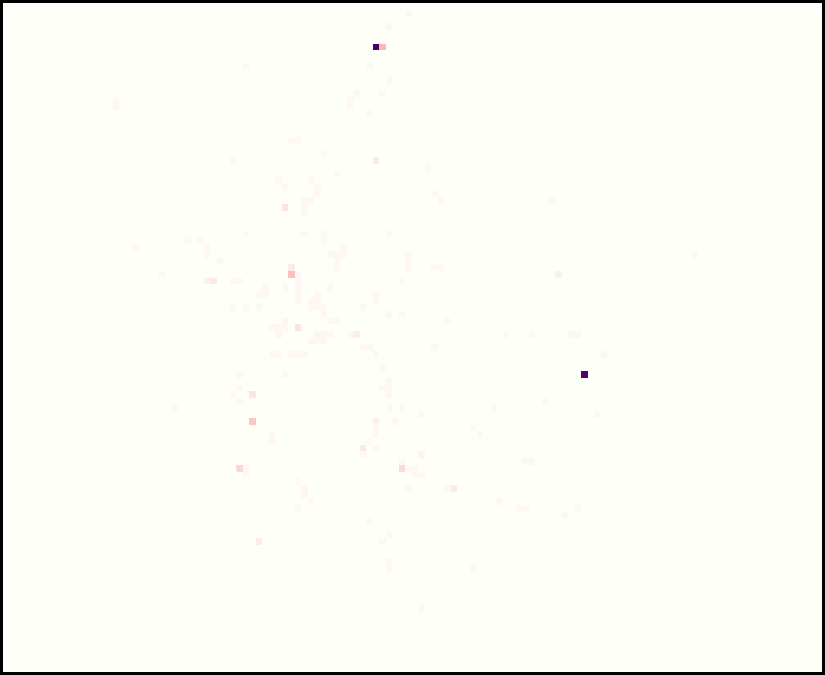

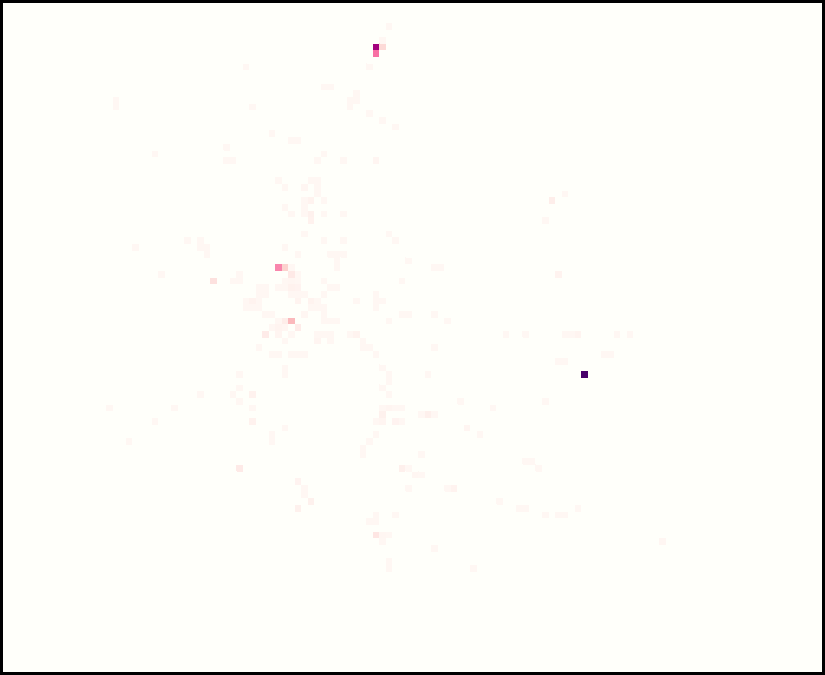

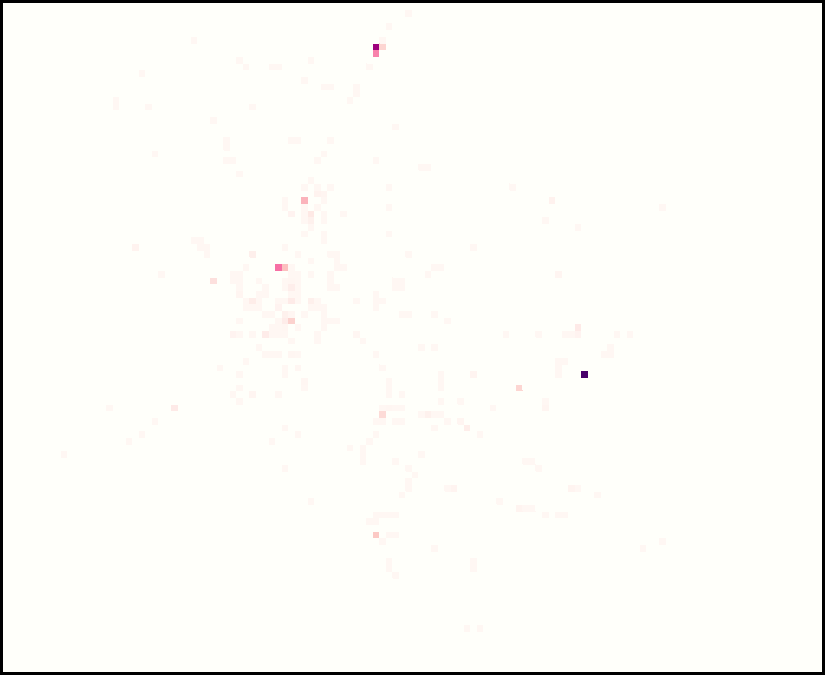

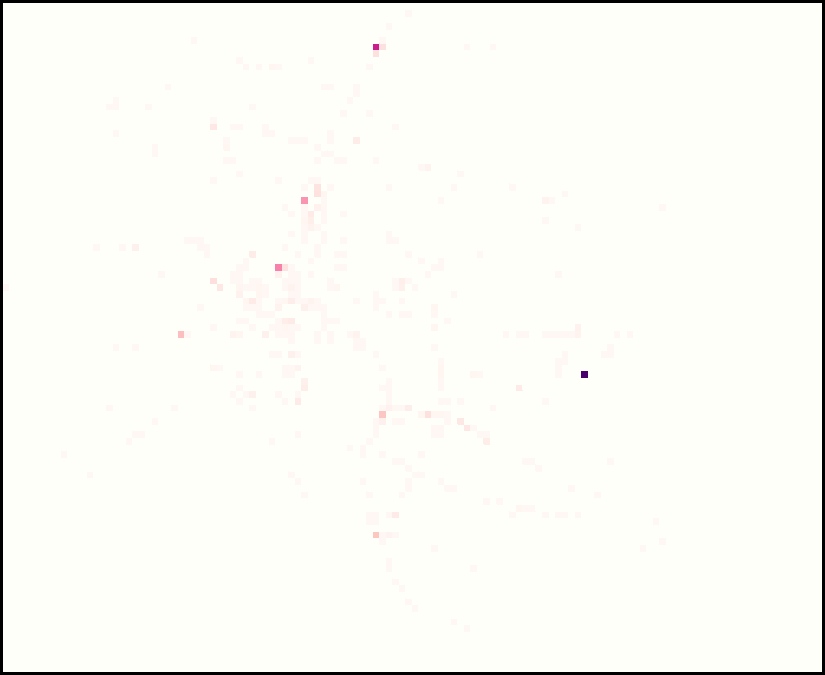

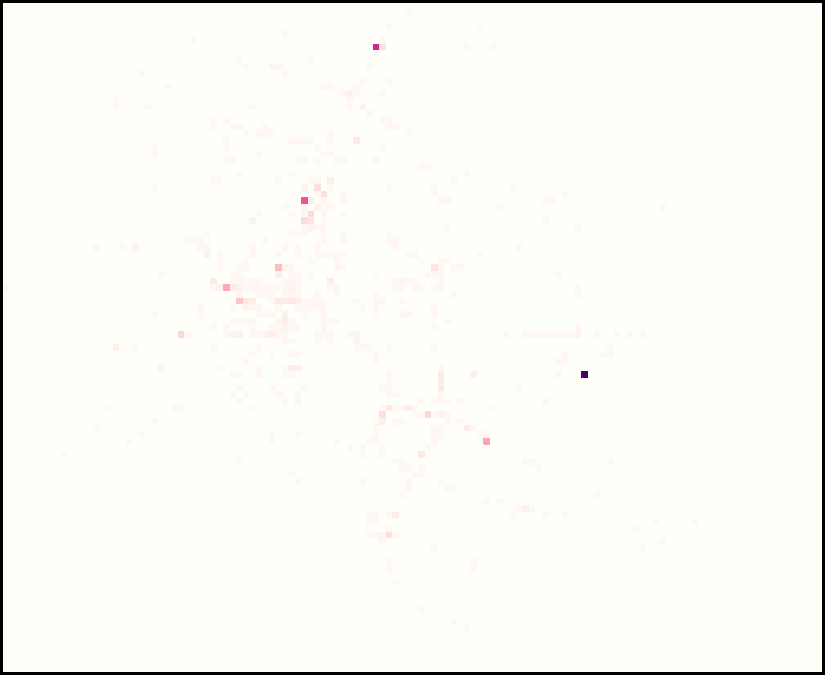

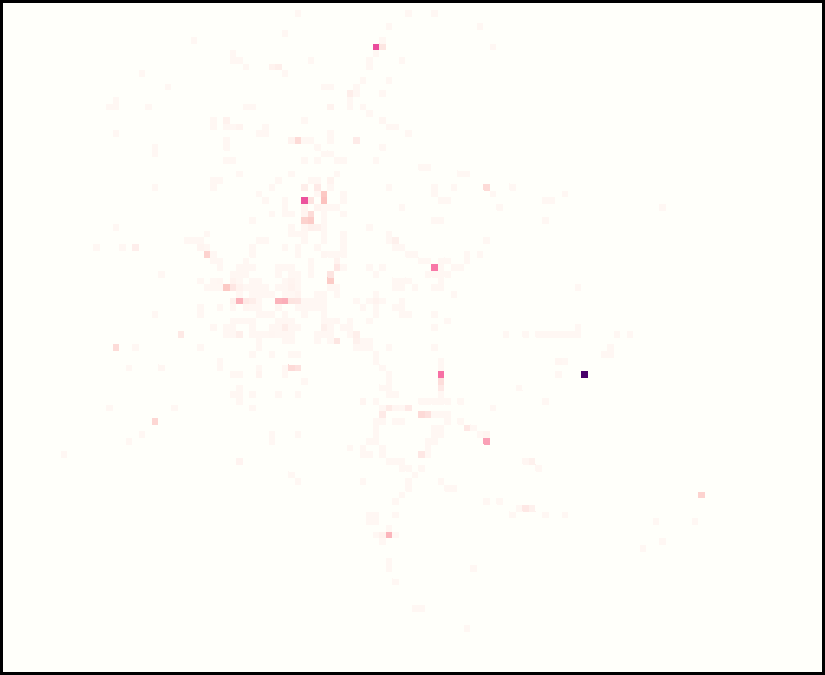

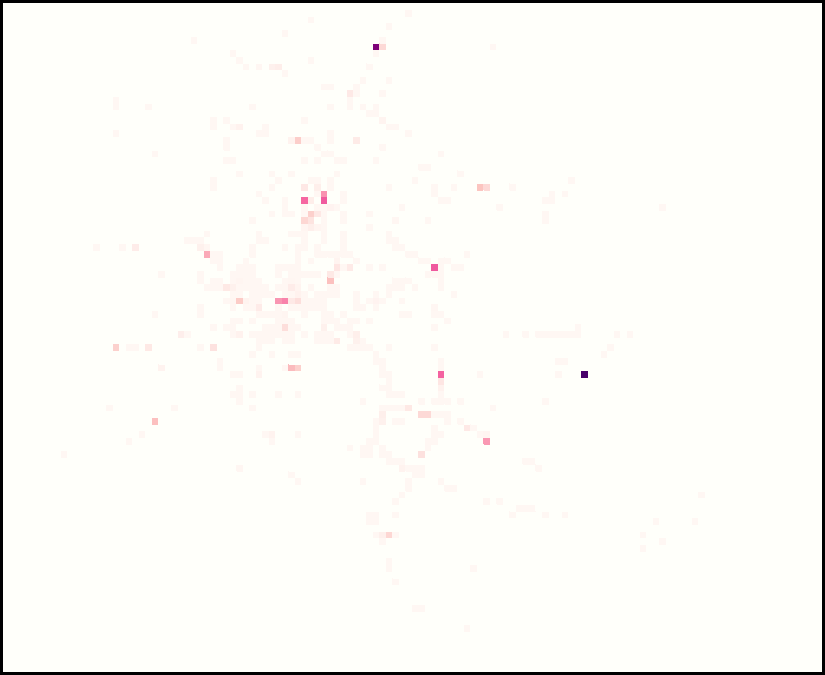

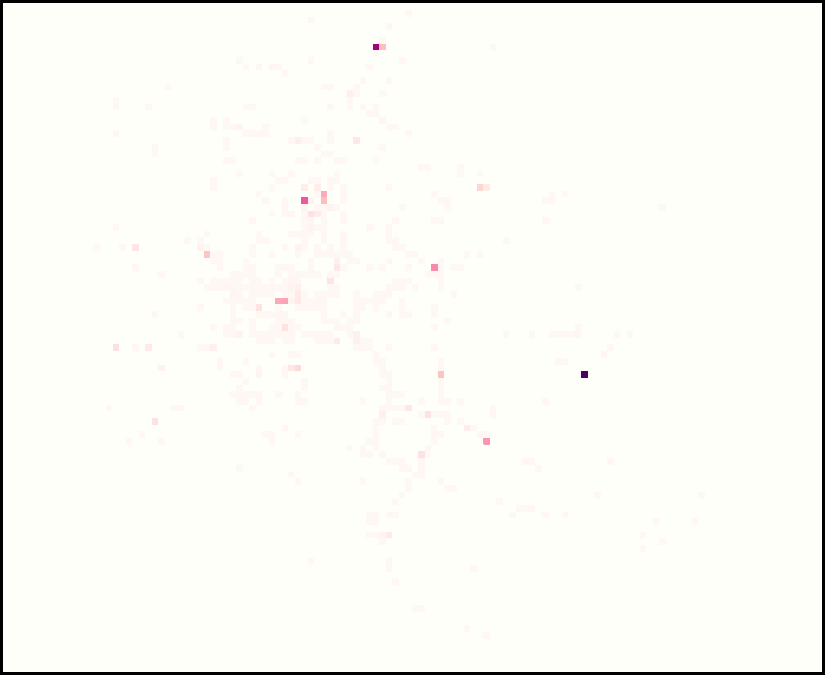

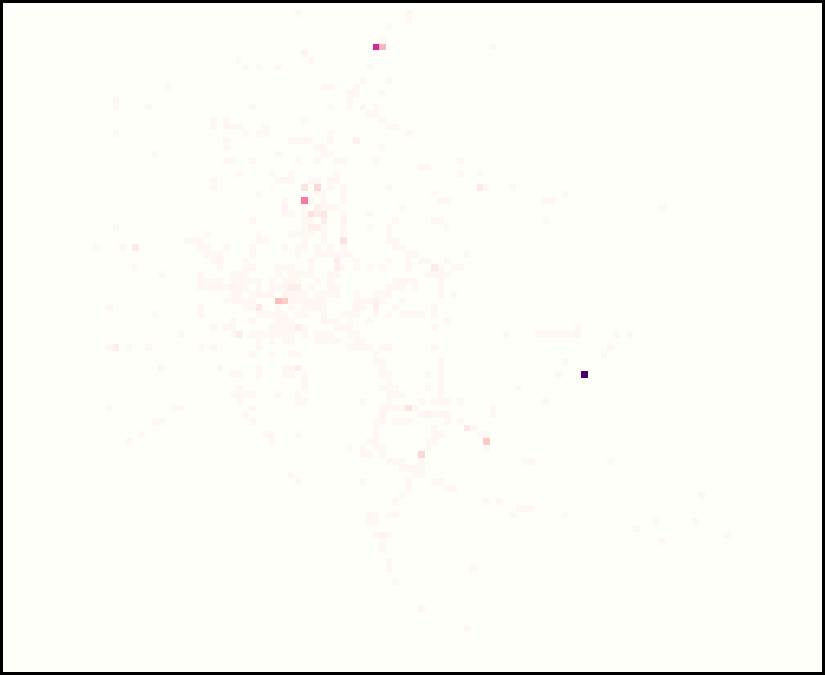

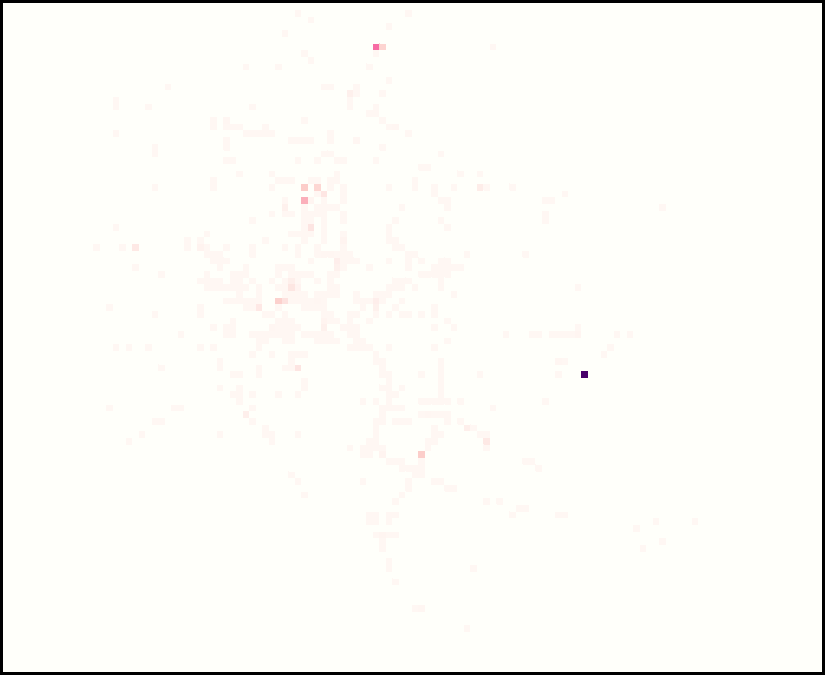

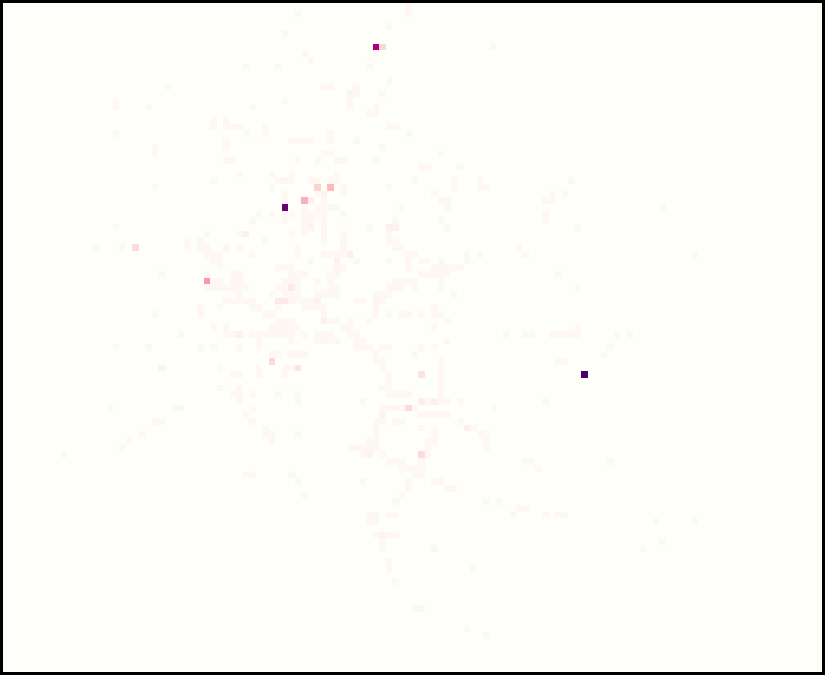

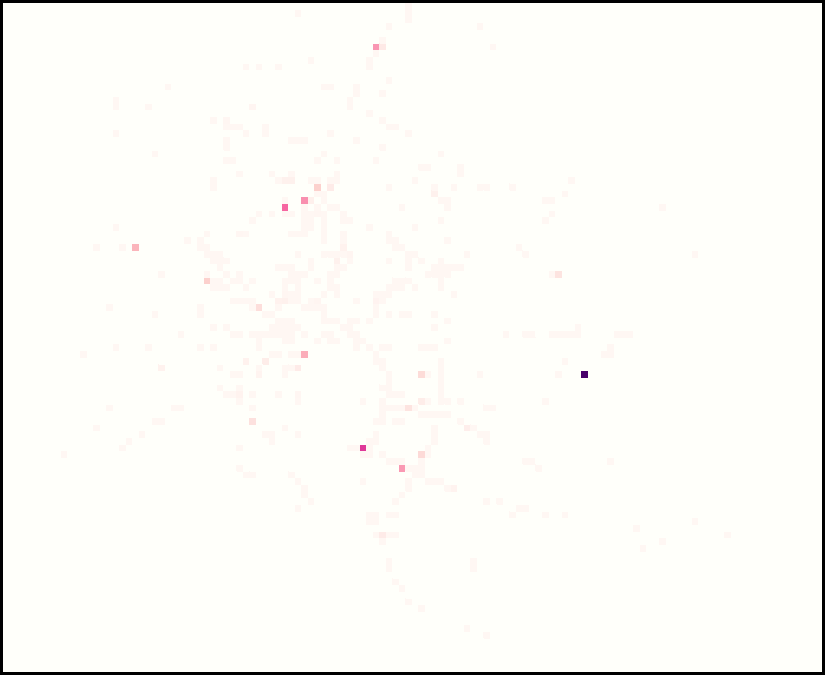

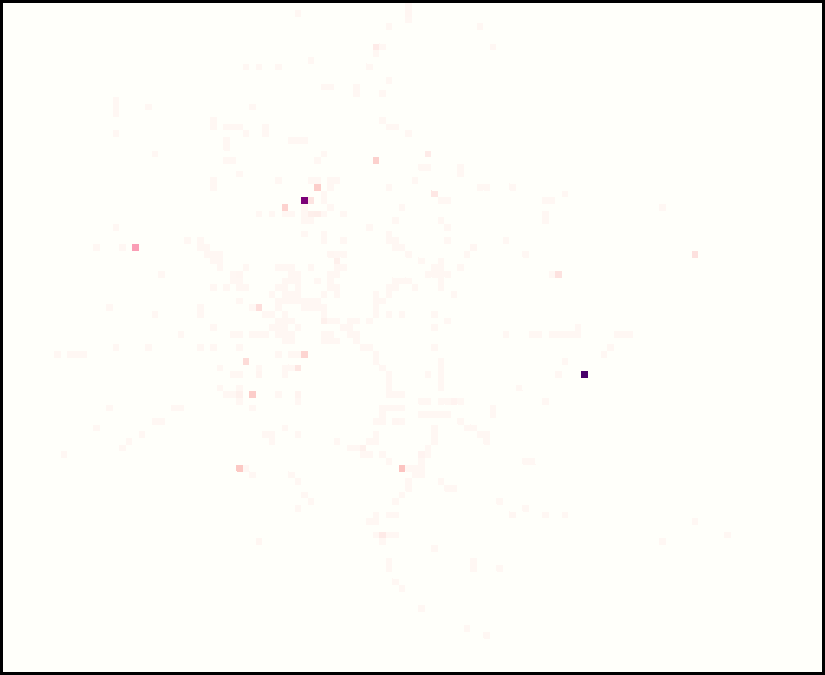

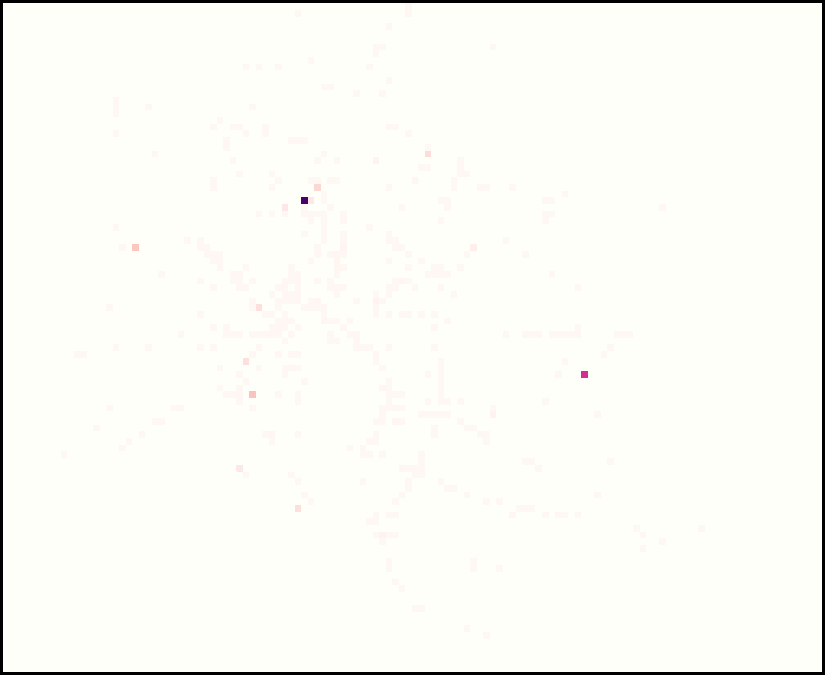

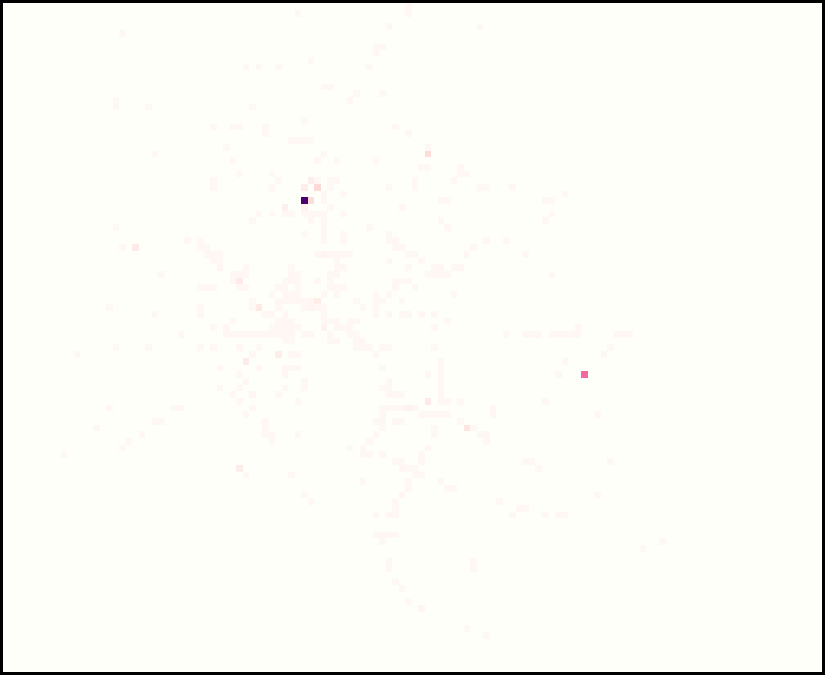

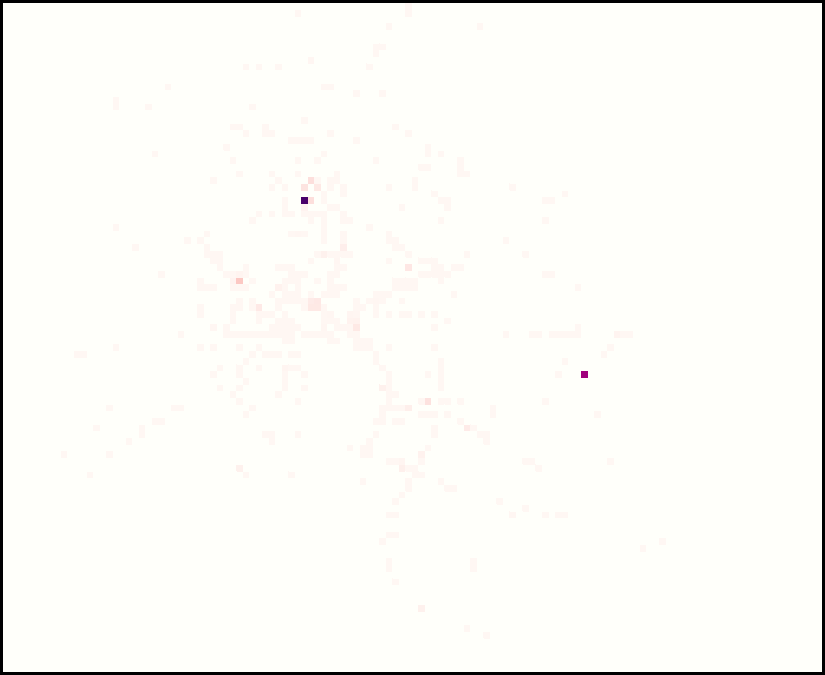

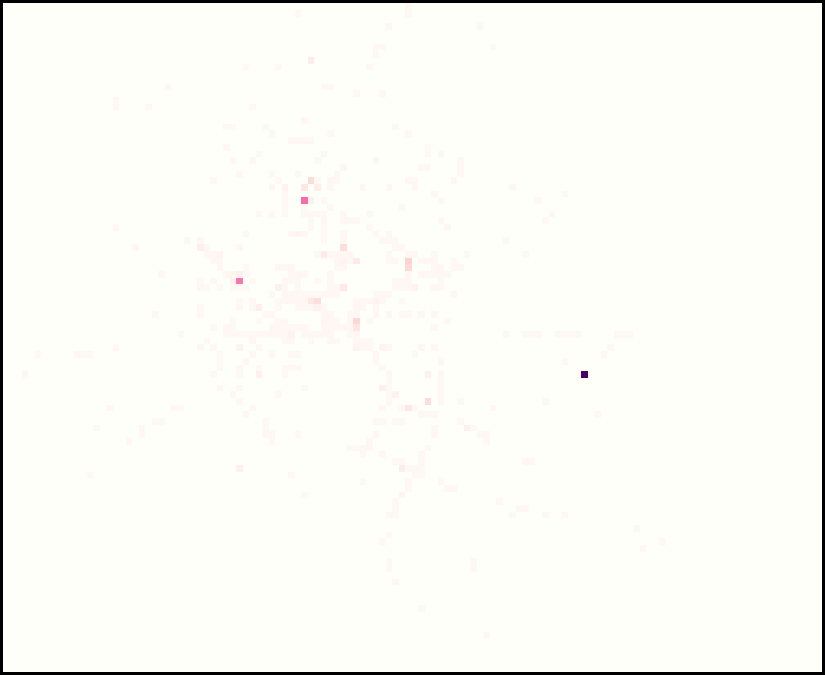

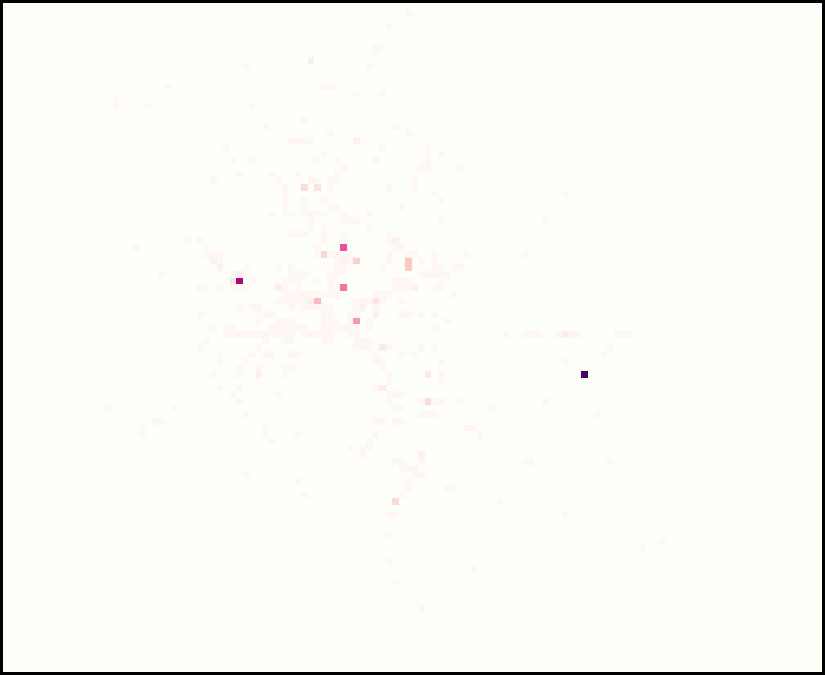

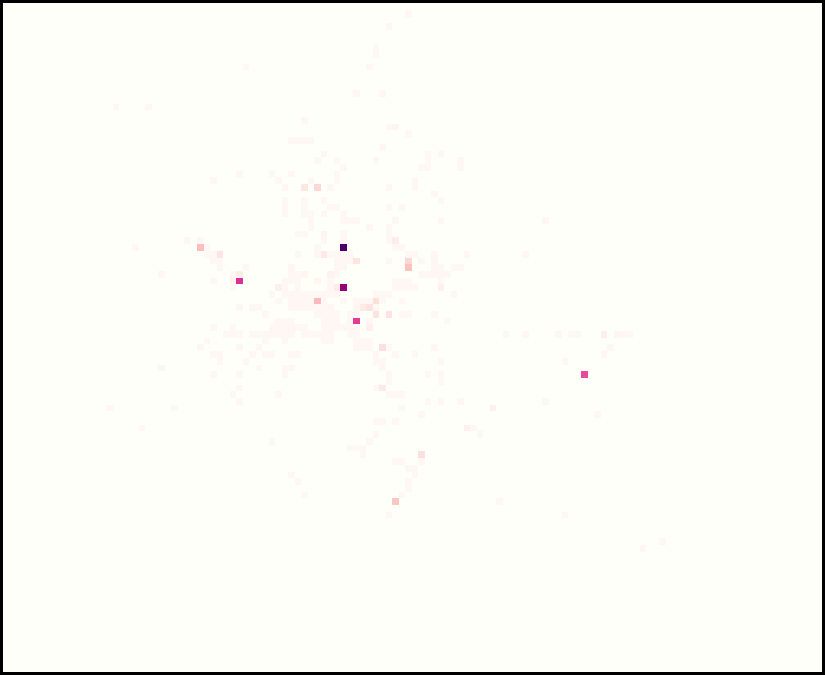

['Output/map_d/densmap_00.png',
 'Output/map_d/densmap_01.png',
 'Output/map_d/densmap_02.png',
 'Output/map_d/densmap_03.png',
 'Output/map_d/densmap_04.png',
 'Output/map_d/densmap_05.png',
 'Output/map_d/densmap_06.png',
 'Output/map_d/densmap_07.png',
 'Output/map_d/densmap_08.png',
 'Output/map_d/densmap_09.png',
 'Output/map_d/densmap_10.png',
 'Output/map_d/densmap_11.png',
 'Output/map_d/densmap_12.png',
 'Output/map_d/densmap_13.png',
 'Output/map_d/densmap_14.png',
 'Output/map_d/densmap_15.png',
 'Output/map_d/densmap_16.png',
 'Output/map_d/densmap_17.png',
 'Output/map_d/densmap_18.png',
 'Output/map_d/densmap_19.png',
 'Output/map_d/densmap_20.png',
 'Output/map_d/densmap_21.png',
 'Output/map_d/densmap_22.png',
 'Output/map_d/densmap_23.png',
 'Output/map_d/densmap_00.png',
 'Output/map_d/densmap_01.png',
 'Output/map_d/densmap_02.png',
 'Output/map_d/densmap_03.png',
 'Output/map_d/densmap_04.png',
 'Output/map_d/densmap_05.png',
 'Output/map_d/densmap_06.png',
 'Output

In [89]:
for f in files:
    img = Image.open(f)
    img = trim(img)
    img = Image.fromarray(img, 'RGBA')
    img.save(f)
    files_no.append(add_h(f))
files_no = files_no + files_no
files_no

In [93]:
path = "Output/map_od_diff/"
files = glob.glob(os.path.join(path, "*.png")) #make list of paths
files.sort()
files = files+files
files

['Output/map_od_diff/densmap_00.png',
 'Output/map_od_diff/densmap_01.png',
 'Output/map_od_diff/densmap_02.png',
 'Output/map_od_diff/densmap_03.png',
 'Output/map_od_diff/densmap_04.png',
 'Output/map_od_diff/densmap_05.png',
 'Output/map_od_diff/densmap_06.png',
 'Output/map_od_diff/densmap_07.png',
 'Output/map_od_diff/densmap_08.png',
 'Output/map_od_diff/densmap_09.png',
 'Output/map_od_diff/densmap_10.png',
 'Output/map_od_diff/densmap_11.png',
 'Output/map_od_diff/densmap_12.png',
 'Output/map_od_diff/densmap_13.png',
 'Output/map_od_diff/densmap_14.png',
 'Output/map_od_diff/densmap_15.png',
 'Output/map_od_diff/densmap_16.png',
 'Output/map_od_diff/densmap_17.png',
 'Output/map_od_diff/densmap_18.png',
 'Output/map_od_diff/densmap_19.png',
 'Output/map_od_diff/densmap_20.png',
 'Output/map_od_diff/densmap_21.png',
 'Output/map_od_diff/densmap_22.png',
 'Output/map_od_diff/densmap_23.png',
 'Output/map_od_diff/densmap_00.png',
 'Output/map_od_diff/densmap_01.png',
 'Output/map

In [ ]:
clips = [ImageClip(m).set_duration(0.5)
      for m in files_no]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("Output/clip_od.mp4", fps=24)

[MoviePy] >>>> Building video Output/clip_od.mp4
[MoviePy] Writing video Output/clip_od.mp4



 18%|█▊        | 304/1729 [00:39<03:01,  7.85it/s]


 35%|███▌      | 606/1729 [01:18<02:11,  8.52it/s]


 52%|█████▏    | 901/1729 [03:01<24:47,  1.80s/it]